# Автомобильный рынок Казахстана. Общий анализ рынка и анализ  фирмы `Меркур Авто`.

Имеются данные, отражающие продажы автомобилей в Казахстане, в период  с января по сентябрь 2019 года. 
Данные имеют много ошибок, полученных при конвертации из другого источника. Требуется обработка и нормализация данных.
Так же требуется провести общий анализ рынка и анализ продаж компании "Меркур Авто", работающей на рынке.

# План работы: 

1. Загрузка библиотек и данных
2. Предобработка данных и EDA: 
    - 2.1. описательные статистики
    - 2.2. замена имен столбцов
    - 2.3. проверка на пропуски, возможно замена пропусков
    - 2.4. замена типов данных, приведение типов
    - 2.5. приведение строковых к данных к единообразию, стилистические замены
    - 2.6. работа с аномальными данными
    - 2.7. проверка на дубликаты явные и не явные
    - повторение пунктов 2.1-2.7 при необходимости
    - 2.8 оценка распределений 
3. Анализ рынка
    - 3.1. общее кол-во продаж по времени
    - 3.2. общая оценка кол-во продаж по параметрам (сегменты, регионы)
    - 3.3  оценка выручки от продаж по регионам. Топ 10.п.) и вре4ени
    - 3.4. продажи, лидеры рынка по брендам 
    - 3.5. продажи, бренды фавориты по сегментам (личный/коммерческий)
    - 3.4. компании лидеры рынка бренд/сегмент
    - 3.5. возможные зависимости между параметрами
5.  `Меркур Авто` - анализ продаж компании
    - 4.1. позиция компании по параметрам анализа рынка
    - 4.2. оценка продаваемых марок и моделей.
    - 4.3. АВС анализ
    - 4.4. частота продаж марок фаворитов
    - 4.5. анализ ДЦ компании Меркур Авто
    - 4.6. выводы и рекомендации на основе исследования
6. Общий вывод

**[Итоги проекта](#section_id)**

## 1. Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import requests
from urllib.parse import urlencode

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px 

import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
# игнорирование комментариев 
import warnings
warnings.filterwarnings('ignore')

# отображение графиков в jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# увеличим дефолтный размер графиков
from pylab import rcParams

rcParams["figure.figsize"] = 10, 6
sns.set_style("whitegrid", {'axes.grid' : True})

#  отображение колонок и значений

#pd.options.display.max_colwidth = 150
pd.set_option('display.max_columns', 50)

pd.options.display.float_format ='{:,.3f}'.format

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 



In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/mMmCy24mnsbnKg' 

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и читаем
download_response = requests.get(download_url)
df = pd.read_csv('auto_kz_2019.csv',  delimiter=';' )


In [4]:
df.head()

Год   Месяц     Компания Бренд Модель Модификация Год выпуска  \
0  2019     Май  Mercur Auto  Audi     A3        TFSI        2018   
1  2019  Август  Mercur Auto  Audi     A3        TFSI        2018   
2  2019  Апрель  Mercur Auto  Audi     A4        TFSI        2018   
3  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   
4  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1,4        S-tronic    передний   
1             Германия      Бензин            1,4        S-tronic    передний   
2             Германия      Бензин            1,4        S-Tronic         FWD   
3             Германия      Бензин            1,4        S-tronic    передний   
4             Германия      Бензин            1,4        S-tronic    передний   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета  Количество Цена, USD Продажа, USD   Область  \
0   Физ. Лицо   безналичный       1.000     28115        28115  г.Алматы   
1    Юр. Лицо      наличный       1.000  32246,99     32246,99  г.Алматы   
2   Физ. Лицо   безналичный       1.000     32000        32000  г.Алматы   
3    Юр. Лицо   безналичный       1.000     31929        31929  г.Алматы   
4   Физ. Лицо      наличный       1.000     31929        31929  г.Алматы   

      Сегментация 2013 Класс 2013 Сегментация Eng Локализация производства  
0  Легковые автомобили    C класс               C                   Импорт  
1  Легковые автомобили    C класс               C                   Импорт  
2  Легковые автомобили    D класс               D                   Импорт  
3  Легковые автомобили    D класс               D                   Импорт  
4  Легковые автомобили    D класс               D                   Импорт

## 2. Предобработка данных и EDA
### 2.1. описательные статистики

In [5]:
# Вывод информации о типах признаков, количестве записей, количестве ненулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

In [6]:
#  описательные статистики
for t in set(df.dtypes):
    print("Переменные типа",t)
    display(df.select_dtypes(include = [t]).describe())

Переменные типа object


Месяц                 Компания   Бренд Модель Модификация Год выпуска  \
count   39966                    39966   39966  39966       36375       39465   
unique      9                       40      46    273        1383           9   
top      Июль  Toyota Motor Kazakhstan  Toyota  Camry          B5        2019   
freq     5930                    11951   10745   4853        1470       29185   

        Страна-производитель Вид топлива Объём двиг, л, Коробка передач  \
count                  39966       36826          35708           36711   
unique                    19          10            114              83   
top     Республика Казахстан      Бензин            1,6              AT   
freq                   19369       34801           5337           11379   

       Тип привода   Сегмент  Регион Наименование дилерского центра  \
count        35677     33205   39966                          39966   
unique          26       119      26                            205   
top            4WD  D класс   Алматы         Hyundai Premium Almaty   
freq          9412      4368   11179                           1600   

       Тип клиента Форма расчета    Цена, USD Продажа, USD   Область  \
count        32919         14038        39966        39966     39966   
unique           9            21         3510         4183        18   
top      Физ. Лицо        кредит  9884,695773  9884,695773  г.Алматы   
freq         24568          6190          559          559     11179   

       Сегментация 2013 Класс 2013 Сегментация Eng Локализация производства  
count             39966      39966           39966                    39966  
unique                5         21              16                        2  
top        Внедорожники    B класс              K1                   Импорт  
freq              17928       7028           11932                    20597

Переменные типа float64


Количество
count  39,960.000
mean        1.348
std         2.373
min        -1.000
25%         1.000
50%         1.000
75%         1.000
max       115.000

Переменные типа int64


Год
count 39,966.000
mean   2,019.000
std        0.000
min    2,019.000
25%    2,019.000
50%    2,019.000
75%    2,019.000
max    2,019.000

#### 2.1. Вывод
- пропуски есть в столбцах `Модификация`, `Год выпуска`, `Вид топлива`, `Объём двиг, л,` , `Коробка передач`, `Тип привода`,   `Сегмент`  , `Тип клиента`, `Форма расчета` , `Количество `
- столбцы с ценами требуется привести к числовому виду
- в разделе количество есть выброс - отрицательное значение

### 2.2. замена имен столбцов

In [7]:
df.columns


Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация',
       'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Сегмент', 'Регион',
       'Наименование дилерского центра', 'Тип клиента', 'Форма расчета',
       'Количество', 'Цена, USD', 'Продажа, USD', 'Область',
       'Сегментация 2013', 'Класс 2013', 'Сегментация Eng',
       'Локализация производства'],
      dtype='object')

In [8]:
df.columns = [x.replace(',', '').replace('дилерского центра', 'ДЦ').replace(' ', '_') for x in df.columns]

### 2.4. замена типов данных, приведение типов

In [9]:
df.tail(2)

Год     Месяц  Компания  Бренд  Модель   Модификация Год_выпуска  \
39964  2019  Сентябрь  ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   
39965  2019  Сентябрь  ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   

       Страна-производитель Вид_топлива Объём_двиг_л Коробка_передач  \
39964  Республика Казахстан      Дизель          NaN              MT   
39965  Республика Казахстан      Дизель          NaN              MT   

      Тип_привода              Сегмент  Регион      Наименование_ДЦ  \
39964         NaN  Грузовой автомобиль  Актобе  ЗапКазКАМАЗ -Актобе   
39965         NaN  Грузовой автомобиль  Актобе  ЗапКазКАМАЗ -Актобе   

      Тип_клиента Форма_расчета  Количество     Цена_USD  Продажа_USD  \
39964    Юр. Лицо   Безналичная       1.000  48756,92071  48756,92071   
39965    Юр. Лицо   Безналичная       1.000  48756,92071  48756,92071   

                   Область         Сегментация_2013  \
39964  Актюбинская область  Коммерческие автомобили   
39965  Актюбинская область  Коммерческие автомобили   

                      Класс_2013 Сегментация_Eng Локализация_производства  
39964  Крупнотоннажные грузовики               O   Локальное производство  
39965  Крупнотоннажные грузовики               O   Локальное производство

In [10]:
df.dtypes

Год                           int64
Месяц                        object
Компания                     object
Бренд                        object
Модель                       object
Модификация                  object
Год_выпуска                  object
Страна-производитель         object
Вид_топлива                  object
Объём_двиг_л                 object
Коробка_передач              object
Тип_привода                  object
Сегмент                      object
Регион                       object
Наименование_ДЦ              object
Тип_клиента                  object
Форма_расчета                object
Количество                  float64
Цена_USD                     object
Продажа_USD                  object
Область                      object
Сегментация_2013             object
Класс_2013                   object
Сегментация_Eng              object
Локализация_производства     object
dtype: object

In [11]:
df['Год_выпуска'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

In [12]:
df['Год_выпуска'] = df['Год_выпуска'].replace({'2\xa0018': '2018', '2\xa0019': '2019'})

In [13]:
df['Год_выпуска'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011'],
      dtype=object)

In [14]:
df['Год_выпуска'] = df['Год_выпуска'].astype('Int64')

In [15]:
df['Год_выпуска'].dtypes

Int64Dtype()

In [16]:
df['Объём_двиг_л'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4 L,', 

In [17]:
df['Количество'] = df['Количество'].astype('Int64')

In [18]:
df['Цена_USD'] = df['Цена_USD'].replace(',', '.', regex=True).astype('float64')

In [19]:
df['Продажа_USD'] = df['Продажа_USD' ].replace(',', '.', regex=True).astype('float64')

In [20]:
df.dtypes

Год                           int64
Месяц                        object
Компания                     object
Бренд                        object
Модель                       object
Модификация                  object
Год_выпуска                   Int64
Страна-производитель         object
Вид_топлива                  object
Объём_двиг_л                 object
Коробка_передач              object
Тип_привода                  object
Сегмент                      object
Регион                       object
Наименование_ДЦ              object
Тип_клиента                  object
Форма_расчета                object
Количество                    Int64
Цена_USD                    float64
Продажа_USD                 float64
Область                      object
Сегментация_2013             object
Класс_2013                   object
Сегментация_Eng              object
Локализация_производства     object
dtype: object

### 2.4 Вывод
Типы данных приведены к нужным.

### 2.5. приведение строковых   данных к единообразию, стилистические замены

Посмотрим уникальные названия текстовых признаков

In [21]:
for col in df.select_dtypes('object').columns:
    print('---{}---'.format(col))
    print(df[col].unique())
    print('__________________________________________________')

---Месяц---
['Май' 'Август' 'Апрель' 'Июль' 'Февраль' 'Июнь' 'Сентябрь' 'Январь'
 'Март']
__________________________________________________
---Компания---
['Mercur Auto' 'Автоцентр-Бавария' 'БИПЭК АВТО' 'Вираж'
 'Eurasia Motor Premium' 'Daewoo Bus Kazakhstan' 'Caspian Motors'
 'Каспиан Моторс' 'СемАЗ' 'Astana Motors' 'Astana Motors '
 'Hyundai Com Trans Kazakhstan ' 'Nissan Manufacturing RUS' 'СВС-ТРАНС'
 'Allur Auto' 'Almaty Motors Premium' 'TERRA MOTORS' 'ТК КАМАЗ'
 'Toyota Motor Kazakhstan' 'Лифан Моторс Рус' 'MAN Truck & Bus Kazakhstan'
 'Автомир ГК' 'Autokapital' 'Автокапитал' 'ММС Рус' 'MMC RUS'
 'Mercur Autos' 'УзАвто-Казахстан' 'Равон Моторс Казахстан'
 'Ravon Motors Kazakstan' 'Renault Россия' 'Scania Central Asia'
 'Subaru Kazakhstan' 'Volkswagen Group Rus' 'Автодом Motors KST'
 'Автомир-Центр' 'ТОО "Eurasia Motor Zhaik"' 'Scandinavian Motors'
 'Хино Моторс Казахстан' 'Hino Motors ']
__________________________________________________
---Бренд---
['Audi' 'BMW' 'Chevrolet' 'Da

Во многих названиях есть лишние пробелы в начале и в конце названия. Улалим их и так же двойные пробелы, если они есть.

In [22]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].str.strip().str.replace('  ', ' ')
    

#### Названия компании
тут есть повторы, их нужно объединить

In [23]:
df['Компания'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors',
       'Hyundai Com Trans Kazakhstan', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors'],
      dtype=object)

- 'Caspian Motors' и  'Каспиан Моторс', 'Autokapital' и 'Автокапитал', 'ММС Рус' и  'MMC RUS', 'Равон Моторс Казахстан' и 'Ravon Motors Kazakstan',   'Хино Моторс Казахстан' и 'Hino Motors'
- 'Mercur Auto'и 'Mercur Autos' , возможно это разные компании, данные в сети указывают на разные адреса. Не будем делать замену.

In [24]:
name_comp = {'Каспиан Моторс':'Caspian Motors', 'Автокапитал':'Autokapital', 'ММС Рус': 'MMC RUS', 'Равон Моторс Казахстан' : 'Ravon Motors Kazakstan', 'Хино Моторс Казахстан' :'Hino Motors'} 

In [25]:
df['Компания'] = df['Компания'].map(name_comp).fillna(df['Компания'])

In [26]:
df['Компания'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'MMC RUS', 'Mercur Autos', 'УзАвто-Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Hino Motors'], dtype=object)

#### Модель.
посмотрим, можно ли что то объединить

In [27]:
df.groupby('Бренд').agg({'Модель': 'unique'})

Модель
Бренд                                                                  
ANKAI                   [HF-D105, HFF6850G, HFF6124G03EV3, HFF6127GZ-4]
Audi                              [A3, A4, A6, A7, A8, Q5, Q7, Q8, RS5]
BMW                   [3 серия, 5 серия, 6 серия, 7 серия, X1, X3, X...
Cadillac                                                [Escalade, XT5]
Chevrolet             [Aveo, Captiva, Niva, Tahoe, Tracker, Traverse...
Daewoo                          [BS 106 A, BS 106 D, BC 211 MA, BC 095]
Dong Feng                                                  [BWC6665GA5]
Ford                                                   [Fiesta, Mondeo]
Foton                                  [BJ3253DMPKB-AD, BJ1069VDJEA-F1]
GAZ                   [2217, 2310, 2705, 2752, 3221, 3302, 3308, 330...
Hino                                                         [300, 500]
Hyundai               [Accent, Creta, Elantra, Santa Fe, Sonata, TQ-...
Hyundai Truck & Bus   [County, H350, HD 160, HD 170, HD 65, HD 78, U...
Infiniti                                        [Q50, QX50, QX60, QX80]
Isuzu                                [D-MAX, NMR, NPR, NQR, NMS85, NPS]
Iveco                        [Daily, Daily A, Daily V, Stralis, Tipper]
Jac                         [S3, S5, X200, N120, N75, T6, iev, N56, S7]
Jaguar                     [F-Pace, F-Type, XE, XF, XJ, E-PACE, I-Pace]
KAMAZ                 [4308, 4311, 43118, 43253, 43502, 44108, 45142...
Kia                   [Cerato, Optima, Picanto, Quoris, Rio, Sorento...
Lada                    [4x4, Granta, Kalina, Largus, Vesta, XRAY, ВИС]
Land Rover            [Discovery, Discovery Sport, Range Rover, Rang...
Lexus                                 [ES, GX, LS, LX, NX, RX, RXH, UX]
Lifan                            [Murman, Solano, X50, X60, MYWAY, X70]
MAN                                                                [TG]
Mazda                                                [3, 6, CX-5, CX-9]
Mercedes-Benz         [A-Class, C-Class, CLA-Class, CLS-Class, E-Cla...
Mercedes-Benz Trucks  [Actros, Sprinter, Tourismo, V-Class, Vito, Se...
Mini                                        [Countryman, Hatch, Cabrio]
Mitsubishi            [ASX, Outlander, Pajero IV, Pajero Sport, Ecli...
Nefaz                                                            [5299]
Nissan                [Almera, Juke, Murano, Qashqai, Terrano, X-Trail]
Peugeot                                        [301, Partner Panel Van]
Porsche                       [911 Carrera S, Cayenne, Macan, Panamera]
Ravon                                                    [Nexia R3, R4]
Renault               [Duster, Kaptur, Koleos, Logan, Master, Sander...
Scania                         [G-Series, P-Series, R-Series, S-Series]
Shacman                                                   [SX3258DR384]
Skoda                                  [Octavia, Rapid, Superb, Kodiaq]
Subaru                                  [Forester, Legacy, Outback, XV]
Toyota                [Camry, Corolla, HIGHLANDER, HILUX DC, LC Prad...
UAZ                   [2206, 3151, 3303, 3309, 3741, 3909, 3962, Car...
Volkswagen            [Amarok, Caddy Kasten, Caddy Maxi Kombi, Carav...
Volvo                                      [XC90, S90, XC60, XC40, V90]
Yutong                                                      [ZK6108HGH]
Урал                    [4320, 4320-1951-40, 4320-1951-60, 5557, 32551]

Визуально явных дубликатов нет.

#### Модификация.
посмотрим, можно ли что то объединить

In [28]:
df.groupby(['Бренд', 'Модель']).agg({'Модификация': 'unique'}).head(10 )

Модификация
Бренд Модель                                                          
ANKAI HF-D105                                                    [nan]
      HFF6124G03EV3                                              [Bus]
      HFF6127GZ-4                                                [Bus]
      HFF6850G       [Городской автобус ANKAI модели HFF6850G MXBTB...
Audi  A3                                                        [TFSI]
      A4                                                        [TFSI]
      A6                                          [TFSI, TFSI Allroad]
      A7                                                        [TFSI]
      A8                                                    [A8L TFSI]
      Q5                                                        [TFSI]

In [29]:
len(list(df['Модификация'].unique()))

1330

Модификаций много. Не известно, понадобятся ли они для дальнейшего анализа. Возможно с помощью их можно будет восполнить пропуски в других столбцах.

#### Страна-производитель и Локализация_производства .
Посмотрим, можно ли что то объединить

In [30]:
df.groupby('Локализация_производства').agg({'Страна-производитель': 'unique'})


Страна-производитель
Локализация_производства                                                   
Импорт                    [Германия, США, Австрия, Российская Федерация,...
Локальное производство                               [Республика Казахстан]

Столбцы дублируют информацию. Все, что не относится к Казахстану  - импрот. Столбец Локальное производство можно удалить.

In [31]:
df['Страна-производитель'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [32]:
df = df.drop(columns='Локализация_производства')

#### Вид_топлива.
Посмотрим, можно ли что то объединить. Поле имеет пропуски.

In [33]:
df['Вид_топлива'].unique()

array(['Бензин', 'Дизель', nan, 'дизель', 'бензин', 'гибрид', '2', '1,6',
       '0', 'Электро', 'Электричество'], dtype=object)

Очевидно, что Бензин и бензин это повторы. Так же дизель и эл-во. Сделаем замену.

Посмотрим отдельно на строки со значениями '2', '1,6', 
 '0'

In [34]:
name_fuel = {'Бензин':'бензин', 'Дизель': 'дизель', 'Электричество': 'электро', 'Электро': 'электро'}

In [35]:
df['Вид_топлива'] = df['Вид_топлива'].map(name_fuel).fillna(df['Вид_топлива'])

In [36]:
fuel = [ '2', '1,6',  '0']

In [37]:
df[df['Вид_топлива'].isin( fuel)]

Год   Месяц        Компания    Бренд   Модель Модификация  \
23723  2019  Январь  Renault Россия  Renault   Duster     E2GB4AG   
23724  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23725  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23726  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23727  2019  Январь  Renault Россия  Renault   Duster     E2GB4AG   
23728  2019  Январь  Renault Россия  Renault   Duster     E1FB4JA   
23729  2019  Январь  Renault Россия  Renault   Duster    E1FB4AGA   
23730  2019  Январь  Renault Россия  Renault   Duster    E1FB4AGA   
23731  2019  Январь  Renault Россия  Renault   Duster     E1FB4AG   
23732  2019  Январь  Renault Россия  Renault   Duster     E1FB4AG   
23733  2019  Январь  Renault Россия  Renault   Duster     E1FB2JA   
23734  2019  Январь  Renault Россия  Renault   Duster     E0DB2JA   
23735  2019  Январь  Renault Россия  Renault   Duster     E0DB2JA   
23736  2019  Январь  Renault Россия  Renault   Duster     E0DB2JA   
23746  2019  Январь  Renault Россия  Renault   Duster   E2PGB4AGA   
23747  2019  Январь  Renault Россия  Renault   Duster     E2GB4AG   
23748  2019  Январь  Renault Россия  Renault   Duster    E1FB4AGA   
23749  2019  Январь  Renault Россия  Renault   Duster    E1FB4AGA   
23750  2019  Январь  Renault Россия  Renault   Duster    E1FB4AGA   
23751  2019  Январь  Renault Россия  Renault   Duster     E0DB2JA   
23752  2019  Январь  Renault Россия  Renault   Duster   E2PGB4AGA   
23753  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23754  2019  Январь  Renault Россия  Renault   Duster     E1FB4JA   
23755  2019  Январь  Renault Россия  Renault   Duster     E1FB4AG   
23758  2019  Январь  Renault Россия  Renault   Duster   E2PGB4AGA   
23759  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23760  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23761  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23762  2019  Январь  Renault Россия  Renault   Duster    E2GB4AGA   
23763  2019  Январь  Renault Россия  Renault   Duster     E1FB4JA   
23764  2019  Январь  Renault Россия  Renault   Duster     E1FB4JA   
23765  2019  Январь  Renault Россия  Renault   Duster     E1FB4AG   
24997  2019  Январь  Renault Россия  Renault  Sandero  SXP16PA5RB   
24998  2019  Январь  Renault Россия  Renault  Sandero   SXP16K5RB   
24999  2019  Январь  Renault Россия  Renault  Sandero   SXP16K5RB   
25002  2019  Январь  Renault Россия  Renault  Sandero  SUT16PA5RB   
25023  2019  Январь  Renault Россия  Renault  Sandero  SXP16PA5RB   
37121  2019  Январь      БИПЭК АВТО      UAZ     3741        3741   
37122  2019  Январь      БИПЭК АВТО      UAZ     3741        3741   
37123  2019  Январь      БИПЭК АВТО      UAZ     3741        3741   

       Год_выпуска  Страна-производитель Вид_топлива Объём_двиг_л  \
23723         2019  Российская Федерация           2           MT   
23724         2018  Российская Федерация           2           AT   
23725         2018  Российская Федерация           2           AT   
23726         2018  Российская Федерация           2           AT   
23727         2018  Российская Федерация           2           MT   
23728         2018  Российская Федерация         1,6           MT   
23729         2018  Российская Федерация           2           AT   
23730         2018  Российская Федерация           2           AT   
23731         2018  Российская Федерация           2           MT   
23732         2018  Российская Федерация           2           MT   
23733         2018  Российская Федерация         1,6           MT   
23734         2018  Российская Федерация         1,6           AT   
23735         2018  Российская Федерация         1,6           AT   
23736         2018  Российская Федерация         1,6           AT   
23746         2018  Российская Федерация           2           AT   
23747         2018  Российская Федерация           2           MT   
23748

Таких строк не много. Совершенно очевидно, что большинстве произошла техническая ошибка при записи данных. Цифры относятся к объему двигателя. Значения столбца `Объём_двиг_л` должны быть в столбце 	`Коробка_передач`. Значение столбца `Коробка_передач` задублировалось с `Тип_привода`.


Можно извлечь индексы строк для последующей замены значений. Кроме последних 3-х. Их обработать отдельно. Это строки, где значение Вид топлива = 0

In [38]:
fuel = [ '2', '1,6']

In [39]:
fuel_index = df[df['Вид_топлива'].isin( fuel)].index


In [40]:
fuel_index

Index([23723, 23724, 23725, 23726, 23727, 23728, 23729, 23730, 23731, 23732,
       23733, 23734, 23735, 23736, 23746, 23747, 23748, 23749, 23750, 23751,
       23752, 23753, 23754, 23755, 23758, 23759, 23760, 23761, 23762, 23763,
       23764, 23765, 24997, 24998, 24999, 25002, 25023],
      dtype='int64')

In [41]:
df.loc[fuel_index, 'Коробка_передач'] = df.loc[fuel_index, 'Объём_двиг_л']
df.loc[fuel_index, 'Объём_двиг_л'] = df.loc[fuel_index, 'Вид_топлива']
df.loc[fuel_index, 'Вид_топлива'] = np.nan

Попробуем определить вид топлива для машин, указанных тут. Это Renault Duster и Renault	Sandero	разных модификаций.

In [42]:
df[(df['Бренд']=='Renault') & (df['Модель']=='Duster')]['Вид_топлива'].unique()

array([nan, 'бензин'], dtype=object)

In [43]:
df[(df['Бренд']=='Renault') & (df['Модель']=='Sandero')]['Вид_топлива'].unique()

array([nan, 'бензин'], dtype=object)

Во всех данных вид топлива у этих машин - Бензин, но машины этих марок выпускались не только с бензиновым двигателем. Посмотрим на модификации тех моделей, где есть пропуски в данных видах топлива.

In [44]:
df[df['Вид_топлива'].isna() & ((df['Бренд']=='Renault') & (df['Модель']=='Duster'))]['Модификация'].unique()

array(['E2GB4AG', 'E2GB4AGA', 'E1FB4JA', 'E1FB4AGA', 'E1FB4AG', 'E1FB2JA',
       'E0DB2JA', 'DKGB4AGA', 'DKGB4AG', 'E2PGB4AGA', 'DKGB4JA',
       'E2PGB4AG', 'E2GB4JA', 'E0DB4JA', 'Z1FB4AG', 'Z2PGB4AG', 'Z2GB4AG',
       'Z2PGB4AGA', 'Z2GB4AGA', 'Z1FB4JA', 'Z2GB4JA', 'Z0DB2JA',
       'Z1FB4AGA', 'ADGB4AGA', 'ADGB4AG', 'Z1FB4MD', 'Z0DB4JA', 'Z1FB2JA',
       'ADGB4JA', 'Z2PGB4 AGA', 'Z2PGB4 AG', 'Z2 GB4 MD', 'Z2 GB4 AGA',
       'Z2 GB4 AG', 'AD GB4 AGA', 'AD GB4 AG', 'Z2 GB4 JA', 'Z1 FB4 JA',
       'Z1 FB4 AG', 'Z1 FB2 JA', 'Z0 DB2 JA', 'AD GB4 JA', 'E2 GB4 AG',
       'Z1 FB4 AGA'], dtype=object)

In [45]:
df[df['Вид_топлива'].isna() & ((df['Бренд']=='Renault') & (df['Модель']=='Duster'))]['Объём_двиг_л'].unique()

array(['2', '1,6', nan], dtype=object)

Судя по [данным](https://ru.wikipedia.org/wiki/Renault_Duster) автомобиль выпускался с двигателями 3 видах: 1.6, 2.0 и 1.5 (90 лс) с дизельным мотором. 

Возможно пропущенные значения это именно дизельные двигатели, посмотрим на эти данные поподробнее:

In [46]:
df[(df['Вид_топлива'].isna() & df['Объём_двиг_л'].isna()) & ((df['Бренд']=='Renault') & (df['Модель']=='Duster'))].head()

Год   Месяц        Компания    Бренд  Модель Модификация  Год_выпуска  \
23737  2019  Январь  Renault Россия  Renault  Duster    DKGB4AGA         2018   
23738  2019  Январь  Renault Россия  Renault  Duster    DKGB4AGA         2018   
23739  2019  Январь  Renault Россия  Renault  Duster    DKGB4AGA         2018   
23740  2019  Январь  Renault Россия  Renault  Duster    DKGB4AGA         2018   
23741  2019  Январь  Renault Россия  Renault  Duster    DKGB4AGA         2018   

       Страна-производитель Вид_топлива Объём_двиг_л Коробка_передач  \
23737  Российская Федерация         NaN          NaN             NaN   
23738  Российская Федерация         NaN          NaN             NaN   
23739  Российская Федерация         NaN          NaN             NaN   
23740  Российская Федерация         NaN          NaN             NaN   
23741  Российская Федерация         NaN          NaN             NaN   

      Тип_привода Сегмент      Регион          Наименование_ДЦ Тип_клиента  \
23737           0       0  Нур-Султан     Кристалл Авто Астана         NaN   
23738           0       0  Нур-Султан     Кристалл Авто Астана         NaN   
23739           0       0  Нур-Султан     Кристалл Авто Астана         NaN   
23740           0       0  Нур-Султан     Кристалл Авто Астана         NaN   
23741           0       0   Караганда  Кристалл Авто Караганда         NaN   

      Форма_расчета  Количество   Цена_USD  Продажа_USD  \
23737           NaN           1 12,249.611   12,249.611   
23738           NaN           1 12,249.611   12,249.611   
23739           NaN           1 12,249.611   12,249.611   
23740           NaN           1 12,249.611   12,249.611   
23741           NaN           1 12,249.611   12,249.611   

                      Область Сегментация_2013         Класс_2013  \
23737            г.Нур-Султан     Внедорожники  Субкомпактные SUV   
23738            г.Нур-Султан     Внедорожники  Субкомпактные SUV   
23739            г.Нур-Султан     Внедорожники  Субкомпактные SUV   
23740            г.Нур-Султан     Внедорожники  Субкомпактные SUV   
23741  Карагандинская область     Внедорожники  Субкомпактные SUV   

      Сегментация_Eng  
23737              K1  
23738              K1  
23739              K1  
23740              K1  
23741              K1

In [47]:
df[(df['Вид_топлива'].isna() & df['Объём_двиг_л'].isna()) & ((df['Бренд']=='Renault') & (df['Модель']=='Duster'))]['Модификация'].unique()

array(['DKGB4AGA', 'DKGB4AG', 'DKGB4JA', 'E2PGB4AG', 'E2PGB4AGA',
       'E2GB4AGA', 'E1FB2JA', 'E1FB4AG', 'E2GB4AG', 'E2GB4JA', 'E0DB2JA',
       'E1FB4AGA', 'E0DB4JA', 'Z1FB4AG', 'Z2PGB4AG', 'Z2GB4AG',
       'Z2PGB4AGA', 'Z2GB4AGA', 'Z1FB4JA', 'E1FB4JA', 'Z2GB4JA',
       'Z0DB2JA', 'Z1FB4AGA', 'ADGB4AGA', 'ADGB4AG', 'Z1FB4MD', 'Z0DB4JA',
       'Z1FB2JA', 'ADGB4JA', 'Z2PGB4 AGA', 'Z2PGB4 AG', 'Z2 GB4 MD',
       'Z2 GB4 AGA', 'Z2 GB4 AG', 'AD GB4 AGA', 'AD GB4 AG', 'Z2 GB4 JA',
       'Z1 FB4 JA', 'Z1 FB4 AG', 'Z1 FB2 JA', 'Z0 DB2 JA', 'AD GB4 JA',
       'E2 GB4 AG', 'Z1 FB4 AGA'], dtype=object)

Количество модификаций не уменьшилось. Информации про объем двигателя и коробку передач в этих данных нет. Поэтому сделать вывод, что это именно дизельные двигатели мы не можем. Оставим пропуски без изменений.

Renault Sandero тоже выпускался и [с бензиновым и дизельным двигателем](https://otoba.ru/auto/renault/sandero-2-dvigateli.html) 
Посмотрим, если какие то данные про эти автомобли в наших данных

In [48]:
df[(df['Бренд']=='Renault') & (df['Модель']=='Sandero')]

Год     Месяц        Компания    Бренд   Модель  Модификация  \
24989  2019    Январь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
24990  2019    Январь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
24991  2019    Январь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
24992  2019    Январь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
24993  2019    Январь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
...     ...       ...             ...      ...      ...          ...   
25425  2019  Сентябрь  Renault Россия  Renault  Sandero   SXPA16M5RB   
25426  2019  Сентябрь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
25427  2019  Сентябрь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
25428  2019  Сентябрь  Renault Россия  Renault  Sandero  SXPA16PA5RB   
25429  2019  Сентябрь  Renault Россия  Renault  Sandero  SXPA16PA5RB   

       Год_выпуска  Страна-производитель Вид_топлива Объём_двиг_л  \
24989         2018  Российская Федерация         NaN          NaN   
24990         2018  Российская Федерация         NaN          NaN   
24991         2018  Российская Федерация         NaN          NaN   
24992         2018  Российская Федерация         NaN          NaN   
24993         2018  Российская Федерация         NaN          NaN   
...            ...                   ...         ...          ...   
25425         2019  Российская Федерация         NaN          NaN   
25426         2019  Российская Федерация         NaN          NaN   
25427         2019  Российская Федерация         NaN          NaN   
25428         2019  Российская Федерация         NaN          NaN   
25429         2019  Российская Федерация         NaN          NaN   

      Коробка_передач Тип_привода Сегмент   Регион Наименование_ДЦ  \
24989             NaN           0       0   Актобе  Урал-Кров Авто   
24990             NaN           0       0   Атырау  Урал-Кров Авто   
24991             NaN           0       0   Атырау  Урал-Кров Авто   
24992             NaN           0       0  Уральск  Урал-Кров Авто   
24993             NaN           0       0   Актобе  Урал-Кров Авто   
...               ...         ...     ...      ...             ...   
25425             NaN         NaN     NaN  Уральск  Урал-Кров Авто   
25426             NaN         NaN     NaN   Атырау  Урал-Кров Авто   
25427             NaN         NaN     NaN  Уральск  Урал-Кров Авто   
25428             NaN         NaN     NaN    Актау  Урал-Кров Авто   
25429             NaN         NaN     NaN   Атырау  Урал-Кров Авто   

      Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
24989         NaN           NaN           1 12,476.896   12,476.896   
24990         NaN           NaN           1 12,476.896   12,476.896   
24991         NaN           NaN           1 12,476.896   12,476.896   
24992         NaN           NaN           1 12,476.896   12,476.896   
24993         NaN           NaN           1 12,476.896   12,476.896   
...           ...           ...         ...        ...          ...   
25425         NaN           NaN           1 12,829.897   12,829.897   
25426         NaN           NaN           1 12,829.897   12,829.897   
25427         NaN           NaN           1 12,829.897   12,829.897   
25428         NaN           NaN           1 12,829.897   12,829.897   
25429         NaN           NaN           1 12,829.897   12,829.897   

                             Область     Сегментация_2013 Класс_2013  \
24989            Актюбинская область  Легковые автомобили    B класс   
24990             Атырауская область  Легковые автомобили    B класс   
24991             Атырауская область  Легковые автомобили    B класс   
24992  Западно-Казахстанская область  Легковые автомобили    B класс   
24993            Актюбинская область  Легковые автомобили    B класс   
...                              ...                  ...        ...   
25425  Западно-Казахстанская область  Легковые автомобили    B класс   
25426             Атырауская область  Легков

In [49]:
df[(df['Вид_топлива'].isna() & df['Объём_двиг_л'].isna()) & ((df['Бренд']=='Renault') & (df['Модель']=='Sandero'))]['Модификация'].unique()

array(['SXPA16PA5RB', 'SUTA16PA5RB', 'SUT16M5RB', 'STW16PA5RB',
       'SUTA16M5RB', 'ACCA16K5RB', 'SUTA16K5RB', 'AUTA16K5RB',
       'CXPA16MV5RB', 'EXPA16K5RB', 'SMB16K5RB', 'CUTA16MV5RB',
       'SXP16K5RB', 'EXP16PA5RB', 'SXPA16M5RB', 'AUTA16M5RB', 'SXP16M5RB',
       'EXP16K5RB', 'SXPA16K5RB', 'EXPA16M5RB', 'SXPA 16PA5RB',
       'SXPA 16M 5RB', 'EXPA 16M 5RB', 'CXPA 16MV5RB', 'SXPA 16K 5RB',
       'SUTA 16PA5RB', 'SUTA 16M 5RB', 'SUTA 16K 5RB', 'CUTA 16MV5RB',
       'AUTA 16PA5RB', 'ACCA 16K 5RB', 'EXPA 16PA5RB'], dtype=object)

Количество модификаций не уменьшилось. Информации про объем двигателя и коробку передач в этих данных нет. Поэтому сделать вывод, что это именно дизельные двигатели мы не можем. Оставим пропуски без изменений.

In [50]:
df[df['Вид_топлива'].isin(['0'])]

Год   Месяц    Компания Бренд Модель Модификация  Год_выпуска  \
37121  2019  Январь  БИПЭК АВТО   UAZ   3741        3741         2018   
37122  2019  Январь  БИПЭК АВТО   UAZ   3741        3741         2018   
37123  2019  Январь  БИПЭК АВТО   UAZ   3741        3741         2018   

       Страна-производитель Вид_топлива Объём_двиг_л Коробка_передач  \
37121  Республика Казахстан           0        2,693            5 МТ   
37122  Республика Казахстан           0        2,693            5 МТ   
37123  Республика Казахстан           0        2,693            5 МТ   

      Тип_привода               Сегмент       Регион         Наименование_ДЦ  \
37121      Полный  Развозные автомобили  Талдыкорган  БИПЭК АВТО Талдыкорган   
37122      Полный  Развозные автомобили       Актобе       БИПЭК АВТО Актобе   
37123      Полный  Развозные автомобили        Актау        БИПЭК АВТО Актау   

      Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
37121         NaN           NaN           1 14,200.000   14,200.000   
37122         NaN           NaN           3 14,200.000   42,600.000   
37123         NaN           NaN           2 14,200.000   28,400.000   

                     Область         Сегментация_2013  \
37121    Алматинская область  Коммерческие автомобили   
37122    Актюбинская область  Коммерческие автомобили   
37123  Мангистауская область  Коммерческие автомобили   

                    Класс_2013 Сегментация_Eng  
37121  Малотоннажные грузовики               N  
37122  Малотоннажные грузовики               N  
37123  Малотоннажные грузовики               N

т.к. во всех данных присутствуют варианты топлива только бензин, то имеет смысл заменить вид топлива для всех машин этой модели. Судя по характеристикам эта модель выпускается [только с бензиновым двигателем](https://www.autoopt.ru/auto/encyclopedia/car/uaz/mark/uaz-3741)
Поэтому заменим тип топлива на "бензин" во всех данных

In [51]:
 df['Вид_топлива'] = np.where((df['Бренд']=='UAZ') & (df['Модель']=='3741'),'бензин', df['Вид_топлива'])

In [52]:
fuel_nan = df[ df['Вид_топлива'].isna()][['Бренд', 'Модель']].value_counts()

In [53]:
fuel_nan.head(50)

Бренд                Модель           
Renault              Duster               682
                     Sandero              440
Jac                  S3                   379
Renault              Logan                320
                     Kaptur               230
Jac                  S5                   158
GAZ                  3302                 127
ANKAI                HFF6850G              73
GAZ                  Next                  71
Renault              Arkana                55
Mazda                CX-5                  51
Shacman              SX3258DR384           43
Renault              Dokker                34
Hyundai Truck & Bus  HD 78                 34
Jac                  N120                  33
ANKAI                HF-D105               30
Mazda                6                     30
Volkswagen           Polo                  27
                     Tiguan                26
Mazda                CX-9                  26
Hyundai Truck & Bus  HD 35               

Проверим значения для первых 5 марок, с максимальным количеством пропусков. Если вариантов для этих марок нет, то заменим известным.
Информации для замены пропусков поля `вид топлива` для Renault  Duster  и Renault  Sander мы не нашли.o


In [54]:
df[(df['Бренд']=='Jac') & (df['Модель']=='S3')]['Вид_топлива'].unique()

array(['бензин', nan], dtype=object)

Машины марки Jac S3  выпускались только [с бензиновым двигателем](https://ru.wikipedia.org/wiki/JAC_Refine_S3), поэтому можно заменить пропуски на бензин.

In [55]:
 df['Вид_топлива'] = np.where((df['Бренд']=='Jac') & (df['Модель']=='S3'),'бензин', df['Вид_топлива'])

In [56]:
df[(df['Бренд']=='Renault') & (df['Модель']=='Logan')]['Вид_топлива'].unique()

array([nan], dtype=object)

In [57]:
df[(df['Бренд']=='Renault') & (df['Модель']=='Kaptur')]['Вид_топлива'].unique()

array([nan], dtype=object)

Машины марок [Renault Logan](https://otoba.ru/auto/renault/logan-2-dvigateli.html) и [Renault Kaptur](https://ru.wikipedia.org/wiki/Renault_Kaptur) выпускались не только с бензиновыми двигателями, поэтому для этих машин мы не можем заменить пропуски в типе топлива на бензин

In [58]:
df[(df['Бренд']=='GAZ') & (df['Модель']=='3302')]['Вид_топлива'].unique()

array(['бензин', 'дизель', nan], dtype=object)

In [59]:
df[(df['Вид_топлива'].isna() & df['Объём_двиг_л'].isna()) & ((df['Бренд']=='GAZ') & (df['Модель']=='3302'))]['Модификация'].unique()

array(['GAZ 3302', 'GAZ 33025', 'GAZ 33027', 'GAZ 330202', 'GAZ 330232',
       'GAZ 330252', 'GAZ 330253', 'GAZ 330273'], dtype=object)

Для машины марки GAZ 3302 нет явных указаний, какой тип двигателя установлен. Встречаются оба. Поэтому нет возможности заменить пропуски на что то конкретное.

In [60]:
df['Вид_топлива'].unique()

array(['бензин', 'дизель', nan, 'гибрид', 'электро'], dtype=object)

#### Объём_двиг_л
оценка значений

Объем двигателя современного автомобиля в литрах не превышает [6,8](https://auto.rambler.ru/navigator/40102339-top-5-mashin-s-samym-bolshim-obemom-dvigatelya/). 
Будем рассматривать значения параметра  с учетом этой информации. После исправления ошибок в данных создадим категории:
 - микролитражные – до 1,1 литра,
 - малолитражные – с 1,2  до 1,8 литра,
 - среднелитражные – с 1,8-3,5 литра 
 - крупно литражные – свыше 3,5 литров.

   Это характеристика актуальна для бензиновых двигателей.

In [61]:
df['Объём_двиг_л'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2', '1,485',
       '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8', '2,693', '2,0',
       '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h', '2,9',
       '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L', '6,5'],
      dtype=obje

In [62]:
df['Объём_двиг_л'].value_counts()

Объём_двиг_л
1,6      5351
2        5120
2,7      3394
2.5      2641
2,5      2385
         ... 
11          1
1.5         1
14,7        1
15,7        1
3,0 L       1
Name: count, Length: 110, dtype: int64

То, что явно бросается в глаза и требует замены:
- `, `заменить на `.`
- замена значений по образцу
- оценка больших значений

|старое значение|исправленное значение|
|:--|:--|
|1.4 Turbo|1.4|
|4.3.|4.3|
|1.6 MPI|1.6|
|2.0 MPI|2|
|2.4 GDI|2.4|
|2.5 CRDI VGT|2,5|
|1.6 T-GDI|1.6|
|2.0 CRDI|2|
|3.0 L|3|
|#Н/Д|nan|
|2.4G|2.4|
|1.2T|1.2|
|2.0h|2|
|400 Л.С.|уточнить по машине|
|4.98 L.|4.98|
|88 KWH|уточнить по машине|
|8.4 L.|8.4|
|6.7L|6.7|


Двлее требуется округлить до 1 знака после запятой и перевести тип данных в вещественное число.


In [63]:
df['Объём_двиг_л'] = df['Объём_двиг_л'].replace(',', '.', regex=True)

In [64]:
engine_capacity_dict = {'1.4 Turbo': '1.4', '4.3.' : '4.3', '1.6 MPI' :'1.6', '2.0 MPI'	:'2', '2.4 GDI':'2.4', '2.5 CRDI VGT':'2.5', '1.6 T-GDI':'1.6',\
                        '2.0 CRDI':'2', '3.0 L':'3', '#Н/Д': np.NaN, '2.4G':'2.4', '1.2T':'1.2', '2.0h':'2', '4.98 L.':'4.98', '6.7L':'6.7',\
                       '2.5 CRDI WGT': '2.5' , '2.4 MPI':'2.4', '8.4 L.': '8.4' }

In [65]:
df['Объём_двиг_л'] = df['Объём_двиг_л'].map(engine_capacity_dict).fillna(df['Объём_двиг_л'])

In [66]:
df['Объём_двиг_л'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '3.9', '7.5', '12.3',
       '2.0', '3.5', '5.6', '5.2', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '13', '1.33', '#Н/Д', '4.0', '2.693', '3.8', '3.6', '7.6',
       '4.9', '2.9', '400 Л.С.', '4.98', '88 KWH', '8.4', '6.5'],
      dtype=object)

In [67]:
df[df['Объём_двиг_л']=='400 Л.С.']

Год    Месяц               Компания   Бренд  Модель Модификация  \
39544  2019  Февраль  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   
39545  2019   Апрель  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   
39546  2019     Июнь  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   

       Год_выпуска Страна-производитель Вид_топлива Объём_двиг_л  \
39544         2019                   UK     электро     400 Л.С.   
39545         2019                   UK     электро     400 Л.С.   
39546         2019                   UK     электро     400 Л.С.   

      Коробка_передач Тип_привода Сегмент  Регион        Наименование_ДЦ  \
39544        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   
39545        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   
39546        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   

      Тип_клиента Форма_расчета  Количество    Цена_USD  Продажа_USD  \
39544   Физ. Лицо      наличный           1 117,236.973  117,236.973   
39545   Физ. Лицо      наличный           1 105,388.792  105,388.792   
39546    Юр. Лицо   безналичный           1 120,413.279  120,413.279   

        Область Сегментация_2013      Класс_2013 Сегментация_Eng  
39544  г.Алматы     Внедорожники  Компактные SUV              K1  
39545  г.Алматы     Внедорожники  Компактные SUV              K1  
39546  г.Алматы     Внедорожники  Компактные SUV              K1

Т.к. автомобиль  Jaguar	I-Pace электрический, в литры объем двигателя перевести нельзя. У бензиновой модели - объем 2 л


In [68]:
df[df['Объём_двиг_л']=='88 KWH']

Год Месяц    Компания  Бренд         Модель Модификация  Год_выпуска  \
39818  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39819  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39820  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39821  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39822  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39823  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39824  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39825  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39826  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   
39827  2019  Июль  Allur Auto  ANKAI  HFF6124G03EV3         Bus         2019   

       Страна-производитель Вид_топлива Объём_двиг_л Коробка_передач  \
39818  Республика Казахстан     электро       88 KWH             NaN   
39819  Республика Казахстан     электро       88 KWH             NaN   
39820  Республика Казахстан     электро       88 KWH             NaN   
39821  Республика Казахстан     электро       88 KWH             NaN   
39822  Республика Казахстан     электро       88 KWH             NaN   
39823  Республика Казахстан     электро       88 KWH             NaN   
39824  Республика Казахстан     электро       88 KWH             NaN   
39825  Республика Казахстан     электро       88 KWH             NaN   
39826  Республика Казахстан     электро       88 KWH             NaN   
39827  Республика Казахстан     электро       88 KWH             NaN   

      Тип_привода  Сегмент    Регион    Наименование_ДЦ Тип_клиента  \
39818         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39819         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39820         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39821         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39822         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39823         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39824         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39825         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39826         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   
39827         2WD  автобус  Костанай  Allur Auto Almaty    Юр. Лицо   

      Форма_расчета  Количество    Цена_USD  Продажа_USD  \
39818   безналичный           1 307,986.363  307,986.363   
39819   безналичный           1 307,986.363  307,986.363   
39820   безналичный           1 307,986.363  307,986.363   
39821   безналичный           1 307,986.363  307,986.363   
39822   безналичный           1 307,986.363  307,986.363   
39823   безналичный           1 307,986.363  307,986.363   
39824   безналичный           1 307,986.363  307,986.363   
39825   безналичный           1 307,986.363  307,986.363   
39826   безналичный           1 307,986.363  307,986.363   
39827   безналичный           1 307,986.363  307,986.363   

                    Область         Сегментация_2013        Класс_2013  \
39818  Костанайская область  Коммерческие автомобили  Большие автобусы   
39819  Костанайская область  Коммерческие автомобили  Большие автобусы   
39820  Костанайская область  Коммерческие автомобили  Большие автобусы   
39821  Костанайская область  Коммерческие автомобили  Большие автобусы   
39822  Костанайская область  Коммерческие автомобили  Большие автобусы   
39823  Костанайская область  Коммерческие автомобили  Большие автобусы   
39824  Костанайская область  Коммерческие автомобили  Большие автобусы   
39825  Костанайская область  Коммерческие автомобили  Большие автобусы   
39826  Костанайская область  Коммерческие автомобили  Большие автобусы   
39827  Костанайская область  Коммерческие автомобили  Большие автобусы   

      Сегментация_Eng  
39818               O  
39819               O  
3982

Значение 88 KWH имеет единственный автомобиль ANKAI	HFF6124G03EV3, так же электрический. Перевод в литры на прямую так же невозможен. У похожей [гибридной модели](https://yomobile.ru/elektromobil/hff/ankai-hff6124g03phev.html)  -  7.1

Оставим значеня нулевыми, т.к. любой перевод будет неточным

In [69]:
 df['Объём_двиг_л'] = np.where((df['Объём_двиг_л']=='400 Л.С.') | (df['Объём_двиг_л']=='88 KWH'), '0' , df['Объём_двиг_л'])

In [70]:
df['Объём_двиг_л'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '3.9', '7.5', '12.3',
       '2.0', '3.5', '5.6', '5.2', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '13', '1.33', '#Н/Д', '4.0', '2.693', '3.8', '3.6', '7.6',
       '4.9', '2.9', '0', '4.98', '8.4', '6.5'], dtype=object)

In [71]:
 df['Объём_двиг_л'] = np.where(df['Объём_двиг_л']=='#Н/Д', np.nan , df['Объём_двиг_л'])

In [72]:
df['Объём_двиг_л'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '3.9', '7.5', '12.3',
       '2.0', '3.5', '5.6', '5.2', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6', '4.9',
       '2.9', '0', '4.98', '8.4', '6.5'], dtype=object)

In [73]:
df['Объём_двиг_л'] = df['Объём_двиг_л'].astype('Float64')

Посмотрим на марки машин, где заявлен литраж больше 13 литров

In [74]:
df[ df['Объём_двиг_л']>13][['Бренд', 'Модель']].value_counts()

Бренд      Модель
Chevrolet  Niva      14
Name: count, dtype: int64

In [75]:
df[df['Объём_двиг_л']>13]

Год   Месяц Компания      Бренд Модель Модификация  Год_выпуска  \
399  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
400  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
401  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
402  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
403  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
404  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
405  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
406  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
407  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
408  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
409  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
410  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
411  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
412  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   

     Страна-производитель Вид_топлива  Объём_двиг_л Коробка_передач  \
399  Республика Казахстан      бензин        26.700              MT   
400  Республика Казахстан      бензин        25.700              MT   
401  Республика Казахстан      бензин        24.700              MT   
402  Республика Казахстан      бензин        23.700              MT   
403  Республика Казахстан      бензин        22.700              MT   
404  Республика Казахстан      бензин        21.700              MT   
405  Республика Казахстан      бензин        20.700              MT   
406  Республика Казахстан      бензин        19.700              MT   
407  Республика Казахстан      бензин        18.700              MT   
408  Республика Казахстан      бензин        17.700              MT   
409  Республика Казахстан      бензин        16.700              MT   
410  Республика Казахстан      бензин        15.700              MT   
411  Республика Казахстан      бензин        14.700              MT   
412  Республика Казахстан      бензин        13.700              MT   

    Тип_привода       Сегмент            Регион         Наименование_ДЦ  \
399         4WD  Внедорожники          Костанай          Вираж Костанай   
400         4WD  Внедорожники            Атырау            Вираж Атырау   
401         4WD  Внедорожники          Костанай          Вираж Костанай   
402         4WD  Внедорожники            Рудный            Вираж Рудный   
403         4WD  Внедорожники            Рудный            Вираж Рудный   
404         4WD  Внедорожники        Нур-Султан            Вираж Астана   
405         4WD  Внедорожники         Караганда         Вираж Караганда   
406         4WD  Внедорожники          Костанай          Вираж Костанай   
407         4WD  Внедорожники  Усть-Каменогорск  Вираж Усть-Каменогорск   
408         4WD  Внедорожники         Караганда         Вираж Караганда   
409         4WD  Внедорожники  Усть-Каменогорск  Вираж Усть-Каменогорск   
410         4WD  Внедорожники           Уральск           Вираж Уральск   
411         4WD  Внедорожники        Нур-Султан            Вираж Астана   
412         4WD  Внедорожники             Семей             Вираж Семей   

    Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
399    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
400   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
401    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
402   Физ. Лицо      наличный           1 10,536.245   10,536.245   
403    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
404   Физ. Лицо      наличный           1 10,536.245   10,536.245   
405    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
406   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
407    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
408   Физ. Лицо   безналичны

Объем двигателя Chevrolet Niva [выпуска 2019 года](https://www.drom.ru/catalog/chevrolet/niva/specs/engine_capacity/) -  1,7 л. Сделаем замену. 

In [76]:
niva_index = df[df['Объём_двиг_л']>13].index
niva_index

Index([399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412], dtype='int64')

In [77]:
df.loc[niva_index, 'Объём_двиг_л'] = 1.7

In [78]:
df[(df['Бренд']=='Chevrolet') & (df['Модель']=='Niva')]['Объём_двиг_л'].unique()

<FloatingArray>
[1.7, 12.7, 11.7, 10.7, 9.7, 8.7, 7.7, 6.7, 5.7, 4.7, 3.7, 2.7]
Length: 12, dtype: Float64

для Chevrolet Niva значения все равно большие, посмотрим их отдельно.

In [79]:
df[(df['Бренд']=='Chevrolet') & ((df['Модель']=='Niva') & (df['Объём_двиг_л']>2))]

Год   Месяц Компания      Бренд Модель Модификация  Год_выпуска  \
413  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
414  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
415  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
416  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
417  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
418  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
419  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
420  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
421  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
422  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   
423  2019  Апрель    Вираж  Chevrolet   Niva    легковой         2019   

     Страна-производитель Вид_топлива  Объём_двиг_л Коробка_передач  \
413  Республика Казахстан      бензин        12.700              MT   
414  Республика Казахстан      бензин        11.700              MT   
415  Республика Казахстан      бензин        10.700              MT   
416  Республика Казахстан      бензин         9.700              MT   
417  Республика Казахстан      бензин         8.700              MT   
418  Республика Казахстан      бензин         7.700              MT   
419  Республика Казахстан      бензин         6.700              MT   
420  Республика Казахстан      бензин         5.700              MT   
421  Республика Казахстан      бензин         4.700              MT   
422  Республика Казахстан      бензин         3.700              MT   
423  Республика Казахстан      бензин         2.700              MT   

    Тип_привода       Сегмент            Регион         Наименование_ДЦ  \
413         4WD  Внедорожники            Рудный            Вираж Рудный   
414         4WD  Внедорожники  Усть-Каменогорск  Вираж Усть-Каменогорск   
415         4WD  Внедорожники     Петропавловск     Вираж Петропавловск   
416         4WD  Внедорожники          Кокшетау          Вираж Кокшетау   
417         4WD  Внедорожники            Актобе            Вираж Актобе   
418         4WD  Внедорожники        Нур-Султан            Вираж Астана   
419         4WD  Внедорожники  Усть-Каменогорск  Вираж Усть-Каменогорск   
420         4WD  Внедорожники        Нур-Султан            Вираж Астана   
421         4WD  Внедорожники  Усть-Каменогорск  Вираж Усть-Каменогорск   
422         4WD  Внедорожники         Караганда         Вираж Караганда   
423         4WD  Внедорожники             Актау             Вираж Актау   

    Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
413   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
414   Физ. Лицо      наличный           1 10,536.245   10,536.245   
415    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
416    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
417   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
418    Юр. Лицо   безналичный           1 10,536.245   10,536.245   
419   Физ. Лицо      наличный           1 10,536.245   10,536.245   
420   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
421   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
422   Физ. Лицо   безналичный           1 10,536.245   10,536.245   
423   Физ. Лицо   безналичный           1 10,536.245   10,536.245   

                            Область Сегментация_2013         Класс_2013  \
413            Костанайская область     Внедорожники  Субкомпактные SUV   
414  Восточно-Казахстанская область     Внедорожники  Субкомпактные SUV   
415    Северо-Казахстанская область     Внедорожники  Субкомпактные SUV   
416             Акмолинская область     Внедорожники  Субкомпактные SUV   
417             Актюбинская область     Внедорожники  Субкомпактные SUV   
418                    г.Нур-Султан     Внедорожники  Субкомпактные SUV   
419  Восточно-Казахст

Совершенно очевидно, что это ошибки в данных. Машины этой марки и этого года выпуска имеют единственный вариант - 1,7. Исправим это.

In [80]:
 df['Объём_двиг_л'] = np.where((df['Бренд']=='Chevrolet') & (df['Модель']=='Niva'), 1.7 , df['Объём_двиг_л'])

In [81]:
df[(df['Бренд']=='Chevrolet') & (df['Модель']=='Niva')]['Объём_двиг_л'].unique()

array([1.7], dtype=object)

Смотрим значения более 7 и до 13

In [82]:
df[ df['Объём_двиг_л']>7][['Бренд', 'Модель']].value_counts()

Бренд                 Модель     
ANKAI                 HFF6127GZ-4    20
Mercedes-Benz Trucks  Actros          7
Scania                R-Series        7
MAN                   TG              6
Isuzu                 NMR             5
Hino                  500             4
Hyundai Truck & Bus   Universe        2
Mercedes-Benz Trucks  Tourismo        2
Scania                P-Series        2
                      S-Series        2
Hyundai Truck & Bus   HD 170          1
Scania                G-Series        1
Volkswagen            Polo            1
Name: count, dtype: int64

In [83]:
df[ df['Объём_двиг_л']>7]

Год     Месяц                      Компания                 Бренд  \
9632   2019    Январь  Hyundai Com Trans Kazakhstan   Hyundai Truck & Bus   
9699   2019    Январь  Hyundai Com Trans Kazakhstan   Hyundai Truck & Bus   
9700   2019      Март  Hyundai Com Trans Kazakhstan   Hyundai Truck & Bus   
13146  2019      Март                     СВС-ТРАНС                 Isuzu   
13147  2019      Март                     СВС-ТРАНС                 Isuzu   
13148  2019      Март                     СВС-ТРАНС                 Isuzu   
13149  2019      Март                     СВС-ТРАНС                 Isuzu   
13150  2019      Март                     СВС-ТРАНС                 Isuzu   
20212  2019    Январь    MAN Truck & Bus Kazakhstan                   MAN   
20213  2019    Январь    MAN Truck & Bus Kazakhstan                   MAN   
20214  2019   Февраль    MAN Truck & Bus Kazakhstan                   MAN   
20217  2019    Апрель    MAN Truck & Bus Kazakhstan                   MAN   
20221  2019      Июль                    Allur Auto                   MAN   
20222  2019      Июль                     СВС-ТРАНС                   MAN   
20386  2019    Январь                   Autokapital  Mercedes-Benz Trucks   
20387  2019       Май                   Autokapital  Mercedes-Benz Trucks   
20389  2019    Август                   Autokapital  Mercedes-Benz Trucks   
20390  2019    Август                   Autokapital  Mercedes-Benz Trucks   
20391  2019    Август                   Autokapital  Mercedes-Benz Trucks   
20392  2019    Август                   Autokapital  Mercedes-Benz Trucks   
20393  2019  Сентябрь                   Autokapital  Mercedes-Benz Trucks   
20402  2019       Май                   Autokapital  Mercedes-Benz Trucks   
20403  2019      Июнь                   Autokapital  Mercedes-Benz Trucks   
25430  2019      Июль           Scania Central Asia                Scania   
25431  2019      Март           Scania Central Asia                Scania   
25432  2019    Апрель           Scania Central Asia                Scania   
25433  2019   Февраль           Scania Central Asia                Scania   
25434  2019   Февраль           Scania Central Asia                Scania   
25435  2019   Февраль           Scania Central Asia                Scania   
25436  2019      Март           Scania Central Asia                Scania   
25437  2019       Май           Scania Central Asia                Scania   
25438  2019      Июнь           Scania Central Asia                Scania   
25439  2019  Сентябрь           Scania Central Asia                Scania   
38158  2019      Март                   Mercur Auto            Volkswagen   
39181  2019      Март           Scania Central Asia                Scania   
39182  2019      Июль           Scania Central Asia                Scania   
39395  2019      Март                   Hino Motors                  Hino   
39396  2019       Май                   Hino Motors                  Hino   
39397  2019      Июнь                   Hino Motors                  Hino   
39398  2019      Июнь                   Hino Motors                  Hino   
39828  2019      Июль                    Allur Auto                 ANKAI   
39829  2019      Июль                    Allur Auto                 ANKAI   
39830  2019      Июль                    Allur Auto                 ANKAI   
39831  2019      Июль                    Allur Auto                 ANKAI   
39832  2019      Июль                    Allur Auto                 ANKAI   
39833  2019      Июль                    Allur Auto                 ANKAI   
39834  2019      Июль                    Allur Auto                 ANKAI   
39835  2019      Июль                    Allur Auto                 ANKAI   
39836  2019      Июль                    Allur Auto                 ANKAI   
39837  2019      Июль                    Allur Auto                 ANKAI   
39838  2019      Июль                    Allur Auto                 ANKAI   
3983

Все оставленные значения принадлежат грузовым автомобилям и автобусам. Они вполне могут быть такими. Оставим данные без изменений в этих строках.


Рассмотрим еще отдельно все машины с электро двигателями. Тк значения литража для них не имеет смысла, заменим 0 значения, если они есть.

In [84]:
df[df['Вид_топлива']=='электро']['Объём_двиг_л'].unique()

array([0.0], dtype=object)

Пустых и других значений, кроме 0, у этих машин нет, следовательно дополнительные замены делать не будем.

Разобьем все машины по категориям: 
- микролитражные – до 1,1 литра,
- малолитражные – с 1,2  до 1,8 литра,
- среднелитражные – с 1,8-3,5 литра 
- крупнолитражные – свыше 3,5 литров.

Это характеристика актуальна для бензиновых двигателей. Для дизельных будем считать ее аналогичной.

Для электро машин значение будем пытаться установить по классу автомобиля. Для тех, автомобилей, где нет информации по литражу, так же поставим значения примерные, ориентируясь на класс и сегментацию автомобиля ( в этих полях нет пропусков)



In [85]:
df['Сегмент_двиг_л'] = np.where(df['Объём_двиг_л']>0,  np.where(df['Объём_двиг_л']<=1.1 , 'микролитражные',  np.where(df['Объём_двиг_л']<1.8, 'малолитражные', np.where(df['Объём_двиг_л']<3.5,'среднелитражные', 'крупнолитражные'))),df['Объём_двиг_л'])

In [86]:
df['Сегмент_двиг_л'].unique()

array(['малолитражные', 'среднелитражные', 'крупнолитражные', <NA>, 0.0],
      dtype=object)

Электромашины представлены в 2х моделях `Jaguar I-Pace` и `ANKAI HFF6124G03EV3`. Первую можно отнести к среднелитражным, а автобус к крупнолитаржной по аналогии с похожими моделями.

In [87]:
df['Сегмент_двиг_л'] = np.where((df['Бренд']=='Jaguar') & (df['Объём_двиг_л']==0), 'среднелитражные', np.where((df['Бренд']=='ANKAI') & (df['Объём_двиг_л']==0), 'крупнолитражные', df['Сегмент_двиг_л'] ))

In [88]:
df['Сегмент_двиг_л'].unique()

array(['малолитражные', 'среднелитражные', 'крупнолитражные', <NA>],
      dtype=object)

Разберемся с пропусками

In [89]:
len(list(df['Сегментация_Eng'].unique())), len(list(df['Класс_2013'].unique())), len(list(df['Сегментация_2013'].unique()))

(16, 21, 5)

In [90]:
df[df['Объём_двиг_л'].isnull()][['Сегментация_Eng', 'Класс_2013', 'Сегментация_2013']].value_counts()

Сегментация_Eng  Класс_2013                 Сегментация_2013       
K1               Субкомпактные SUV          Внедорожники               1172
B                B класс                    Легковые автомобили        1164
O                Крупнотоннажные грузовики  Коммерческие автомобили     977
N                Малотоннажные грузовики    Коммерческие автомобили     444
K1               Компактные SUV             Внедорожники                145
O                Большие автобусы           Коммерческие автомобили      91
K4               Pick-ups                   Пикапы                       47
O                Среднетоннажные грузовики  Коммерческие автомобили      47
M                Компактвэн                 Минивэны                     36
L1               Микроавтобусы              Коммерческие автомобили      36
K3               Полноразмерные SUV         Внедорожники                 35
D                D класс                    Легковые автомобили          30
C                C к

In [91]:
df[df['Сегментация_Eng']=='B']['Сегмент_двиг_л'].unique()

array(['малолитражные', <NA>, 'среднелитражные', 'крупнолитражные'],
      dtype=object)

In [92]:
df[df['Сегментация_Eng']=='K1']['Сегмент_двиг_л'].unique()

array(['среднелитражные', 'малолитражные', <NA>], dtype=object)

In [93]:
df[df['Класс_2013']=='Субкомпактные SUV']['Сегмент_двиг_л'].unique()

array(['малолитражные', 'среднелитражные', <NA>], dtype=object)

In [94]:
df[df['Класс_2013']=='B класс']['Сегмент_двиг_л'].unique()

array(['малолитражные', <NA>, 'среднелитражные', 'крупнолитражные'],
      dtype=object)

К сожалению, значения сегментации не дают возможность однозначно сделать вывод к какому сегменту по литражу можно отнести автомобиль. Встречаются разные варианты. Поэтому провести явную замену мы не можем. 
Посмотрим, какой % данных с пропусками в этой категории, относительно всего датасета.

In [95]:
print( f'Процент пропусков значений по литражу двигателя автомобиля - {df["Объём_двиг_л"].isnull().mean() :.2%}' )

Процент пропусков значений по литражу двигателя автомобиля - 10.66%


Значение достаточно большое. Отметим это. Возможно для анализа по этому значению придется вычеркнуть эти данные. Пока оставим без изменений, но будем иметь это ввиду при дальнейшем анализе.

In [96]:
df['Сегмент_двиг_л'].unique()

array(['малолитражные', 'среднелитражные', 'крупнолитражные', <NA>],
      dtype=object)

In [97]:
df['Сегмент_двиг_л'] = np. where(df['Сегмент_двиг_л'].isnull(), np.nan, df['Сегмент_двиг_л'])

#### Коробка_передач
оценка значений параметра

In [98]:
df['Коробка_передач'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М',
       'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

In [99]:
df['Коробка_передач']= df['Коробка_передач'].replace(' ', '', regex=True)

In [100]:
df['Коробка_передач'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6АТ', '5МТ', 'MT', '8AT', 'PowershiftS6', '6AT', nan,
       'Мех.', '6MT', '5AT', 'МКПП', '7DCT', 'МТ', 'CVT', 'DCT', '4АТ',
       '6МТ', '4AT', '8АТ', '5MT', 'AMT', 'CVT(вариатор)',
       'CVT(вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC', '12AT',
       '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступАКПП', '8',
       '8АКПП', '8АКППTiptronicS', '7АКПП(PDK)', '7АКППPDK', '8АКПП(PDK)',
       'АТ', 'АT', 'МT', '0', '7DSG', '6DSG', '#Н/Д', 'DSG', '6A', '6А',
       '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T', '7АКП', 'А/T', '8A', 'TDI',
       '9AT', 'РЕДУКТОР'], dtype=object)

В данных много дублей и не точных значений. Будем упрощать и приводить к единообразию, ступени указывать не будем, оставим 2 варианта:
|название|обозначение|варианты в данных|
|:--|:--|:--|
|механическая |МКП|'MT','5МТ', 'Мех.', '6MT', 'МКПП', 'МТ', '6МТ', '5MT', '6M/T', 'МT', '5M', 'M/T', 'МКП', '5М', 'М/T', 'А/T'|
|другое|другое|'0', '#Н/Д',РЕДУКТОР', nan - значения рассматриваются отдельно|
|автоматическая|АКП|все остальные варианты, в т.ч. вариатор  и робот, |, |





In [101]:
mkp_name = ['MT','5МТ', 'Мех.', '6MT', 'МКПП', 'МТ', '6МТ', '5MT', '6M/T', 'МT', '5M', 'M/T', 'МКП', '5М', 'М/T', 'А/T']
kp_dr = ['0', '#Н/Д', 'РЕДУКТОР', np.nan]

In [102]:
df['Коробка_передач'] = np.where(df['Коробка_передач'].isin(mkp_name), 'МКП', np.where(df['Коробка_передач'].isin(kp_dr), df['Коробка_передач'] , 'АКП'   ))

In [103]:
df['Коробка_передач'].unique()

array(['АКП', 'МКП', nan, '0', '#Н/Д', 'РЕДУКТОР'], dtype=object)

In [104]:
df[df['Коробка_передач']=='РЕДУКТОР']

Год    Месяц               Компания   Бренд  Модель Модификация  \
39544  2019  Февраль  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   
39545  2019   Апрель  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   
39546  2019     Июнь  Almaty Motors Premium  Jaguar  I-Pace  ЭЛЕКТРОКАР   

       Год_выпуска Страна-производитель Вид_топлива Объём_двиг_л  \
39544         2019                   UK     электро        0.000   
39545         2019                   UK     электро        0.000   
39546         2019                   UK     электро        0.000   

      Коробка_передач Тип_привода Сегмент  Регион        Наименование_ДЦ  \
39544        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   
39545        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   
39546        РЕДУКТОР         4WD     SUV  Алматы  Almaty Motors Premium   

      Тип_клиента Форма_расчета  Количество    Цена_USD  Продажа_USD  \
39544   Физ. Лицо      наличный           1 117,236.973  117,236.973   
39545   Физ. Лицо      наличный           1 105,388.792  105,388.792   
39546    Юр. Лицо   безналичный           1 120,413.279  120,413.279   

        Область Сегментация_2013      Класс_2013 Сегментация_Eng  \
39544  г.Алматы     Внедорожники  Компактные SUV              K1   
39545  г.Алматы     Внедорожники  Компактные SUV              K1   
39546  г.Алматы     Внедорожники  Компактные SUV              K1   

        Сегмент_двиг_л  
39544  среднелитражные  
39545  среднелитражные  
39546  среднелитражные

Очевидно, что у электрокара нет стандартной коробки передач, поэтому оставляем такое значение. 
Значение '#Н/Д' нужно заменить на пустое (нет данных) . Рассмотрим, что означает значение 0

In [105]:
df[df['Коробка_передач']=='0']

Год   Месяц        Компания    Бренд   Модель Модификация  \
24997  2019  Январь  Renault Россия  Renault  Sandero  SXP16PA5RB   
25002  2019  Январь  Renault Россия  Renault  Sandero  SUT16PA5RB   
25023  2019  Январь  Renault Россия  Renault  Sandero  SXP16PA5RB   

       Год_выпуска  Страна-производитель Вид_топлива Объём_двиг_л  \
24997         2018  Российская Федерация         NaN        1.600   
25002         2018  Российская Федерация         NaN        1.600   
25023         2018  Российская Федерация         NaN        1.600   

      Коробка_передач Тип_привода Сегмент      Регион  Наименование_ДЦ  \
24997               0           0       0      Атырау   Урал-Кров Авто   
25002               0           0       0      Атырау   Урал-Кров Авто   
25023               0           0       0  Нур-Султан  Автоцентр Астэк   

      Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
24997         NaN           NaN           1 12,476.896   12,476.896   
25002         NaN           NaN           1 12,476.896   12,476.896   
25023         NaN           NaN           1 12,476.896   12,476.896   

                  Область     Сегментация_2013 Класс_2013 Сегментация_Eng  \
24997  Атырауская область  Легковые автомобили    B класс               B   
25002  Атырауская область  Легковые автомобили    B класс               B   
25023        г.Нур-Султан  Легковые автомобили    B класс               B   

      Сегмент_двиг_л  
24997  малолитражные  
25002  малолитражные  
25023  малолитражные

Машина [данной марки и модификации](https://auto.ru/cars/new/group/renault/sandero/20621857/0/1055216088-58ba/) имела АКП,   и вид топлива бензин , заменим

In [106]:
df['Коробка_передач'] = np.where(df['Коробка_передач']=='0', 'АКП', df['Коробка_передач'] )

In [107]:
df['Вид_топлива'] = np.where((df['Модель']=='Sandero')& (df['Модификация']=='SXP16PA5RB'), 'бензин', df['Вид_топлива'])

In [108]:
df['Коробка_передач'] = np.where(df['Коробка_передач']=='#Н/Д', np.nan, df['Коробка_передач'] )

In [109]:
df['Коробка_передач'].unique()

array(['АКП', 'МКП', nan, 'РЕДУКТОР'], dtype=object)

In [110]:
df[df['Коробка_передач'].isnull()][['Бренд', 'Модель']].value_counts()

Бренд       Модель           
Renault     Duster               650
            Sandero              435
Ravon       Nexia R3             361
Renault     Logan                320
            Kaptur               230
                                ... 
Jaguar      I-Pace                 1
Scania      G-Series               1
Iveco       Daily V                1
Jaguar      E-PACE                 1
Land Rover  Range Rover Velar      1
Name: count, Length: 79, dtype: int64

In [111]:
print( f'Процент пропусков значений по коробке передач автомобиля - {df[df["Коробка_передач"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по коробке передач автомобиля - 8.15%


Так же запомним пока это значение. Восстанавливать значения у моделей "в лоб" мы не можем, т.к. большинство моделей выпускалось и с механикой  с автоматом. Возможно, имея данные по всем спецификациям всех указанных марок это можно восстановить. Но к сожалению, мы не владеем этими данными, а просто по зпаросу они не ищутся.

#### Тип_привода
оценка значения признака


In [112]:
df['Тип_привода'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

Данные так же требуют единообразия.
Перезапишем по условию. Возможные варианты: передний, задний, полный

|название|варианты в данных|
|:--|:--|
|передний |'передний', 'FWD', 'Передний', '2 WD', '2WD', 'Передний (FF)', FF',|
|задний|'Задний', 'RWD'|
|полный|'quattro', 'Полный', 'AWD', '4WD', '4х2.2', '4 WD',  '4X4', '4х4', '4x4', '4x2', '4х2', '4X2''полный', '4Motion' ,
|другое| 'Астана', '0', '#Н/Д', nan  - значения рассматриваются отдельно ||

In [113]:
FWD_name = ['передний', 'FWD', 'Передний', '2 WD', '2WD', 'Передний (FF)', 'FF']
RWD_name = ['Задний', 'RWD']
wr_dr = ['Астана', '0', '#Н/Д', np.nan]


In [114]:
df['Тип_привода'] = np.where(df['Тип_привода'].isin(FWD_name), 'передний', np.where(df['Тип_привода'].isin(RWD_name) , 'задний', np.where(df['Тип_привода'].isin(wr_dr),df['Тип_привода'] , 'полный' )))

In [115]:
df['Тип_привода'].unique()

array(['передний', 'полный', 'задний', nan, 'Астана', '0', '#Н/Д'],
      dtype=object)

In [116]:
df[df['Тип_привода']=='0'][['Бренд','Модель','Модификация']].value_counts()

Бренд    Модель   Модификация
Renault  Kaptur   ZB34AAA5C      18
         Sandero  SXPA16PA5RB    10
                  SUTA16PA5RB    10
                  STW16PA5RB     10
         Duster   DKGB4AGA       10
         Logan    ACCA16K5RB      6
         Kaptur   EXT4AAA5C       5
                  ZB12JAX5C       4
                  ZB24AA5C        4
                  SLB4AA5C        3
                  ZB12JA5C        3
                  ZB22JAX5C       3
         Sandero  SUTA16K5RB      3
                  SXP16PA5RB      2
                  SUTA16M5RB      2
                  ACCA16K5RB      2
         Logan    SXPA16PA5RB     2
                  EXPA16PA5RB     2
                  AUTA16PA5RB     2
         Kaptur   ZB32JAX5C       2
                  ZB24AAA5C       2
                  ZB22JA5C        2
         Logan    EXPA16K5RB      1
                  SXPA16M5RB      1
         Kaptur   PLY4AAA5C       1
         Sandero  AUTA16K5RB      1
         Kaptur   EXT4AA5C        

In [117]:
df[df['Тип_привода']=='0'][['Бренд','Модель']].value_counts()

Бренд    Модель 
Renault  Kaptur     48
         Sandero    42
         Logan      14
         Duster     12
Name: count, dtype: int64

Посмотрим, какой тип привода был у этих марок машин:

- Renault  Kaptur - передний и полный
- Renault Sandero - передний
- Renault Logan - передний
- Renault Duster  - передний и полный

Следовательно у Sandero и Logan можно поставить передний, а у  Kaptur и Duster значение "0" заменить на пустое



In [118]:
df['Тип_привода'] = np.where((df['Тип_привода'] == '0') & ((df['Модель'] == 'Sandero')| (df['Модель'] == 'Logan')), 'передний', df['Тип_привода'] )

In [119]:
df['Тип_привода'] = np.where((df['Тип_привода'] == '0') & ((df['Модель'] == 'Kaptur')| (df['Модель'] == 'Duster')), np.nan, df['Тип_привода'] )

In [120]:
df[df['Тип_привода']=='Астана']

Год Месяц  Компания  Бренд Модель  Модификация  Год_выпуска  \
15771  2019   Май  ТК КАМАЗ  KAMAZ  65116  KAMAZ 65116         2019   
39549  2019   Май  ТК КАМАЗ  KAMAZ  45141  KAMAZ 45141         2019   

       Страна-производитель Вид_топлива Объём_двиг_л Коробка_передач  \
15771  Республика Казахстан      дизель         <NA>             МКП   
39549  Республика Казахстан      дизель         <NA>             МКП   

      Тип_привода              Сегмент      Регион  \
15771      Астана  Грузовой автомобиль  Нур-Султан   
39549      Астана  Грузовой автомобиль  Нур-Султан   

                   Наименование_ДЦ Тип_клиента Форма_расчета  Количество  \
15771  Акмолинский Автоцентр КАМАЗ    Юр. Лицо   безналичный           1   
39549  Акмолинский Автоцентр КАМАЗ    Юр. Лицо   безналичный           1   

        Цена_USD  Продажа_USD       Область         Сегментация_2013  \
15771 55,655.863   55,655.863  г.Нур-Султан  Коммерческие автомобили   
39549 53,963.820   53,963.820  г.Нур-Султан  Коммерческие автомобили   

                      Класс_2013 Сегментация_Eng Сегмент_двиг_л  
15771  Крупнотоннажные грузовики               O            NaN  
39549  Крупнотоннажные грузовики               O            NaN

У нас всего 2 машины с этим значением : KAMAZ 65116  это задний привод , а  KAMAZ 45141 - полный. Заменим значения.

In [121]:
df['Тип_привода'] = np.where((df['Тип_привода'] == 'Астана') & (df['Модификация'] == 'KAMAZ 65116'), 'задний', df['Тип_привода'] )

In [122]:
df['Тип_привода'] = np.where((df['Тип_привода'] == 'Астана') & (df['Модификация'] == 'KAMAZ 45141'), 'полный', df['Тип_привода'] )

In [123]:
df['Тип_привода'] = np.where(df['Тип_привода']=='#Н/Д', np.nan, df['Тип_привода'] )

In [124]:
df['Тип_привода'].unique()

array(['передний', 'полный', 'задний', nan], dtype=object)

In [125]:
df[df['Тип_привода'].isnull()][['Бренд','Модель','Модификация']].value_counts()

Бренд       Модель    Модификация                                                                                                    
KAMAZ       65115     KAMAZ 65115                                                                                                        199
Volkswagen  Polo      Polo Trendline MPI 81 кВт (110 л.с.), 6-АКП                                                                        177
Jac         S3        Luxury 1.6 MT                                                                                                      175
KAMAZ       43118     KAMAZ 43118                                                                                                        149
Renault     Sandero   SXPA16PA5RB                                                                                                        125
                                                                                                                                        ... 
ANKAI       HFF6850G

In [126]:
df[df['Тип_привода'].isnull()][['Бренд','Модель']].value_counts().head(20)

Бренд       Модель     
Renault     Duster         650
            Sandero        396
Ravon       Nexia R3       361
Volkswagen  Polo           361
Jac         S3             317
Renault     Logan          306
KAMAZ       65115          259
Renault     Kaptur         230
KAMAZ       43118          188
Jac         S5             105
KAMAZ       6520            74
ANKAI       HFF6850G        73
Volkswagen  Tiguan          68
KAMAZ       45143           62
Renault     Arkana          55
KAMAZ       65116           52
Mazda       CX-5            51
KAMAZ       44108           45
Shacman     SX3258DR384     43
Renault     Dokker          34
Name: count, dtype: int64

про Renault  Duster  мы выяснили, что может быть 2 варианта привода (передний и полный). Значит явные замены сделать не можем. Посмотрим на другие марки машин.
ограничимся теми, где пропусков более 100 :

- Renault  Sandero -  передний
- Ravon   Nexia R3 -  передний
- Volkswagen  Polo - передний
- Jac  S3 -  передний
- Renault  Logan - передний
- KAMAZ   65115 - задний
- Renault  Kaptur - передний и полный
- KAMAZ   43118 - полный
- Jac  S5 - передний

*Данные взяты из открытых источников.*

Для этих машин сделаем замену пустых значений. В принципе можно раскопать и для дургих марок, подключить документацию по модификациям. Но это требует значительного времени и т.к. таких значений не много , не сильно отразиться на общем анализе.


In [127]:
model_FWD = ['Sandero', ' Nexia R3', ' Polo', 'S3', 'Logan', 'S5']

In [128]:
df['Тип_привода'] = np.where((df['Тип_привода'].isnull()) & (df['Модель'].isin(model_FWD)), 'передний', df['Тип_привода'] )

In [129]:
df['Тип_привода'] = np.where((df['Тип_привода'].isnull()) & (df['Модель']=='65115'), 'задний', df['Тип_привода'] )
df['Тип_привода'] = np.where((df['Тип_привода'].isnull()) & (df['Модель']=='43118'), 'полный', df['Тип_привода'] )

In [130]:
print( f'Процент пропусков значений по типу привода автомобиля - {df[df["Тип_привода"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по типу привода автомобиля - 6.96%


In [131]:
df['Тип_привода'].unique()

array(['передний', 'полный', 'задний', nan], dtype=object)

#### Сегмент
анализируем значение признака

In [132]:
df['Сегмент'].unique()

array(['Легковые автомобили Premium', 'Внедорожники Premium', nan,
       'Легковые автомобили', 'B класс', 'Среднеразмерные SUV',
       'Внедорожники', 'Полноразмерные SUV', 'Субкомпактные SUV', 'салон',
       'B', 'B-SUV', 'C-SUV', 'C', 'D-SUV', 'D', 'MPV', 'LCV',
       'городской', 'малотоннажные', '16+1', 'VAN', 'Ambulance', 'Шасси',
       'Крупнотоннажные', 'среднетоннажные',
       'Промтоварный фургон 4600*2200*2200*40', 'Изотермический фургон',
       'Изотермический фургон 4600*2200*2200',
       'Промтоварный фургон Т25 с б.д.', 'борт', 'Промтоварный фургон',
       'Промтоварный фургон 4600*2200*2200*25',
       'Бортовая платформа с тентом',
       'Изотермический фургон с холодильным оборудованием',
       'Промтоварный фургон Т40', 'Изотермический фургон 5200*2200*2200*',
       'Борт 5200*2200*400', 'Промтоварный фургон Т40 с б.д.',
       'туристический', '43+1', 'Легковой автомобиль', 'внедорожник',
       'пикап', 'коммерческий транспорт', 'коммерческие',
       '

Общущение, что поле повторяет значения полей `Сегментация_2013` и `Класс_2013`, и включает ошибки при загрузке. Большого смысла тот столбец не несет, просто удалим его из данных.

In [133]:
df = df.drop(columns='Сегмент')

#### Тип_клиента
анализируем значение признака

In [134]:
df['Тип_клиента'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

признак требует еднообразия  и работы с пропусками

In [135]:
individual_name = ['Физ. Лицо', 'физ.лицо', 'физическое', 'ФизЛицо' ]


In [136]:
df['Тип_клиента'] = np.where(df['Тип_клиента'].isin(individual_name), 'физ.лицо', np.where(df['Тип_клиента'].isnull(), np.nan, 'юр.лицо'))

In [137]:
df['Тип_клиента'].unique()

array(['физ.лицо', 'юр.лицо', 'nan'], dtype=object)

In [138]:
df['Тип_клиента'] = np.where(df['Тип_клиента']=='nan', np.nan, df['Тип_клиента'])

In [139]:
df['Тип_клиента'].unique()

array(['физ.лицо', 'юр.лицо', nan], dtype=object)

In [140]:
df[df['Тип_клиента'].isnull()]['Количество'].value_counts()

Количество
1      4326
2      1003
3       443
4       282
5       181
6       119
7        99
8        78
10       61
9        59
12       44
13       36
11       35
14       32
15       26
18       24
16       22
17       18
20       15
19       14
23       12
22       12
24       12
21       11
26        9
25        9
30        7
32        6
29        5
50        4
27        4
31        3
28        3
36        3
33        3
62        2
51        1
41        1
42        1
38        1
40        1
100       1
-1        1
79        1
43        1
63        1
34        1
37        1
47        1
46        1
115       1
54        1
35        1
60        1
66        1
Name: count, dtype: Int64

Предположим, что те, кто купили более 1 машины сразу, это юридические лица. Считать ли покупку одной машины только физическими лицами? не факт. Попробуем посмотреть распределение в известных данных.
Отрицательное кол-во  это ошибка или возврат, эту единичную строку просто нужно будет удалить в дальнейшем.


In [141]:
df[df['Количество']==1]['Тип_клиента'].value_counts()

Тип_клиента
физ.лицо    24729
юр.лицо      8148
Name: count, dtype: int64

In [142]:
df[df['Количество']>1]['Тип_клиента'].value_counts()

Тип_клиента
юр.лицо     38
физ.лицо     4
Name: count, dtype: int64

In [143]:
df[df['Количество']>2]['Тип_клиента'].value_counts()

Тип_клиента
юр.лицо     27
физ.лицо     1
Name: count, dtype: int64

In [144]:
df[df['Количество']>5]['Тип_клиента'].value_counts()

Тип_клиента
юр.лицо     14
физ.лицо     1
Name: count, dtype: int64

Если про покупающих более 1 машины сразу предположение, что это юр. лица можно считать приемлимым, то относительно покупающих 1 машину, это не так. Почти 33% покупают 1 машину, как юр.лицо. Это много. Поэтому просто заменить пустые значения физ. лицами мы не можем. Будем иметь это ввиду при анализе и возможно добавлять кол-во покупок для пустых значений в той же пропорции .

Интересно, что за машины приобретало физ.лицо в кол-ве более 5?

In [145]:
df[(df['Количество']>1) &(df['Тип_клиента']=='физ.лицо')]

Год    Месяц                Компания       Бренд              Модель  \
23491  2019     Июнь  Ravon Motors Kazakstan       Ravon            Nexia R3   
37847  2019  Февраль             Mercur Auto  Volkswagen              Amarok   
38570  2019   Январь             Mercur Auto  Volkswagen  Transporter Kasten   
39318  2019   Август             Hino Motors        Hino                 300   

      Модификация  Год_выпуска  Страна-производитель Вид_топлива Объём_двиг_л  \
23491         NaN         2019  Республика Казахстан      бензин         <NA>   
37847         NaN         2019              Германия      бензин        2.000   
38570      Kasten         2019              Германия      бензин        2.000   
39318      XZU720         2019                Япония      дизель        4.000   

      Коробка_передач Тип_привода    Регион         Наименование_ДЦ  \
23491             NaN         NaN   ЭКСПОРТ        СарыаркаАвтоПром   
37847             АКП      полный  Костанай        Автодом Костанай   
38570             АКП      полный    Алматы      Mercur Auto Алматы   
39318             МКП    передний    Алматы  Hino Motors Kazakhstan   

      Тип_клиента Форма_расчета  Количество   Цена_USD  Продажа_USD  \
23491    физ.лицо           NaN           2 10,015.244   20,030.487   
37847    физ.лицо   Безналичная           2 36,520.773   73,041.545   
38570    физ.лицо   Безналичная           7 30,698.620  214,890.343   
39318    физ.лицо   безналичный           2 45,465.000   90,930.000   

                    Область         Сегментация_2013               Класс_2013  \
23491       Экспорт область      Легковые автомобили                  B класс   
37847  Костанайская область                   Пикапы                 Pick-ups   
38570              г.Алматы  Коммерческие автомобили            Микроавтобусы   
39318              г.Алматы  Коммерческие автомобили  Малотоннажные грузовики   

      Сегментация_Eng   Сегмент_двиг_л  
23491               B              NaN  
37847              K4  среднелитражные  
38570              L1  среднелитражные  
39318               N  крупнолитражные

Кроме  покупки - Ravon Nexia R3 - 2 шт, остальные покупки явно коммерческие. Машины грузовые  и оплата по безналу. Скорее всего это тоже организации, но которым выгодно было оформить покупку на физ.лицо.
Будем считать версию, что более 1 машины покупают юр.лица  - обоснованной. Следовательно можно сделать замену пустых значений на юр.лицо 

In [146]:
i = df[(df["Тип_клиента"].isnull()) & (df['Количество'] > 1)].index

In [147]:
df.loc[i, 'Тип_клиента'] = 'юр.лицо'

In [148]:
print( f'Процент пропусков значений по типу клиента - {df[df["Тип_клиента"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по типу клиента - 10.84%


Создадим дополнительный столбец с признаком автомобиля: коммерческий или частный. К коммерческим будем относить все автомобили с типом клиента - юр лицо, и те автомобили, которые имеют нужный тип в разделе Сегментация_2013. Этот раздел не имеет пропусков, поэтому можно считать такой признак правильным. В коммерческие автомобили попадут не только грузовые, но и легковые, которые куплены на юр.лицо.	

In [149]:
df['Сегмент'] = np.where(df['Тип_клиента']=='юр.лицо', 'коммерческий', np.nan)

In [150]:
df['Сегмент'] = np.where(df['Тип_клиента']=='физ.лицо', 'личный', df['Сегмент'])

In [151]:
df['Сегмент'].unique()

array(['личный', 'коммерческий', 'nan'], dtype=object)

In [152]:
df['Сегмент'] = np.where(df['Сегмент']=='nan', np.nan, df['Сегмент'])

In [153]:
df[df["Сегмент"].isnull()]['Сегментация_2013'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Пикапы', 'Минивэны'], dtype=object)

In [154]:
print( f'Процент пропусков значений по сегменту автомобиля  - {df[df["Сегмент"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по сегменту автомобиля  - 10.84%


In [155]:
df[df['Сегментация_2013']=='Пикапы']['Тип_клиента'].value_counts()

Тип_клиента
юр.лицо     711
физ.лицо    183
Name: count, dtype: int64

In [156]:
df[df['Сегментация_2013']=='Минивэны']['Тип_клиента'].value_counts()

Тип_клиента
юр.лицо     225
физ.лицо     74
Name: count, dtype: int64

In [157]:
df[df['Сегментация_2013']=='Внедорожники']['Тип_клиента'].value_counts()

Тип_клиента
физ.лицо    11962
юр.лицо      3744
Name: count, dtype: int64

In [158]:
df[df['Сегментация_2013']=='Легковые автомобили']['Тип_клиента'].value_counts()

Тип_клиента
физ.лицо    11702
юр.лицо      3347
Name: count, dtype: int64

Пропуск в сегменте  будем заполнять большинством значений. Для легковых машин и внедорожников - личный, а для пикапов и минивенов - коммерческий. Это не дает нам 100% точность, но в целом достаточно логично.
Если указано Коммерческие автомобили, то это конечно коммерческий.

In [159]:
name_p = ['Легковые автомобили', 'Внедорожники']
name_c = ['Коммерческие автомобили', 'Пикапы', 'Минивэны']

In [160]:
df['Сегмент'] = np.where((df['Сегмент'].isnull()) & (df['Сегментация_2013'].isin(name_p)), 'личный', df['Сегмент'])

In [161]:
df['Сегмент'] = np.where((df['Сегмент'].isnull()) & (df['Сегментация_2013'].isin(name_c)), 'коммерческий', df['Сегмент'])

In [162]:
df['Сегмент'].unique()

array(['личный', 'коммерческий'], dtype=object)

In [163]:
print( f'Процент пропусков значений по сегменту автомобиля  - {df[df["Сегмент"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по сегменту автомобиля  - 0.00%


для дальнейшего анализа оставим новый столбец `сегмент`, он не содержит пропусков и отражает реальную картину, а столбцы `Тип клиента` и `Сегментация_2013` удалим.

In [164]:
df = df.drop(columns=['Сегментация_2013','Тип_клиента'])

#### Класс_2013	Сегментация_Eng 
оценка значений

In [165]:
df['Класс_2013'].unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

In [166]:
df['Сегментация_Eng'].unique()

array(['C', 'D', 'E', 'F', 'K2', 'K3', 'G2', 'K1', 'B', 'O', 'L1', 'N',
       'M', 'L2', 'K4', 'A'], dtype=object)

In [167]:
len(list(df['Класс_2013'].unique())), len(list(df['Сегментация_Eng'].unique()))

(21, 16)

In [168]:
df.groupby(['Сегментация_Eng', 'Класс_2013']).agg(cnt = ('Год', 'count'))

cnt
Сегментация_Eng Класс_2013                     
A               A класс                      42
B               B класс                    7028
C               C класс                    3584
D               D класс                    5385
E               E класс                     244
F               F класс                      40
G2              Спортивные автомобили        10
K1              Компактные SUV             6593
                Субкомпактные SUV          5339
K2              Среднеразмерные SUV        3994
K3              Полноразмерные SUV         2002
K4              Pick-ups                    974
L1              Микроавтобусы               425
                Развозные автомобили          4
L2              Микроавтобусы                 8
                Развозные автомобили        348
                Средние автобусы             13
M               Компактвэн                  354
                Полноразмерный Минивэн       48
N               Малотоннажные грузовики    1940
O               Большие автобусы            321
                Крупнотоннажные грузовики  1034
                Среднетоннажные грузовики   192
                Средние автобусы             44

Эти разделы дублируют друг друга. Класс_2013 более подробный.  Оставим пока оба столбца, пропусков в них нет. Возможно для конкретного анализа будем использовать и тот и другой. 

#### Форма_расчета
анализируем значение признака

In [169]:
df['Форма_расчета'].unique()

array(['безналичный', 'наличный', 'Наличная', nan, 'Безналичная',
       'Без.Наличный', 'кредит', 'б/н', 'Без оплаты',
       'Собственные средства', 'Акция Собственные средства (Trade in 5%)',
       'лизинг', 'перечислением', 'Перечисление', 'trade-in', 'нал',
       'обмен+кредит', 'обмен+нал', 'наличные', 'Отсрочка платежа'],
      dtype=object)

In [170]:
print( f'Процент пропусков значений по форме расчета - {df[df["Форма_расчета"].isnull()].shape[0]/df.shape[0] :.2%}' )

Процент пропусков значений по форме расчета - 64.88%


Процент пропусков в этом поле очень большой. Плюс имеющиеся значения требуют коррекции. Вероятность правильной замены пропусков слишком мала. Удалим этот столбец из дальнейшего анализа.

In [171]:
df = df.drop(columns='Форма_расчета')

#### Регион, Область
анализируем значение признаков

In [172]:
df['Регион'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

In [173]:
df['Область'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

Судя по значениям столбец регион - это города Казахстана, где происходила продажа машин. Столбец следует переимменовать для лучшего восприятия.

In [174]:
df.groupby(['Область', 'Регион']).agg(cnt = ('Год', 'count')).sort_values(by = 'cnt', ascending= False)

cnt
Область                        Регион                 
г.Алматы                       Алматы            11179
г.Нур-Султан                   Нур-Султан         8244
Южно-Казахстанская область     Шымкент            2880
Костанайская область           Костанай           2447
Атырауская область             Атырау             2162
Карагандинская область         Караганда          2076
Экспорт область                ЭКСПОРТ            1810
Мангистауская область          Актау              1495
Западно-Казахстанская область  Уральск            1493
Актюбинская область            Актобе             1351
Павлодарская область           Павлодар           1214
Восточно-Казахстанская область Усть-Каменогорск   1160
Кызылординская область         Кызылорда           554
Северо-Казахстанская область   Петропавловск       508
Акмолинская область            Кокшетау            471
Восточно-Казахстанская область Семей               290
Алматинская область            Талдыкорган         230
Жамбылская область             Тараз               205
Павлодарская область           Экибастуз            88
Костанайская область           Рудный               47
Алматинская область            Каскелен             38
Туркестанская область          Туркестан            15
                               Сарыагаш              4
Атырауская область             Кульсары              2
Восточно-Казахстанская область Риддер                2
                               Зыряновск             1

In [175]:
df  =  df.rename(columns = {'Регион':'Город'})

In [176]:
df[df['Город'] =='ЭКСПОРТ']['Страна-производитель'].value_counts()

Страна-производитель
Республика Казахстан    1536
Япония                   121
Российская Федерация      95
Турция                    40
Таиланд                   18
Name: count, dtype: int64

#### Наименование_ДЦ 
анализируем значение признаков

In [177]:
df['Наименование_ДЦ'].unique()

array(['Mercur Auto Алматы', 'Mercur Auto Астана',
       'Автоцентр-Бавария Астана', 'Автоцентр-Бавария Алматы',
       'Автоцентр Бавария Восток', 'ЖАЙЫК HYUNDAI MOTORS',
       'Hyundai Auto Kostanai', 'БИПЭК АВТО Костанай',
       'БИПЭК АВТО Астана', 'БИПЭК АВТО Павлодар', 'БИПЭК АВТО Алматы',
       'БИПЭК АВТО Семей', 'БИПЭК АВТО Шымкент', 'БИПЭК АВТО Актау',
       'БИПЭК АВТО Усть-Каменогорск', 'БИПЭК АВТО Атырау',
       'БИПЭК АВТО Актобе', 'БИПЭК АВТО Уральск', 'БИПЭК АВТО Караганда',
       'БИПЭК АВТО Петропавловск', 'Вираж Алматы', 'Вираж Кокшетау',
       'Вираж Уральск', 'Вираж Петропавловск', 'Вираж Павлодар',
       'Вираж Караганда', 'Вираж Астана', 'Вираж Костанай', 'Вираж Актау',
       'Вираж Усть-Каменогорск', 'Вираж Актобе', 'Вираж Атырау',
       'Вираж Шымкент', 'Вираж Семей', 'Вираж Рудный', 'Вираж Кызылорда',
       'Вираж Тараз', 'Cadillac Almaty', 'Daewoo Bus Kazakhstan',
       'Авто Сити', 'Ford Атырау', 'Меридиан АВТО Алматы', 'СемАЗ',
       'Меридиан

На первый взгляд нет явных повторов и ошибок в названиях, кроме одной - 'ALAN MOTORS\xa0Усть-Каменогорск' явно должно быть 'ALAN MOTORS Усть-Каменогорск'

In [178]:
i = df[df['Наименование_ДЦ']=='ALAN MOTORS\xa0Усть-Каменогорск'].index

In [179]:
df.loc[i,'Наименование_ДЦ'] = 'ALAN MOTORS Усть-Каменогорск'

посмотрим распределение Наименований ДЦ по компаниям

In [180]:
df[['Компания','Наименование_ДЦ']].value_counts().reset_index().sort_values(by = 'Компания').head(50)

Компания               Наименование_ДЦ  count
313             Allur Auto                  AST-commerce      1
216             Allur Auto       Hyundai Center Shimkent     10
214             Allur Auto      Allur Auto Petropavlovsk     10
204             Allur Auto                 Тенке Капитал     13
197             Allur Auto             Allur Auto Atyrau     16
192             Allur Auto           Allur Auto Pavlodar     18
179             Allur Auto          Allur Auto Кызылорда     23
222             Allur Auto                   ВИВАГА ЛАДА      9
175             Allur Auto          Allur Auto Karaganda     25
157             Allur Auto                  КазБелЛизинг     35
154             Allur Auto               Автоцентр Бахус     37
141             Allur Auto              Автодом Костанай     46
136             Allur Auto           Allur Auto Shymkent     48
119             Allur Auto           Allur Auto Костанай     64
84              Allur Auto             Allur Auto Astana    130
168             Allur Auto           Автокомплекс Тарлан     28
227             Allur Auto                    Рус-Моторс      8
212             Allur Auto                      Sky-Авто     11
231             Allur Auto             Allur Auto Актобе      7
297             Allur Auto              Allur Auto Taraz      1
296             Allur Auto                    CBC Алматы      1
288             Allur Auto             Костанай КазБелАз      2
228             Allur Auto          Камкор-Авто Павлодар      8
281             Allur Auto          Allur Auto Kokshetau      2
269             Allur Auto                      Nord MMC      3
268             Allur Auto        Hino Motors Kazakhstan      3
9               Allur Auto             Allur Auto Almaty    950
284             Allur Auto                   Auto trader      2
10              Allur Auto                       ЭКСПОРТ    768
236             Allur Auto          Eurasia Motor Атырау      7
260             Allur Auto        Lion AutoCenter Almaty      4
234             Allur Auto                   Тенгри-Авто      7
263             Allur Auto    Allur Auto Ust-Kamenogorsk      4
264             Allur Auto               Автогранд Актау      4
46              Allur Auto                Allur Auto Rus    221
92   Almaty Motors Premium         Almaty Motors Premium     94
142          Astana Motors        Eurasia Motor Павлодар     45
131          Astana Motors          Hyundai Center Taraz     50
188          Astana Motors                  Semey Motors     19
110          Astana Motors         Aktobe Hyundai Motors     74
90           Astana Motors  Hyundai Center Petropavlovsk    101
85           Astana Motors          Hyundai Центр Жетысу    129
299          Astana Motors           Subaru Motor Almaty      1
83           Astana Motors      Hyundai Center Kokshetau    130
73           Astana Motors                     Best-Avto    142
64           Astana Motors                 Astana Motors    160
0            Astana Motors        Hyundai Premium Almaty   1600
41           Astana Motors                      Кол Авто    258
12           Astana Motors       Hyundai Center Shimkent    686
27           Astana Motors          ЖАЙЫК HYUNDAI MOTORS    373

 У каждой компании разное количество диллерских центров, посмотрим в целом их кол-во

In [181]:
df.groupby('Компания').agg(cnt_dc = ('Наименование_ДЦ', 'count'))

cnt_dc
Компания                            
Allur Auto                      2526
Almaty Motors Premium             94
Astana Motors                  10169
Autokapital                      118
Caspian Motors                     3
Daewoo Bus Kazakhstan             10
Eurasia Motor Premium            102
Hino Motors                       41
Hyundai Com Trans Kazakhstan     155
MAN Truck & Bus Kazakhstan         6
MMC RUS                          410
Mercur Auto                      639
Mercur Autos                       4
Nissan Manufacturing RUS        1149
Ravon Motors Kazakstan          1506
Renault Россия                  1796
Scandinavian Motors               42
Scania Central Asia               12
Subaru Kazakhstan                503
TERRA MOTORS                      77
Toyota Motor Kazakhstan        11951
Volkswagen Group Rus             109
Автодом Motors KST                53
Автомир ГК                       112
Автомир-Центр                     34
Автоцентр-Бавария                224
БИПЭК АВТО                      3624
Вираж                           2909
Лифан Моторс Рус                 233
СВС-ТРАНС                        202
СемАЗ                             93
ТК КАМАЗ                         893
ТОО "Eurasia Motor Zhaik"         15
УзАвто-Казахстан                 152

Распределение ДЦ у каждой компании различно. В данных пропусков нет. Поэтому нет смысла избавлятся от этих данных. Для основного анализа имена ДЦ могут не пригодится, но для анализа отдельной компании могут быть полезно.

В целом приведение данных закончено. Осталось строки с отрицательным количеством удалить из данных.


In [182]:
df = df.drop(index=df[df['Количество']<=0].index)

#### Оценка пропусков

In [183]:
df.isnull().mean().sort_values(ascending = False)

Сегмент_двиг_л         0.107
Объём_двиг_л           0.107
Модификация            0.090
Коробка_передач        0.082
Тип_привода            0.070
Вид_топлива            0.069
Год_выпуска            0.013
Количество             0.000
Сегментация_Eng        0.000
Класс_2013             0.000
Область                0.000
Продажа_USD            0.000
Цена_USD               0.000
Год                    0.000
Наименование_ДЦ        0.000
Город                  0.000
Месяц                  0.000
Страна-производитель   0.000
Модель                 0.000
Бренд                  0.000
Компания               0.000
Сегмент                0.000
dtype: float64

### 2.5. Вывод
Оценка и приведение данных в строковых столбцах завершена. Логика замены пропущеных значений указана в каждом разделе. Итог по столбцам:
|столбец|итоги преобразования:|
|:--|:--|
|Месяц | все норм, без изменений |
|Компания | убраны дубли и неточности в названиях, пропусков в данных нет |
|Бренд |  все норм, без изменений |
|Модель| все норм, без изменений |
|Модификация | пропусков в данных 8.98%, данные специфические,  для общего анализа не нужны. С их помощью можно выделить конкретые машины. Оставляем без изменений| 
|Год_выпуска| пропусков  1.25%  |
|Страна-производитель| все норм, без изменений|
|Вид_топлива  | пропусков 6.91%, убраны дубли и неточности в названиях, по возможности восстановлена часть пропусков. Исправлен сдвиг в данных в некоторых строках. Исправлены некорректные значения признака|
|Объём_двиг_л | пропусков 10.66%, убраны дубли и неточности в названиях, по возможности восстановлена часть пропусков. Исправлены некорректные значения признака. Создан доп столбец  `Сегмент_двиг_л`, который группирует все значения в несколько групп. Сам столбец можно удалить для дальнейшего анализа.|
|Коробка_передач  | пропусков  8.15%, все данные упростили и оставили 3 варианта: механика, автомат (в т.ч. робот и вариатор) и редуктор (электро) |
|Тип_привода |пропусков 6.96%, все данные привелены к 3 видам: 'передний', 'полный', 'задний'|
| Сегмент  | столбец имел много значений и пропусков. Его значение повторяет  столбец сегментация. Он был удален. После создан столбец с таким же названием , содержащий разбивку данных по типу использования автомобиля: личный или коммерческий |
| Регион  |Столбец содержит название готода, был переименован в Город|
| Наименование_ДЦ  |исправлены ошибки при загрузке. В целом данные корректные. У каждой компании разное количество ДЦ |
| Тип_клиента  | убраны дубли и неточности в названиях, по возможности восстановлена часть пропусков. Далее сам столбец был удален, но на его основе был сохдан новый столбец Сегмент, который показывает принадлежность автомобиля к личному или коммерческому.|
| Форма_расчета |Процент пропусков значений по форме расчета - 64.88%. Восстановлению данные не подлежат. Столбец был удален. |
| Количество | тиип данных приведен к нужному. Удалена строка с отрицательным значением. Процент пропусков значений столбца Количество - 0.02% |
| Цена_USD | тип преведен к float64, пропусков нет|
| Продажа_USD|тип преведен к float64, пропусков нет|
| Область | В целом данные корректные. Каждая область содержит оин или более городов. Позицией "импорт' обозначены автомобили, которые были экспортированы из страны после продажи|
| Сегментация_2013 | столбец удален. На его  основе и основе столбца тип клиента был создан новый столбец Сегмент |
| Класс_2013  | Дублируют Сегментация_Eng. Класс_2013 более подробный.пропусков нет |
| Сегментация_Eng | все норм, без изменений|
| Локализация_производства  |  столбец убираем. Его значение повторяет столбец Страна-производитель|

In [184]:
df = df.drop(columns='Объём_двиг_л')


In [185]:
df.head(5)

Год   Месяц     Компания Бренд Модель Модификация  Год_выпуска  \
0  2019     Май  Mercur Auto  Audi     A3        TFSI         2018   
1  2019  Август  Mercur Auto  Audi     A3        TFSI         2018   
2  2019  Апрель  Mercur Auto  Audi     A4        TFSI         2018   
3  2019    Июль  Mercur Auto  Audi     A4        TFSI         2018   
4  2019    Июль  Mercur Auto  Audi     A4        TFSI         2018   

  Страна-производитель Вид_топлива Коробка_передач Тип_привода   Город  \
0             Германия      бензин             АКП    передний  Алматы   
1             Германия      бензин             АКП    передний  Алматы   
2             Германия      бензин             АКП    передний  Алматы   
3             Германия      бензин             АКП    передний  Алматы   
4             Германия      бензин             АКП    передний  Алматы   

      Наименование_ДЦ  Количество   Цена_USD  Продажа_USD   Область  \
0  Mercur Auto Алматы           1 28,115.000   28,115.000  г.Алматы   
1  Mercur Auto Алматы           1 32,246.990   32,246.990  г.Алматы   
2  Mercur Auto Алматы           1 32,000.000   32,000.000  г.Алматы   
3  Mercur Auto Алматы           1 31,929.000   31,929.000  г.Алматы   
4  Mercur Auto Алматы           1 31,929.000   31,929.000  г.Алматы   

  Класс_2013 Сегментация_Eng Сегмент_двиг_л       Сегмент  
0    C класс               C  малолитражные        личный  
1    C класс               C  малолитражные  коммерческий  
2    D класс               D  малолитражные        личный  
3    D класс               D  малолитражные  коммерческий  
4    D класс               D  малолитражные        личный

### 2.6. работа с аномальными данными


В ходе анализа все аномальные данные были обработаны и устранены.

### 2.7. проверка на дубликаты явные и не явные

In [186]:
df.duplicated().sum()

19460

In [187]:
df1 = df.groupby(df.columns.tolist(), as_index= False).size().sort_values(by = 'size', ascending= False).head(30)

In [188]:
df1[['size', 'Компания', 'Бренд', 'Область', 'Класс_2013', 'Сегмент']]

size                 Компания    Бренд                     Область  \
3789    364               Allur Auto      Jac             Экспорт область   
3743    138               Allur Auto    ANKAI        Костанайская область   
3772     69               Allur Auto      Jac             Экспорт область   
3761     61               Allur Auto      Jac             Экспорт область   
3799     56               Allur Auto      Jac             Экспорт область   
3786     42               Allur Auto      Jac             Экспорт область   
14068    40  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
9916     40  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
6220     37            Astana Motors  Hyundai                    г.Алматы   
5015     36  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
10598    36               Allur Auto    Ravon             Экспорт область   
14077    35  Toyota Motor Kazakhstan   Toyota                г.Нур-Султан   
11707    34  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
10597    34               Allur Auto    Ravon             Экспорт область   
9918     33  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
1155     31  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
3805     31               Allur Auto      Jac             Экспорт область   
3815     31               Allur Auto   Yutong        Костанайская область   
9914     31  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
4693     30   Ravon Motors Kazakstan    Ravon  Южно-Казахстанская область   
4963     30  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
5017     30  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
1153     30  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
8771     30                    Вираж      GAZ         Акмолинская область   
3809     30               Allur Auto      Jac             Экспорт область   
5019     30  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
5961     30            Astana Motors  Hyundai                    г.Алматы   
4961     29  Toyota Motor Kazakhstan   Toyota                    г.Алматы   
1164     29  Toyota Motor Kazakhstan   Toyota                г.Нур-Султан   
11422    28   Ravon Motors Kazakstan    Ravon  Южно-Казахстанская область   

              Класс_2013       Сегмент  
3789   Субкомпактные SUV  коммерческий  
3743    Большие автобусы  коммерческий  
3772   Субкомпактные SUV  коммерческий  
3761   Субкомпактные SUV  коммерческий  
3799   Субкомпактные SUV  коммерческий  
3786   Субкомпактные SUV  коммерческий  
14068            D класс        личный  
9916             D класс        личный  
6220      Компактные SUV  коммерческий  
5015             C класс  коммерческий  
10598            B класс  коммерческий  
14077            D класс        личный  
11707            D класс        личный  
10597            B класс  коммерческий  
9918             D класс        личный  
1155             D класс        личный  
3805   Субкомпактные SUV  коммерческий  
3815    Средние автобусы  коммерческий  
9914             D класс        личный  
4693             B класс        личный  
4963             D класс        личный  
5017             C класс  коммерческий  
1153             D класс        личный  
8771       Микроавтобусы  коммерческий  
3809   Субкомпактные SUV  коммерческий  
5019             C класс  коммерческий  
5961             C класс  коммерческий  
4961             D класс        личный  
1164             D класс        личный  
11422            B класс        личный

Дубликатов в данных много, но у нас нет параметра, который указывал бы на уникальность записи: ID, время и прочее. Минимальный период в данных - месяц. За это время вполне могли происходить несколько похожих продаж.
Максимальное кол-во дубликатов 364 - продажа коммерческих малолитажных автомобилей на экспорт. Вполне возможная ситуация в течении месяца. Далее максимальные значения у дублей тоже коммерческий транспорт, и многие позиции идут на экспорт, поэтому дубликаты в данных оставляем.


Еще раз проверим типы данных

In [189]:
df.dtypes


Год                       int64
Месяц                    object
Компания                 object
Бренд                    object
Модель                   object
Модификация              object
Год_выпуска               Int64
Страна-производитель     object
Вид_топлива              object
Коробка_передач          object
Тип_привода              object
Город                    object
Наименование_ДЦ          object
Количество                Int64
Цена_USD                float64
Продажа_USD             float64
Область                  object
Класс_2013               object
Сегментация_Eng          object
Сегмент_двиг_л           object
Сегмент                  object
dtype: object

### 2.8 оценка распределений переменных

In [190]:
df.columns

Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация',
       'Год_выпуска', 'Страна-производитель', 'Вид_топлива', 'Коробка_передач',
       'Тип_привода', 'Город', 'Наименование_ДЦ', 'Количество', 'Цена_USD',
       'Продажа_USD', 'Область', 'Класс_2013', 'Сегментация_Eng',
       'Сегмент_двиг_л', 'Сегмент'],
      dtype='object')

Время наблюдений:

In [191]:
df['Год'].unique()

array([2019], dtype=int64)

In [192]:
# доп столбец с датой продажи
df['Месяц'] = df['Месяц']. str.lower()
months_dict = {'январь': 1, 'февраль':2, 'март':3, 'апрель':4, 'май':5, 'июнь':6, 'июль': 7, 'август':8, 'сентябрь':9, 'октябрь':10, 'ноябрь':11, 'декабрь':12}
df['Месяц_int'] = df['Месяц'].map(months_dict)


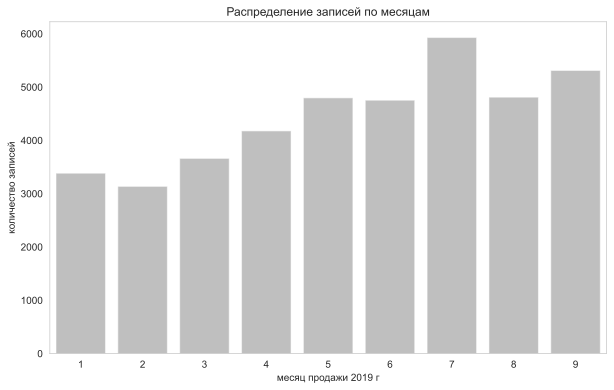

In [193]:
sns.countplot(data=df, x='Месяц_int' , color = 'gray', alpha =  0.5, );
plt.xlabel('месяц продажи 2019 г');
plt.title('Распределение записей по месяцам')
plt.ylabel('количество записей')
plt.grid(False)
plt.savefig('раcпр по месяцам.png', dpi = 100, bbox_inches='tight') 



In [194]:
# приведение пустых значений к виду nan, для корректного построения графика
df['Год_выпуска'] = np. where(df['Год_выпуска'].isnull(), np.nan, df['Год_выпуска'])
df['Количество'] = np. where(df['Количество'].isnull(), np.nan, df['Количество'])

In [195]:
columns_all = ['Компания', 'Бренд', 'Страна-производитель', 'Количество', 'Год_выпуска', 'Вид_топлива', 'Коробка_передач', 'Сегмент_двиг_л',
       'Тип_привода', 'Город', 'Сегмент', 'Класс_2013']

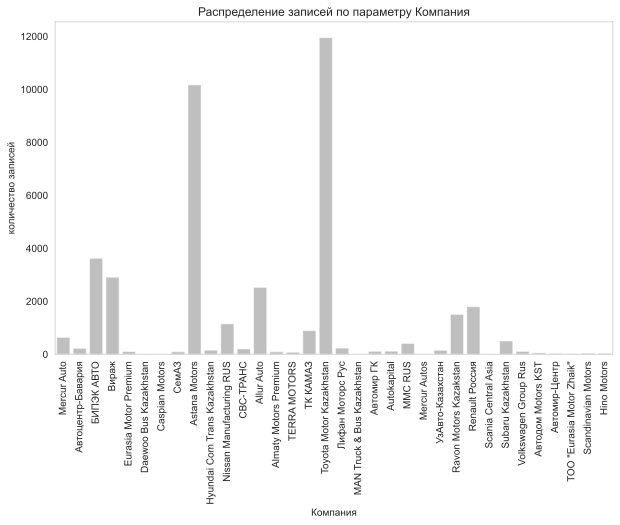

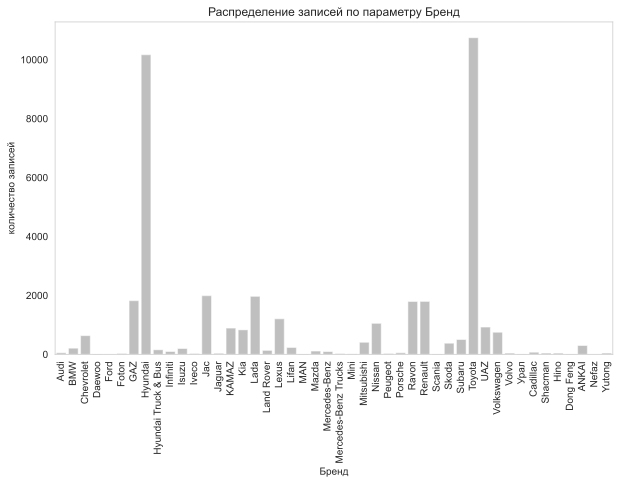

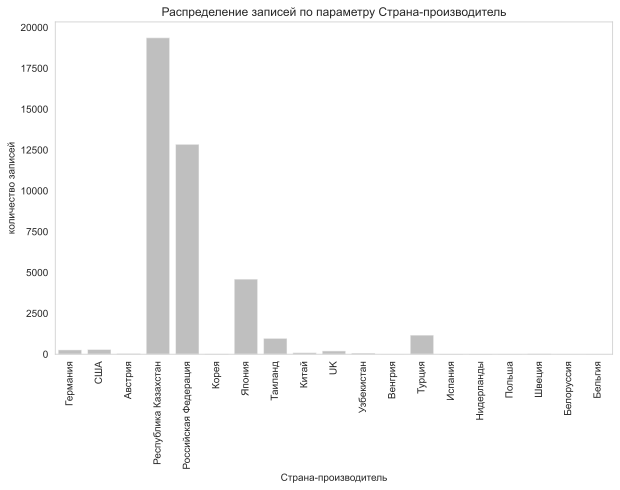

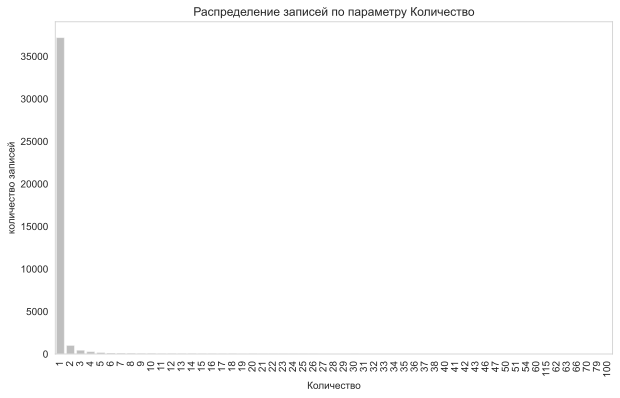

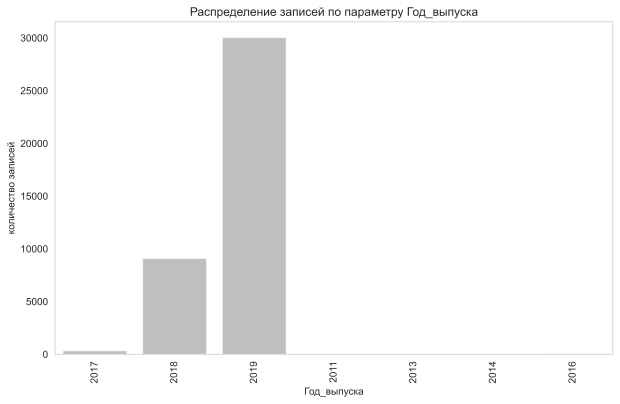

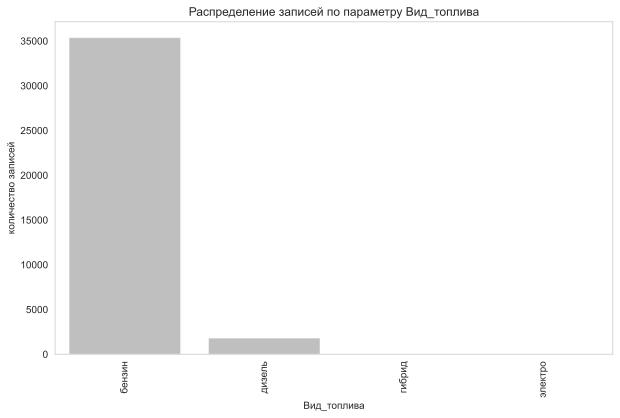

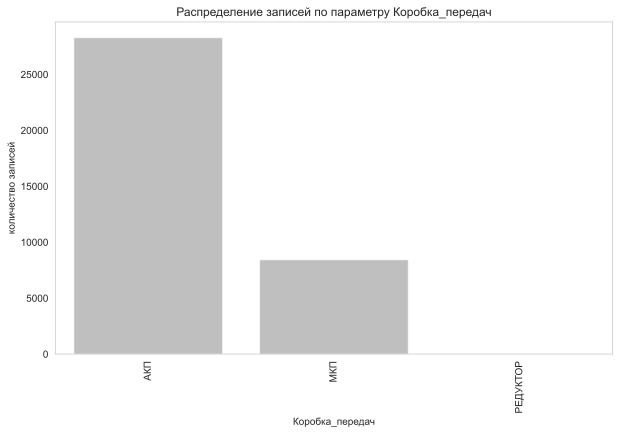

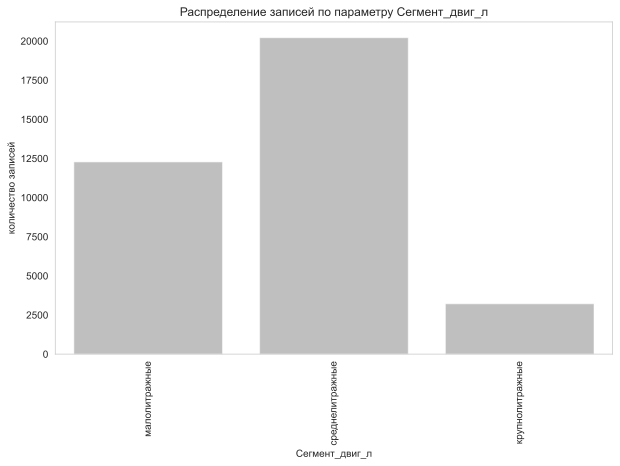

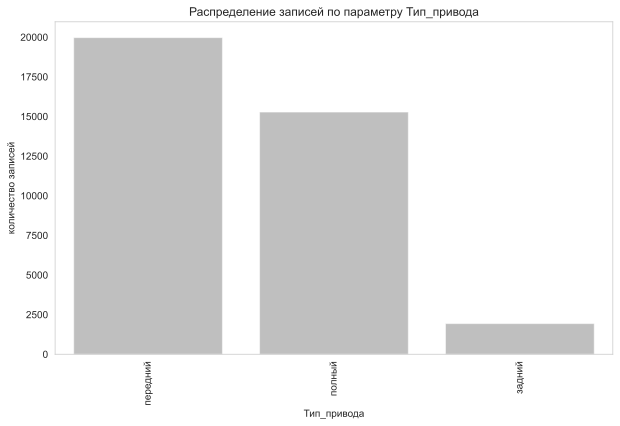

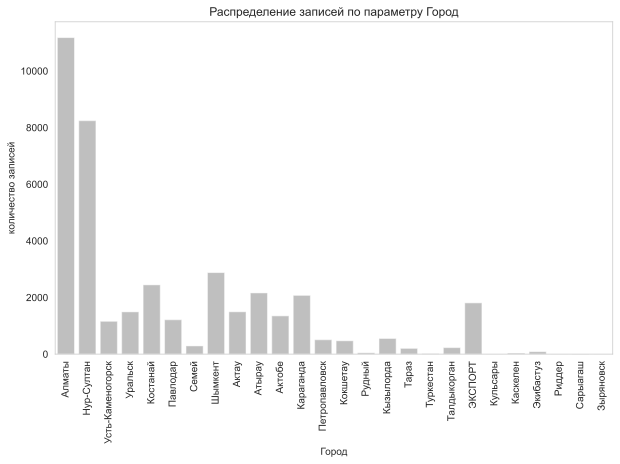

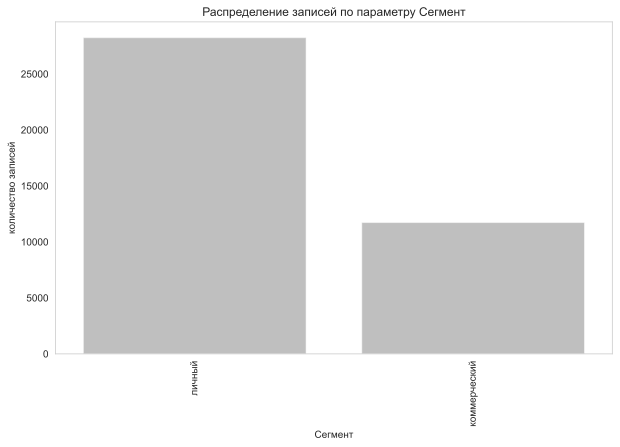

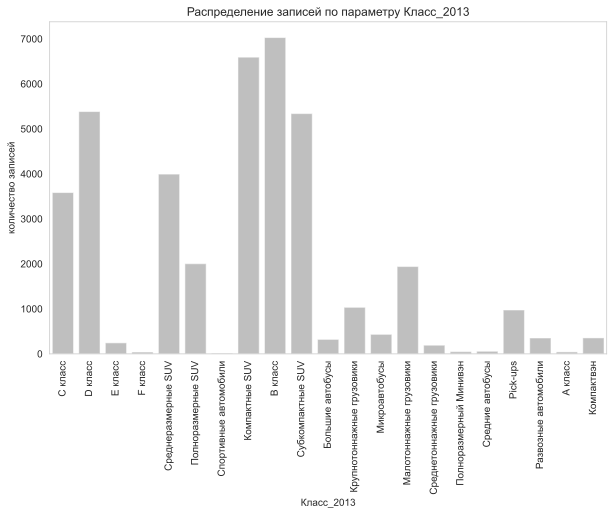

In [196]:
for col in columns_all:
    sns.countplot(data=df, x= col , color = 'gray', alpha =  0.5, );

    plt.title(f'Распределение записей по параметру {col}')
    plt.ylabel('количество записей')
    plt.xticks( rotation=90)
    plt.grid(False)
    # plt.savefig(f'раcпр {col}.png', dpi = 100, bbox_inches='tight')
    plt.show();


### 2.8 Вывод 
Переменные распределены очень не равномерно по категориям. Есть явные фавориты. Будем оценивать это в дальнейшем

## 3. Анализ рынка
### 3.1. общее кол-во продаж по времени

Что бы посчитать кол-во продаж нам нужно учесть столбец кол-во машин, т.к. в одной сделке может быть несколько одинаковых позиций.

In [197]:
df_cnt = df.groupby(['Месяц', 'Месяц_int']).agg(cnt = ('Количество', 'sum')).reset_index().sort_values(by = 'Месяц_int')

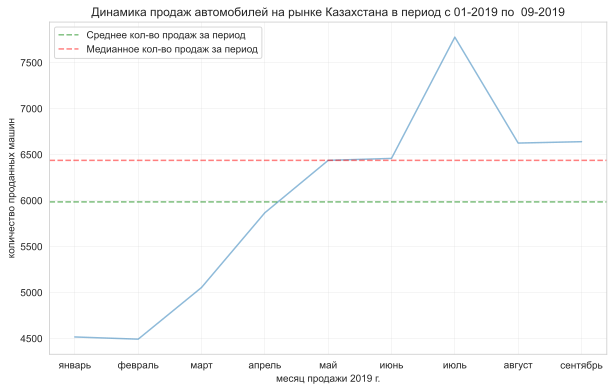

In [198]:
mean_value = df_cnt ['cnt'].mean()
median_value = np.median(df_cnt ['cnt'])

plt.plot(df_cnt ['Месяц'], df_cnt ['cnt'], alpha=0.5)
# plt.scatter(df_cnt ['Месяц'], df_cnt ['cnt'], color='red')

plt.ylabel('количество проданных машин')
plt.xlabel('месяц продажи 2019 г.')
plt.axhline(y=mean_value, alpha=0.5, linestyle='--', color='green', label='Среднее кол-во продаж за период' )
plt.axhline(y=median_value , alpha=0.5, linestyle='--', color='red', label='Медианное кол-во продаж за период')
plt.legend ()
plt.grid( linewidth=0.2)
plt.title('Динамика продаж автомобилей на рынке Казахстана в период с 01-2019 по  09-2019');
# plt.savefig('динамика продаж.png', dpi = 100, bbox_inches='tight')

#### 3.1.2 сумма продаж по времени

In [199]:
df_USD = df.groupby(['Месяц', 'Месяц_int']).agg(amount_USD = ('Продажа_USD', 'sum')).reset_index().sort_values(by = 'Месяц_int')

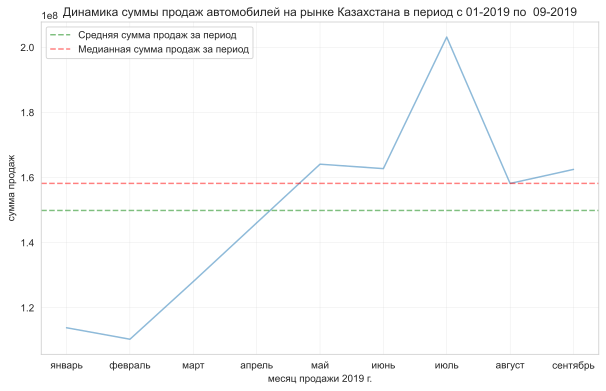

In [200]:
mean_value = df_USD ['amount_USD'].mean()
median_value = np.median(df_USD ['amount_USD'])

plt.plot(df_USD ['Месяц'], df_USD ['amount_USD'], alpha=0.5)
# plt.scatter(df_cnt ['Месяц'], df_cnt ['cnt'], color='red')

plt.ylabel('сумма продаж')
plt.xlabel('месяц продажи 2019 г.')
plt.axhline(y=mean_value, alpha=0.5, linestyle='--', color='green', label='Средняя сумма продаж за период' )
plt.axhline(y=median_value , alpha=0.5, linestyle='--', color='red', label='Медианная сумма продаж за период')
plt.legend ()
plt.grid( linewidth=0.2)
plt.title('Динамика суммы продаж автомобилей на рынке Казахстана в период с 01-2019 по  09-2019');
# plt.savefig('динамика суммы продаж.png', dpi = 100, bbox_inches='tight')

### 3.2. общая оценка кол-во продаж по параметрам (сегменты, регионы) и времени

#### 3.2.1. Сегмент: личный и коммерческий транспорт

In [201]:
df_cnt_segment = df.groupby(['Месяц', 'Месяц_int', 'Сегмент']).agg(cnt = ('Количество', 'sum')).reset_index().sort_values(by = 'Месяц_int')

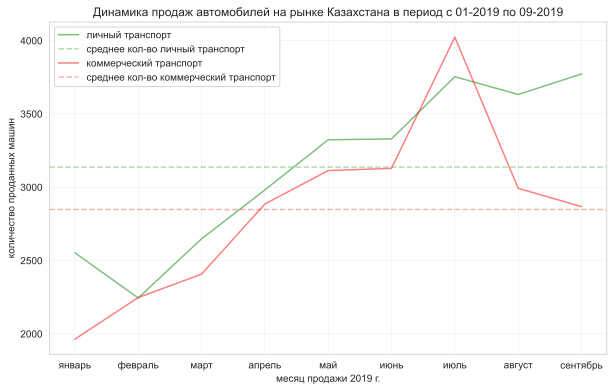

In [202]:
mean_value_p = df_cnt_segment[df_cnt_segment['Сегмент']== 'личный'] ['cnt'].mean()
mean_value_k = df_cnt_segment[df_cnt_segment['Сегмент']== 'коммерческий'] ['cnt'].mean()

plt.plot(df_cnt_segment[df_cnt_segment['Сегмент']== 'личный'] ['Месяц'], df_cnt_segment[df_cnt_segment['Сегмент']== 'личный'] ['cnt'], alpha=0.5, color = 'green', label='личный транспорт')
plt.axhline(y=mean_value_p, alpha=0.3, linestyle='--', color='green', label='cреднее кол-во личный транспорт' )
plt.plot(df_cnt_segment[df_cnt_segment['Сегмент']== 'коммерческий'] ['Месяц'], df_cnt_segment [df_cnt_segment['Сегмент']== 'коммерческий']['cnt'], alpha=0.5, color = 'red', label='коммерческий транспорт')
plt.axhline(y=mean_value_k, alpha=0.3, linestyle='--', color='red', label='cреднее кол-во коммерческий транспорт' )

plt.ylabel('количество проданных машин')
plt.xlabel('месяц продажи 2019 г.')

plt.legend ()
plt.grid( linewidth=0.2)
plt.title('Динамика продаж автомобилей на рынке Казахстана в период с 01-2019 по 09-2019');
# plt.savefig('динамика сегмент.png', dpi = 100 , bbox_inches='tight')

#### 3.2.2. Области (регионы) и города

In [203]:
df_city = df.groupby(['Месяц', 'Месяц_int', 'Область','Сегмент' ]).agg(cnt = ('Количество', 'sum')).reset_index().sort_values(by = 'cnt', ascending= False)

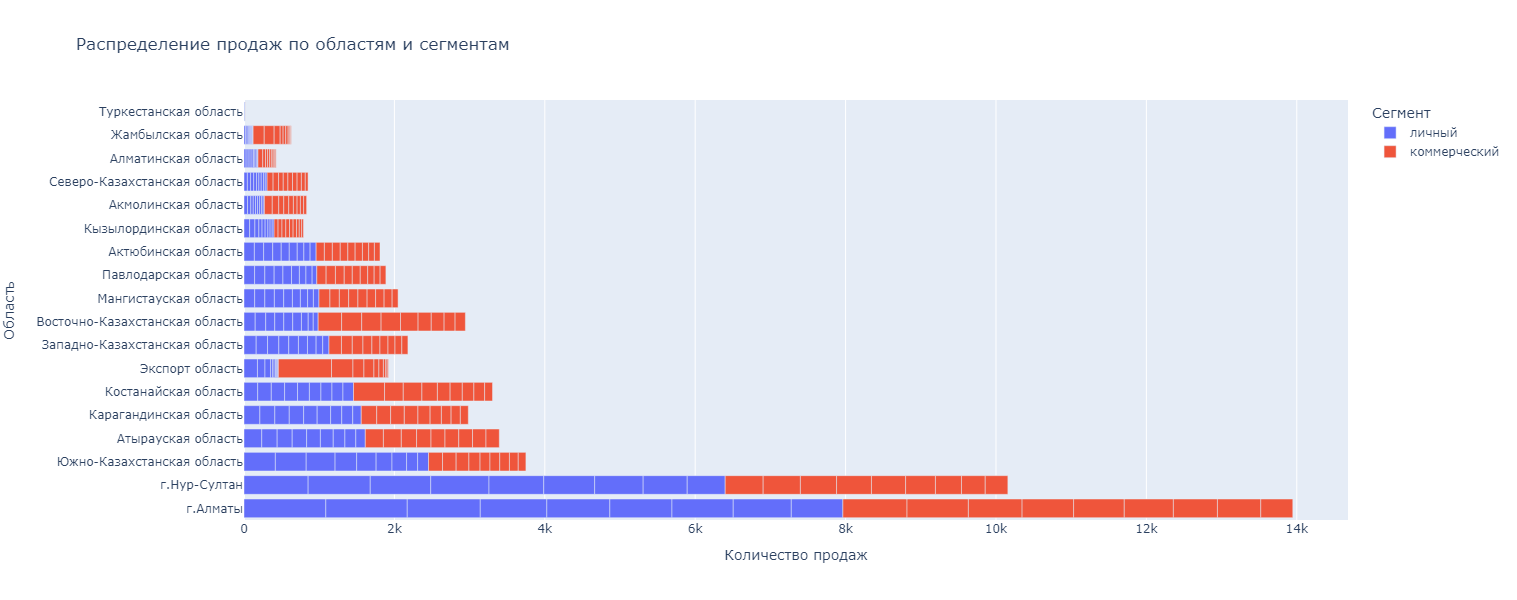

In [204]:
fig = px.bar(df_city, x='cnt', y= 'Область', color='Сегмент', orientation='h', 
             height=600,
             title='Распределение продаж по областям и сегментам',
          labels={'cnt':'Количество продаж','Область':'Область' }  )

fig.show();

In [205]:
# график плотли интерактивынй , отобразиться после перезагрузки тетерадки. Скриншот для просмотра


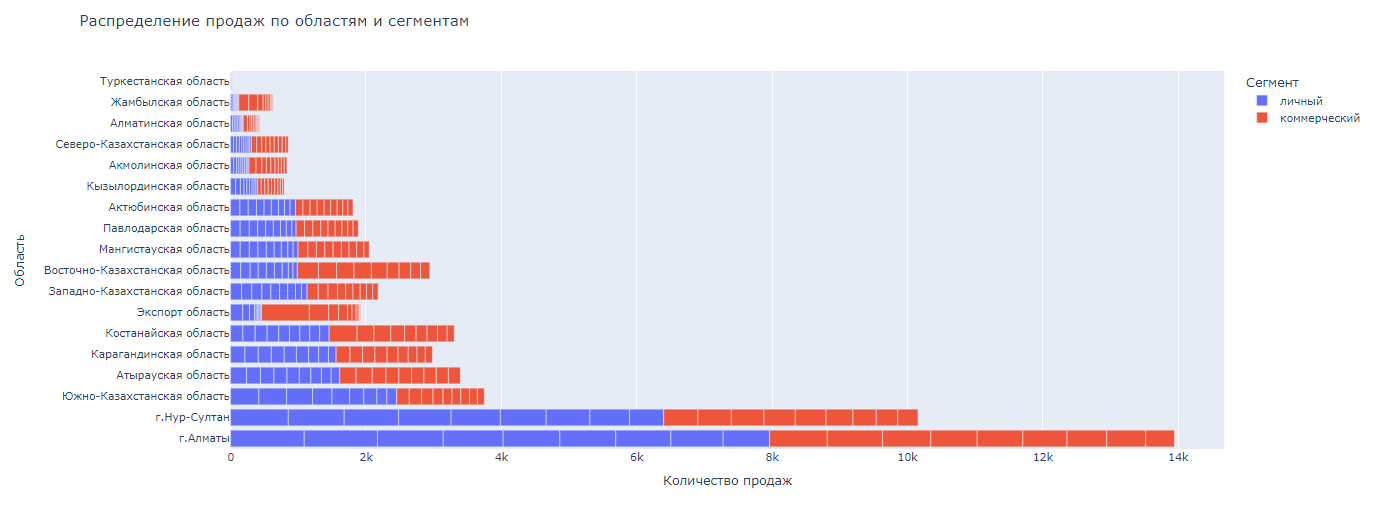

Хоть график получился достаточно подробный, он не очень информативный, слишком загруженный. Упростим.


In [206]:
df_city.groupby('Область').agg({'cnt':'sum'}).reset_index().sort_values(by = 'cnt', ascending= False)

Область    cnt
16                        г.Алматы  13947
17                    г.Нур-Султан  10158
15      Южно-Казахстанская область   3749
3               Атырауская область   3395
8             Костанайская область   3305
7           Карагандинская область   2983
4   Восточно-Казахстанская область   2944
6    Западно-Казахстанская область   2180
10           Мангистауская область   2049
14                 Экспорт область   1919
11            Павлодарская область   1887
1              Актюбинская область   1809
12    Северо-Казахстанская область    852
0              Акмолинская область    833
9           Кызылординская область    791
5               Жамбылская область    628
2              Алматинская область    427
13           Туркестанская область     19

In [207]:
pivot_city = pd.pivot_table(data=df_city,
                            index=['Область','Месяц_int'], 
                            columns='Сегмент', 
                            values='cnt',  
                            aggfunc='sum',  
                            fill_value=0).reset_index() 

In [208]:
pivot_city

Сегмент              Область  Месяц_int  коммерческий  личный
0        Акмолинская область          1            43      23
1        Акмолинская область          2            49      16
2        Акмолинская область          3            40      25
3        Акмолинская область          4            86      27
4        Акмолинская область          5           105      47
..                       ...        ...           ...     ...
150             г.Нур-Султан          5           505     728
151             г.Нур-Султан          6           464     775
152             г.Нур-Султан          7           481     853
153             г.Нур-Султан          8           397     804
154             г.Нур-Султан          9           454     826

[155 rows x 4 columns]

Интересно посмотреть, как менялась динамика покупки разного вида транспорта в каждой области по месяцам. На одном графике показать это сложно. Сделаем график для каждой области. 
Будем исследовать такую гипотезу: динамика покупки по сегментам не зависит от региона (динамика совпадает с общей, без разбивки на регионы).

In [209]:
region = list(pivot_city['Область'].unique())

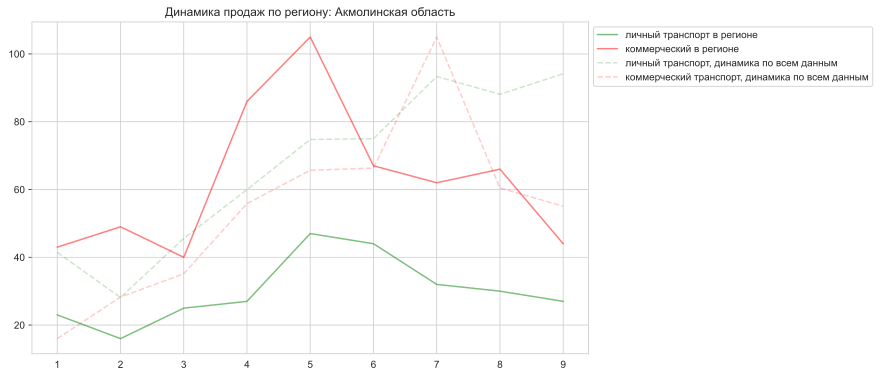

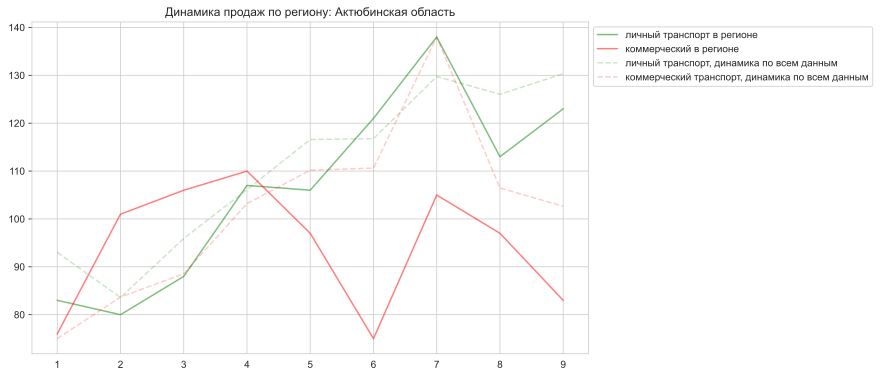

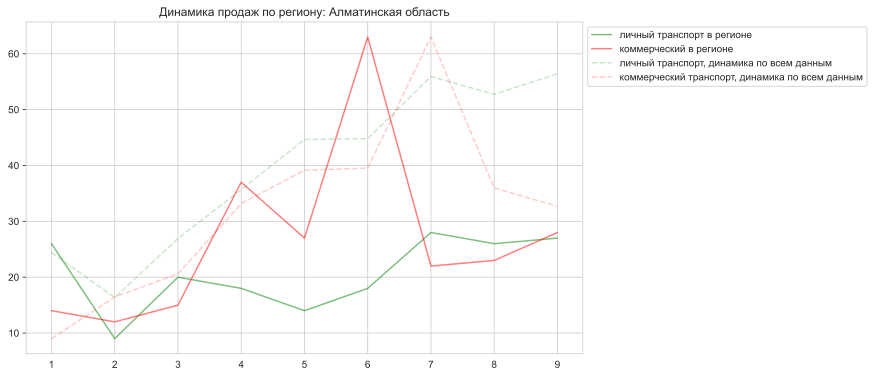

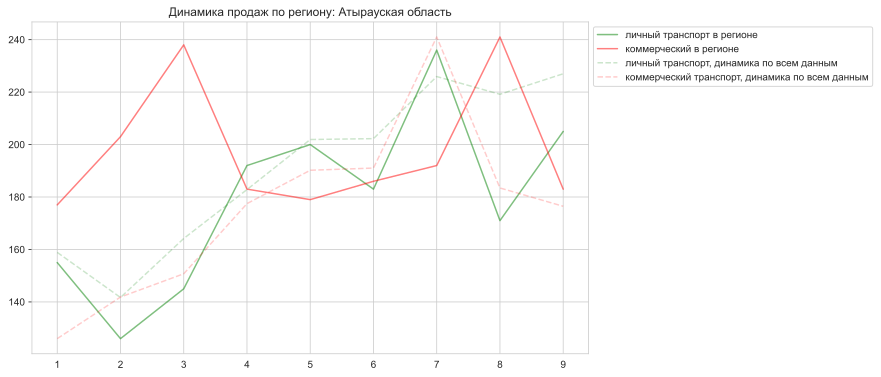

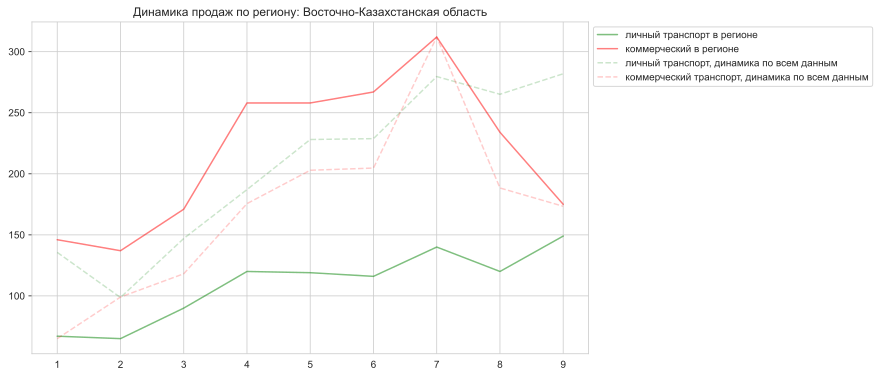

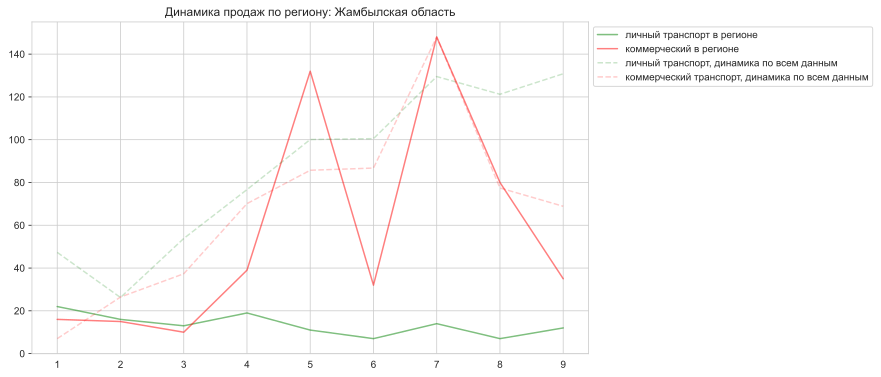

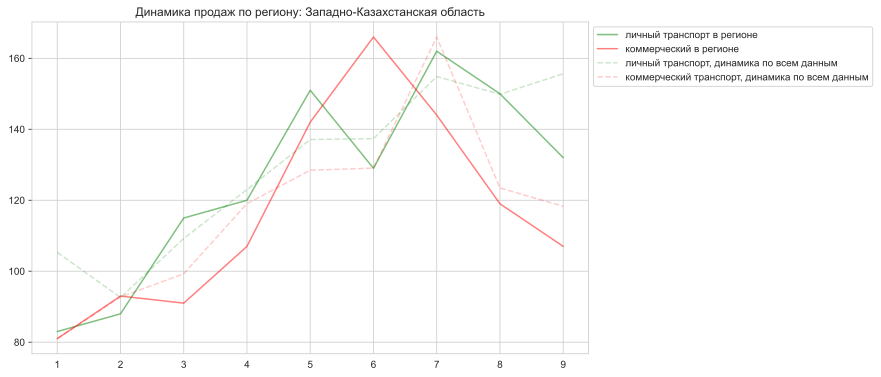

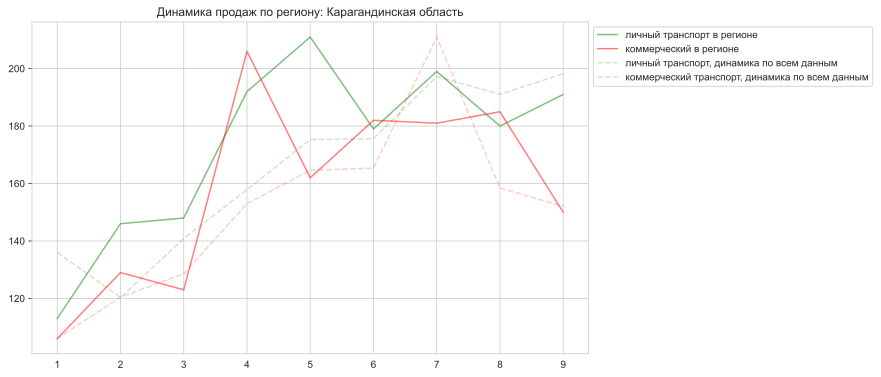

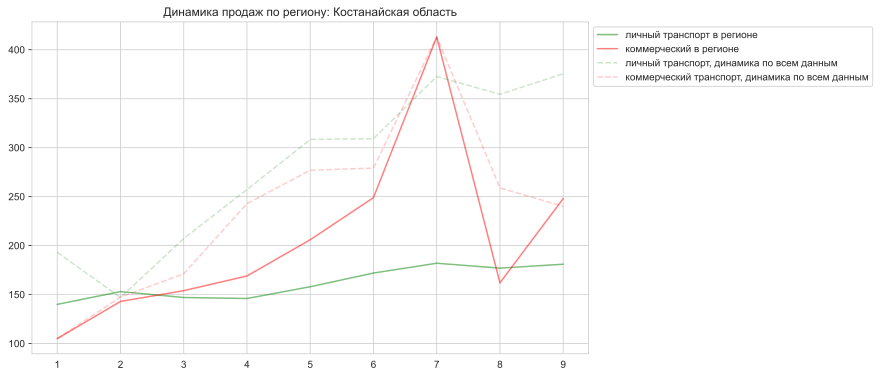

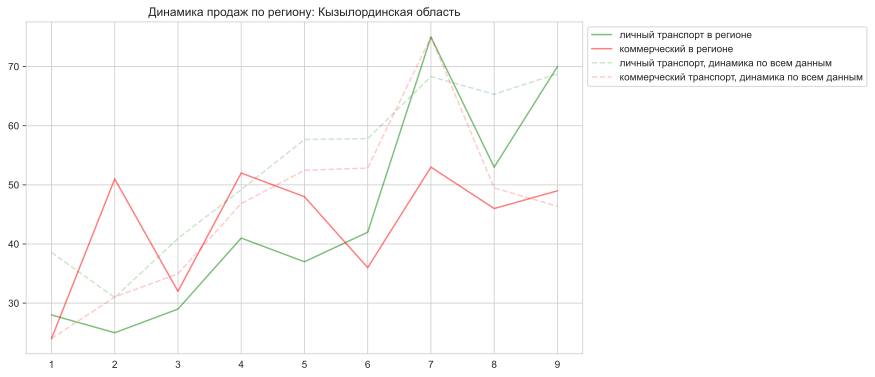

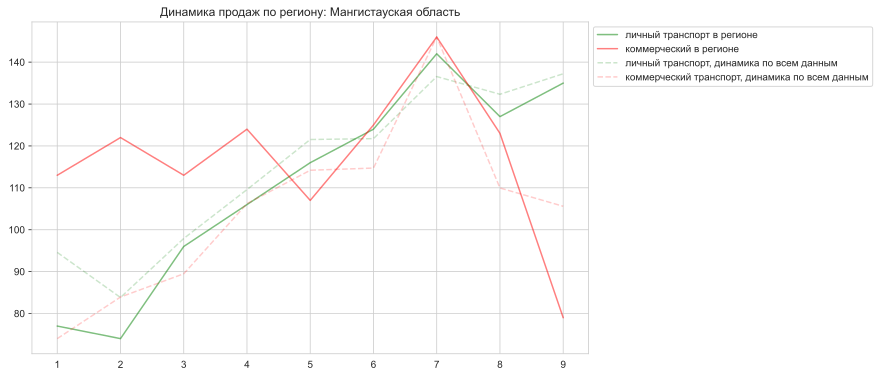

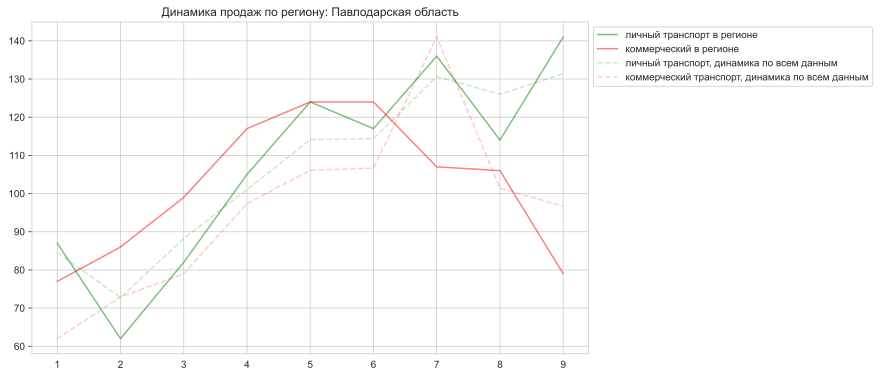

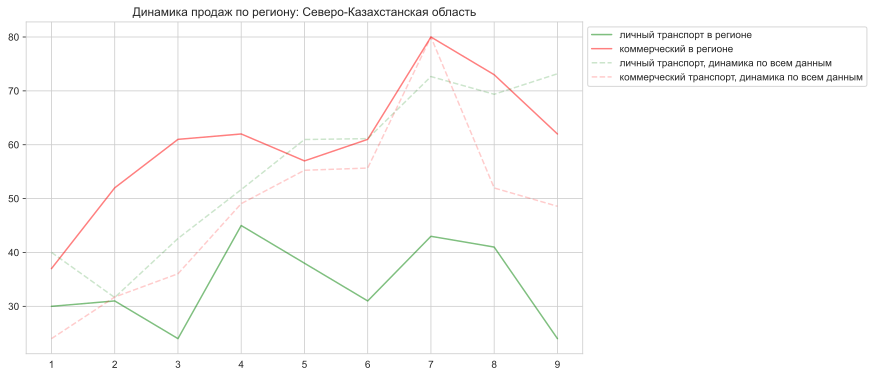

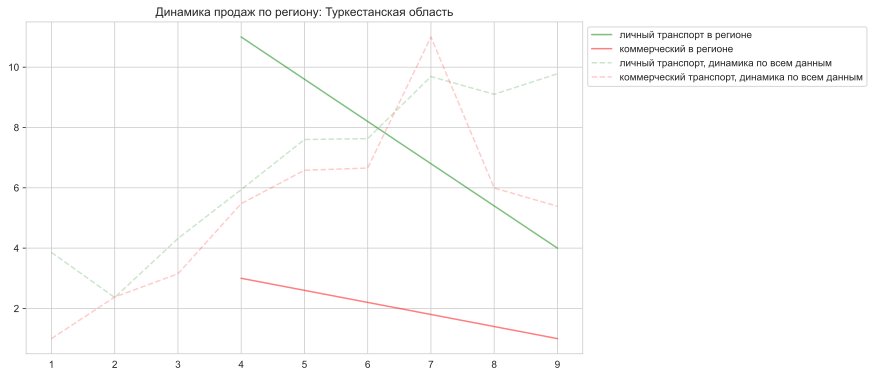

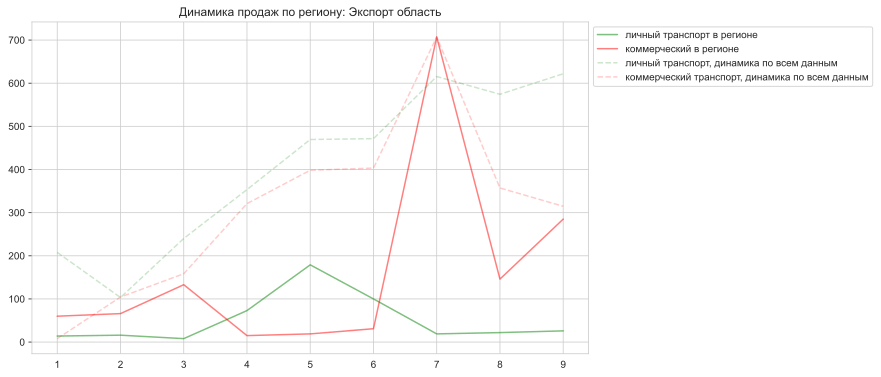

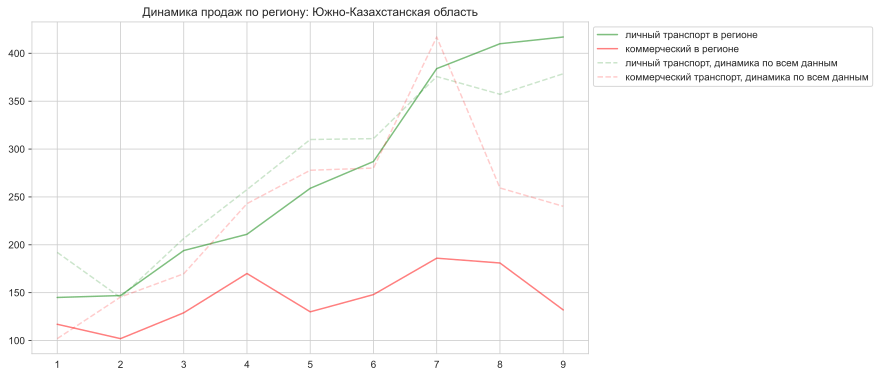

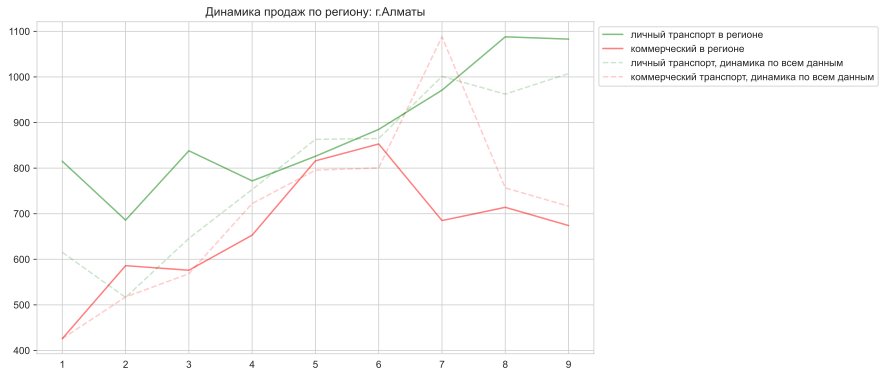

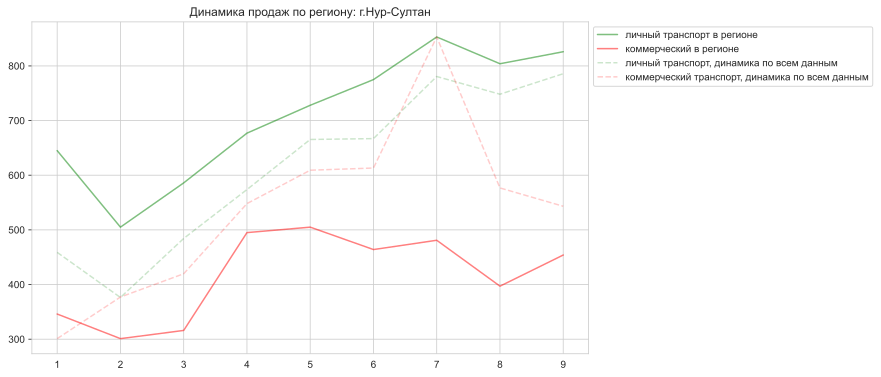

In [210]:
for reg in region:
    df_1 = pivot_city[pivot_city['Область'] == reg]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # объединение разных осей на одном графике. Тут не  важно количество общих продаж, важно сравнить динамику продаж в регионе и общую.

    
    ax1.plot(df_1['Месяц_int'], df_1['личный'], alpha=0.5, color = 'green', label='личный транспорт в регионе')
    ax1.plot(df_1['Месяц_int'], df_1['коммерческий'], alpha=0.5, color = 'red', label='коммерческий в регионе')

    ax2.plot(df_cnt_segment[df_cnt_segment['Сегмент']== 'личный'] ['Месяц_int'], df_cnt_segment[df_cnt_segment['Сегмент']== 'личный'] ['cnt'], linestyle='--', alpha=0.2, color = 'green', label='личный транспорт, динамика по всем данным')
    ax2.plot(df_cnt_segment[df_cnt_segment['Сегмент']== 'коммерческий'] ['Месяц_int'], df_cnt_segment[df_cnt_segment['Сегмент']== 'коммерческий'] ['cnt'], linestyle='--', alpha=0.2, color = 'red', label='коммерческий транспорт, динамика по всем данным')


    

    plt.title(f'Динамика продаж по региону: {reg}')
    plt.ylabel('количество продаж')
    plt.xlabel('месяц')
    # plt.xticks( rotation=90)
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    ax1.legend(h1 + h2, l1 + l2, loc=0, bbox_to_anchor=(1,1));
    
    ax2.axis('off') # убираем ось кол-ва общих продаж
    #  plt.savefig(f'динамика продаж по региону {reg}.png', dpi = 100, bbox_inches='tight')
    
    plt.show();

#### 3.2.2. Вывод
Предположение не подтведилось. Динамика продаж личного и коммерческого транспорта в каждом регионе своя и не повторяет общую (без разбивки по регионам). В некоторых регионах сегменты распределены очень неравномерно, что позволяет сделать вывод, что покупка личного или коммерческого транспорта сильно различается в разных регионах. Так же графики хорошо показывают, что спад и увеличение продаж в каждом регионе свои, даже в рамках разных сегментах. Поэтому оценивть продажи в целом не совсем логично. Они очень различаются в зависимости от региона. 

#### 3.3.3. Выделим Топ-10 областей, где самые большие продажи и разделим их по сегменту. Распределим их по увеличению по кажому виду транспорта.

In [211]:
city10 = list(df_city.groupby('Область').agg({'cnt':'sum'}).reset_index().sort_values(by = 'cnt', ascending= False).head(10)['Область'])

In [212]:
df_city_Top10 = df_city[df_city['Область'].isin(city10)].groupby(['Область', 'Сегмент']).agg({'cnt':'sum'}).reset_index().sort_values(by = 'cnt', ascending= False)

In [213]:
df_city_Top10

Область       Сегмент   cnt
17                        г.Алматы        личный  7964
19                    г.Нур-Султан        личный  6399
16                        г.Алматы  коммерческий  5983
18                    г.Нур-Султан  коммерческий  3759
15      Южно-Казахстанская область        личный  2454
2   Восточно-Казахстанская область  коммерческий  1958
8             Костанайская область  коммерческий  1849
0               Атырауская область  коммерческий  1782
1               Атырауская область        личный  1613
7           Карагандинская область        личный  1559
12                 Экспорт область  коммерческий  1462
9             Костанайская область        личный  1456
6           Карагандинская область  коммерческий  1424
14      Южно-Казахстанская область  коммерческий  1295
5    Западно-Казахстанская область        личный  1130
10           Мангистауская область  коммерческий  1052
4    Западно-Казахстанская область  коммерческий  1050
11           Мангистауская область        личный   997
3   Восточно-Казахстанская область        личный   986
13                 Экспорт область        личный   457

In [214]:
city10_com = df_city_Top10[df_city_Top10['Сегмент']== 'коммерческий'][['Область', 'cnt']].sort_values(by = 'cnt', ascending= False)
city10_com

Область   cnt
16                        г.Алматы  5983
18                    г.Нур-Султан  3759
2   Восточно-Казахстанская область  1958
8             Костанайская область  1849
0               Атырауская область  1782
12                 Экспорт область  1462
6           Карагандинская область  1424
14      Южно-Казахстанская область  1295
10           Мангистауская область  1052
4    Западно-Казахстанская область  1050

In [215]:
city10_priv = df_city_Top10[df_city_Top10['Сегмент']== 'личный'][['Область', 'cnt']].sort_values(by = 'cnt', ascending= False)
city10_priv 

Область   cnt
17                        г.Алматы  7964
19                    г.Нур-Султан  6399
15      Южно-Казахстанская область  2454
1               Атырауская область  1613
7           Карагандинская область  1559
9             Костанайская область  1456
5    Западно-Казахстанская область  1130
11           Мангистауская область   997
3   Восточно-Казахстанская область   986
13                 Экспорт область   457

#### 3.3.3. Вывод
Первые 2 места совпадают для обоих сегментов, но потом порядок меняется. Это еще раз доказывает, что продажа различных видов автомобилей сильно зависит от региона.

### 3.3. Оценка выручки от продаж по регионам. Топ 10.

In [216]:
df_sales_amount = df.groupby('Область').agg(sales_amount_USD = ('Продажа_USD', 'sum')).sort_values(by = 'sales_amount_USD', ascending= False).reset_index()
df_sales_amount['sales_amount_USD'] = round(df_sales_amount['sales_amount_USD']).astype('Int64')
df_sales_amount

Область  sales_amount_USD
0                         г.Алматы         426474005
1                     г.Нур-Султан         292675683
2             Костанайская область          88334490
3       Южно-Казахстанская область          81816964
4               Атырауская область          74717533
5   Восточно-Казахстанская область          60444537
6           Карагандинская область          59959741
7            Мангистауская область          46727492
8    Западно-Казахстанская область          45829901
9              Актюбинская область          44215178
10                 Экспорт область          37882052
11            Павлодарская область          36074326
12    Северо-Казахстанская область          13381143
13             Акмолинская область          11785048
14          Кызылординская область          11544217
15              Жамбылская область          10094921
16             Алматинская область           6384614
17           Туркестанская область            852711

In [217]:
df_sales_amount_month = df.groupby(['Область', 'Месяц_int', 'Месяц']).agg(sales_amount_USD = ('Продажа_USD', 'sum')).reset_index()
df_sales_amount_month['sales_amount_USD'] = round(df_sales_amount_month['sales_amount_USD']).astype('Int64')
df_sales_amount_month

Область  Месяц_int     Месяц  sales_amount_USD
0    Акмолинская область          1    январь            973744
1    Акмолинская область          2   февраль            798206
2    Акмолинская область          3      март            861210
3    Акмолинская область          4    апрель           1495424
4    Акмолинская область          5       май           2293304
..                   ...        ...       ...               ...
150         г.Нур-Султан          5       май          35095602
151         г.Нур-Султан          6      июнь          35493002
152         г.Нур-Султан          7      июль          38115236
153         г.Нур-Султан          8    август          34163545
154         г.Нур-Султан          9  сентябрь          36773326

[155 rows x 4 columns]

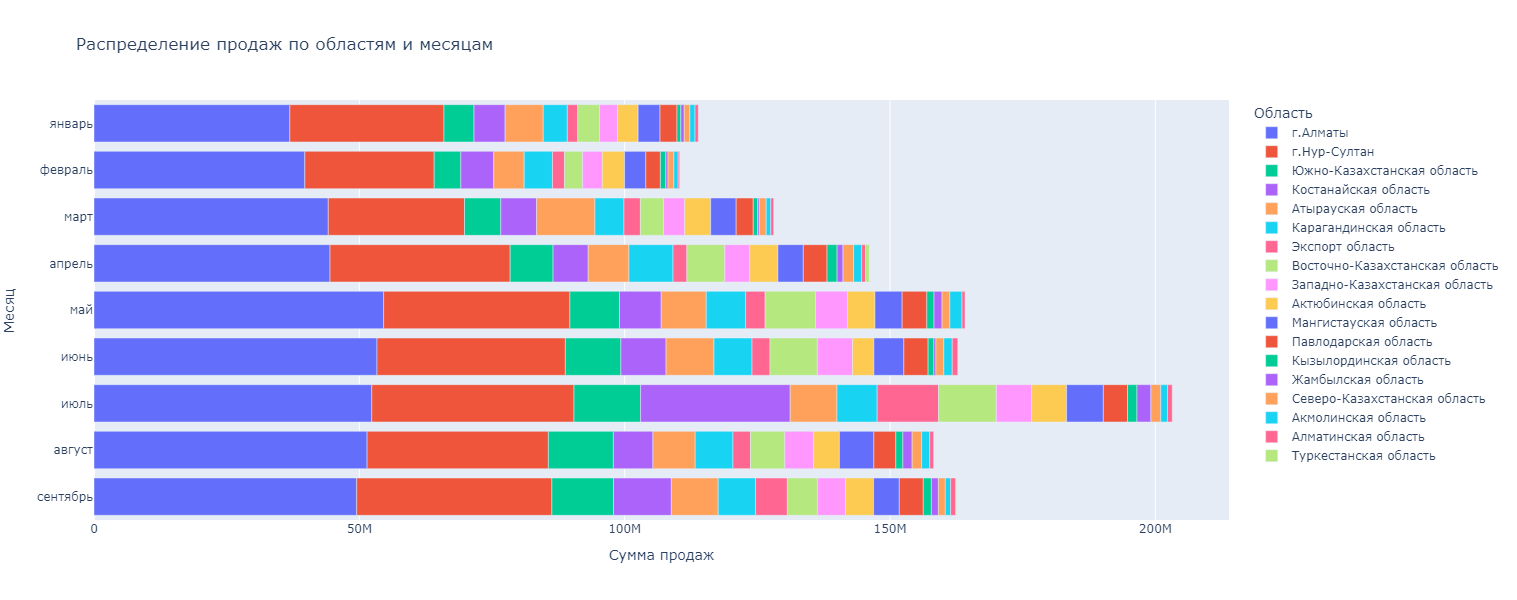

In [218]:
fig = px.bar(df_sales_amount_month.sort_values(by = ['Месяц_int','sales_amount_USD'], ascending= False), x='sales_amount_USD', y= 'Месяц', color='Область', orientation='h', 
             height=600,
             title='Распределение продаж по областям и месяцам',
          labels={'sales_amount_USD':'Сумма продаж','Область':'Область' }  )

fig.show();

In [219]:
# график плотли интерактивынй , отобразиться после перезагрузки тетерадки. Скриншот для просмотра

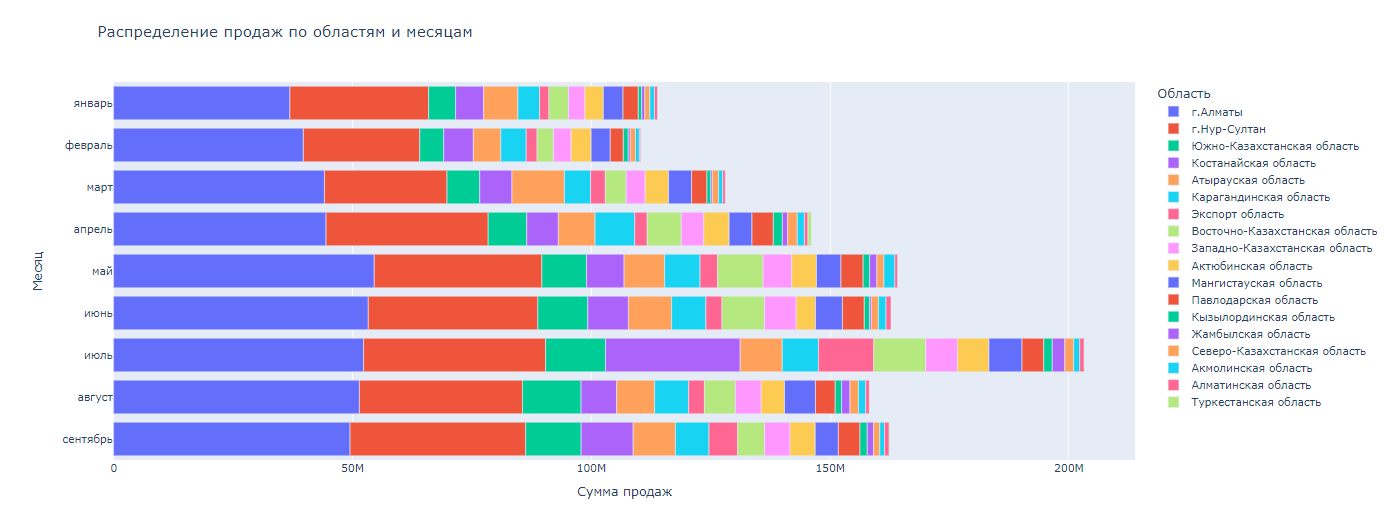

### 3.3 Вывод

График достатоно насыщенный, но в целом видно, что в июле был всплеск по общей сумме продаж, и в июле же в Костанайской области произошел скачек по продажам. 

График plotly интерактивный и можно выбрать конкретные области, что бы сравнить показатели только в них.

### 3.4. продажи, лидеры рынка по брендам 
    

In [220]:
df_brand = df.groupby('Бренд').agg(sales_amount_USD = ('Продажа_USD', 'sum')).sort_values(by = 'sales_amount_USD', ascending= False).reset_index()
df_brand['sales_amount_USD'] = round(df_brand['sales_amount_USD']).astype('Int64')
df_brand.head(10)

Бренд  sales_amount_USD
0   Toyota         402500068
1  Hyundai         229307596
2     Lada         107847479
3    Lexus          77376372
4    KAMAZ          46092683
5      Kia          45669700
6   Nissan          40012772
7      GAZ          32286199
8      Jac          30589381
9    ANKAI          28907055

In [221]:
df_brand_month = df.groupby(['Бренд', 'Месяц_int', 'Месяц']).agg(sales_amount_USD = ('Продажа_USD', 'sum')).reset_index()
df_brand_month['sales_amount_USD'] = round(df_brand_month['sales_amount_USD']).astype('Int64')
df_brand_month

Бренд  Месяц_int     Месяц  sales_amount_USD
0    ANKAI          3      март           3378513
1    ANKAI          5       май           4251357
2    ANKAI          6      июнь           1849907
3    ANKAI          7      июль          17100539
4    ANKAI          8    август            401472
..     ...        ...       ...               ...
358   Урал          3      март             77119
359   Урал          5       май            408432
360   Урал          7      июль           1025084
361   Урал          8    август           1285594
362   Урал          9  сентябрь            220119

[363 rows x 4 columns]

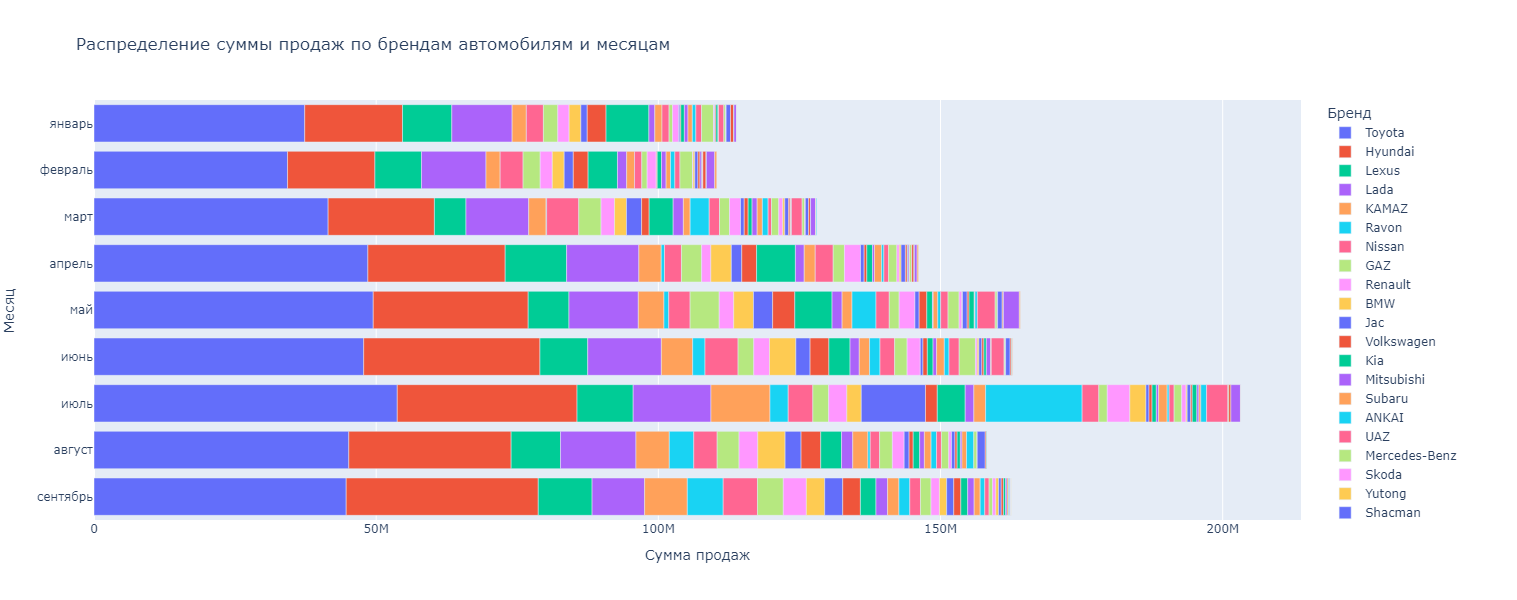

In [222]:
fig = px.bar(df_brand_month.sort_values(by = ['Месяц_int','sales_amount_USD'], ascending= False), x='sales_amount_USD', y= 'Месяц', color='Бренд', orientation='h', 
             height=600,
             title='Распределение суммы продаж по брендам автомобилям и месяцам',
          labels={'sales_amount_USD':'Сумма продаж','Бренд':'Бренд' }  )

fig.show();

In [223]:
# график плотли интерактивынй , отобразиться после перезагрузки тетерадки. Скриншот для просмотра

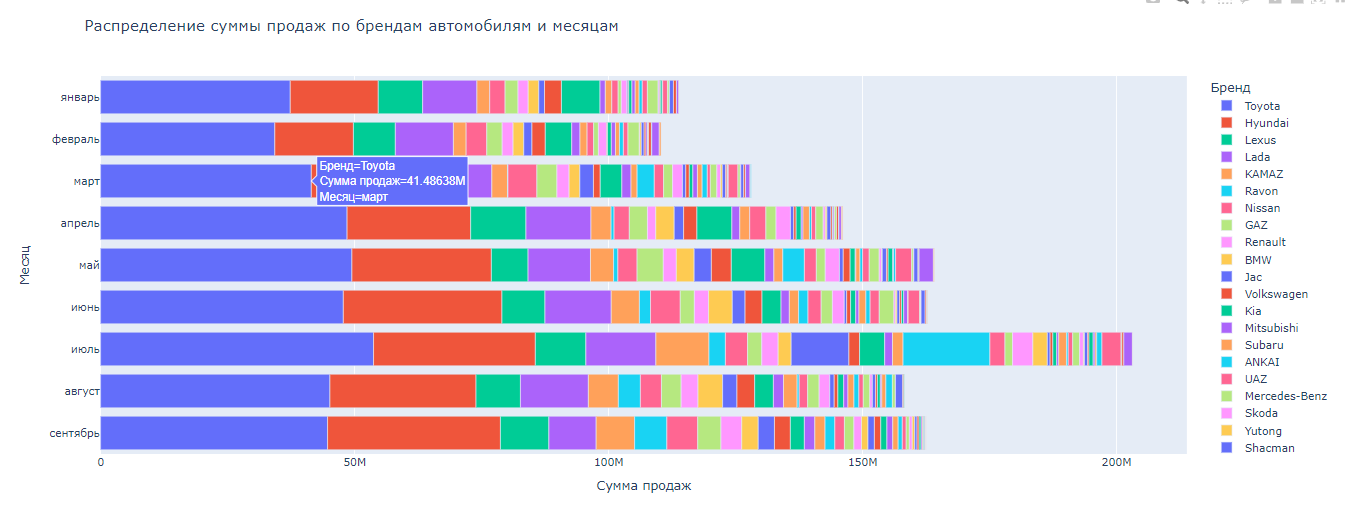

### 3.4 Вывод
Фавориты продаж в целом не меняются, Toyota, Нyundai и Лада.

График plotly интерактивный и можно выбрать конкретные бренды, что бы сравнить показатели только в них.

Июль - месяц выбивается из всех не только по сумме продаж, но и по резкому увеличению продаж марок Камаз, Jac, Ankai. Камаз и Ankai - это грузовые автомобили и автобусы. JAС выпускает разные марки, в т.ч.  грузовые. Посмотрим отдельно % продажи коммерческих машин этой марки в июле.

In [224]:
df[(df['Месяц']=='июль')& (df['Бренд']=='Jac')].groupby('Сегмент').agg({'Продажа_USD':'sum'})

Продажа_USD
Сегмент                   
коммерческий 9,778,828.227
личный       1,597,206.336

In [225]:
df[df['Месяц']=='июль'].groupby('Сегмент').agg({'Продажа_USD':'sum'})

Продажа_USD
Сегмент                     
коммерческий 101,067,207.766
личный       102,112,648.503

В целом в июле сумма продаж по личному и коммерческому транспорту близка, но обнаружен сильный всплеск покупок комерческого трансорта отдельных марок. Возможно были какие то льготы для именно таких покупок?

### 3.5. продажи, бренды фавориты по сегментам (личный/коммерческий)
Посмотрим, как распределяется сегмент автомобиля по маркам. Будем оценивать не кол-во проданных машин, а сумму продаж. Т.к. марок у нас много, ограничимся Топ-10 по продажам.

In [226]:
brand10 = list(df_brand['Бренд'].head(10))
brand10

['Toyota',
 'Hyundai',
 'Lada',
 'Lexus',
 'KAMAZ',
 'Kia',
 'Nissan',
 'GAZ',
 'Jac',
 'ANKAI']

In [227]:
df_brand_month_seg = df.groupby(['Месяц', 'Месяц_int', 'Бренд','Сегмент' ]).agg(sales_amount_USD = ('Продажа_USD', 'sum')).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_brand_month_seg

Месяц  Месяц_int    Бренд       Сегмент  sales_amount_USD
176      июль          7   Toyota        личный    41,118,673.364
435  сентябрь          9   Toyota        личный    38,147,226.920
57     август          8   Toyota        личный    37,747,385.518
117    апрель          4   Toyota        личный    36,899,869.075
309       май          5   Toyota        личный    35,937,267.702
..        ...        ...      ...           ...               ...
44     август          8  Peugeot  коммерческий        16,808.812
363      март          3  Peugeot  коммерческий        14,721.485
508    январь          1     Ford        личный        14,045.640
364      март          3  Peugeot        личный        13,241.379
298       май          5    Ravon  коммерческий        10,068.054

[558 rows x 5 columns]

In [228]:
pivot_brand_seg = pd.pivot_table(data=df_brand_month_seg,
                            index=['Бренд','Месяц_int'], 
                            columns='Сегмент', 
                            values='sales_amount_USD',  
                            aggfunc='sum',  
                            fill_value=0).reset_index().sort_values(by = 'Месяц_int') 
pivot_brand_seg

Сегмент       Бренд  Месяц_int  коммерческий        личный
109           Isuzu          1   155,145.885         0.000
33        Chevrolet          1   475,281.444   532,800.270
277         Renault          1         0.000 2,011,748.237
261         Porsche          1         0.000    89,000.000
42           Daewoo          1   944,660.419         0.000
..              ...        ...           ...           ...
47           Daewoo          9    97,134.575         0.000
243      Mitsubishi          9   262,693.484 1,795,295.184
55             Ford          9    26,907.216         0.000
276           Ravon          9   897,624.870 5,456,352.067
362            Урал          9   220,119.205         0.000

[363 rows x 4 columns]

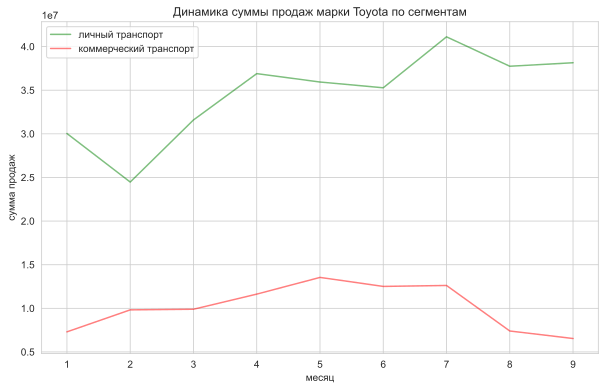

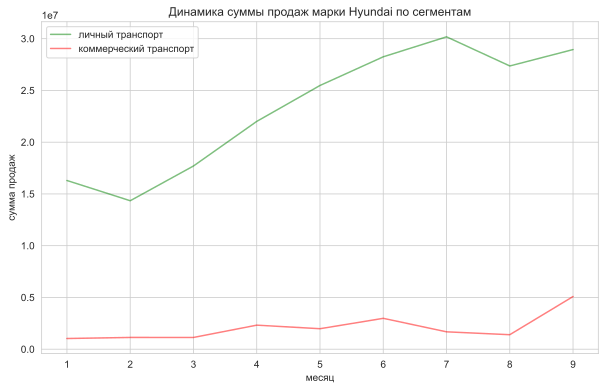

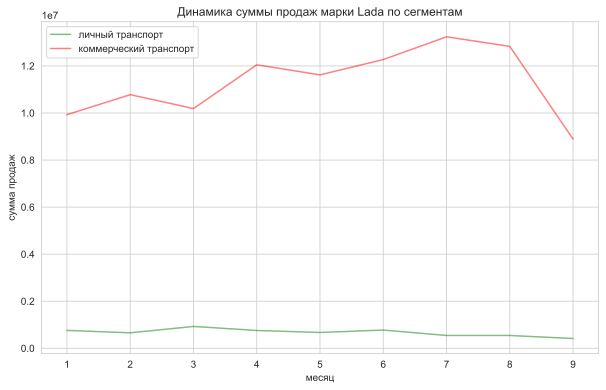

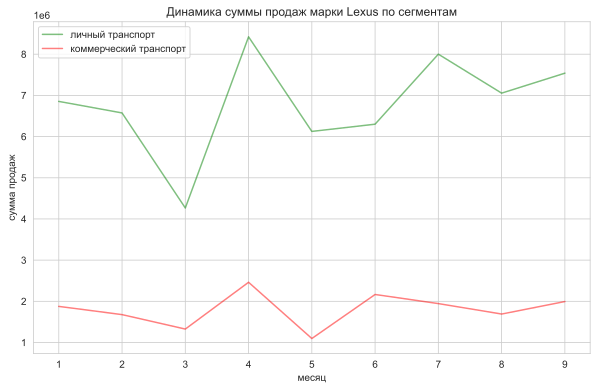

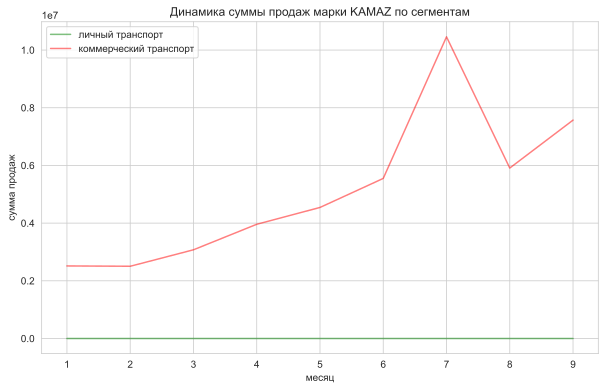

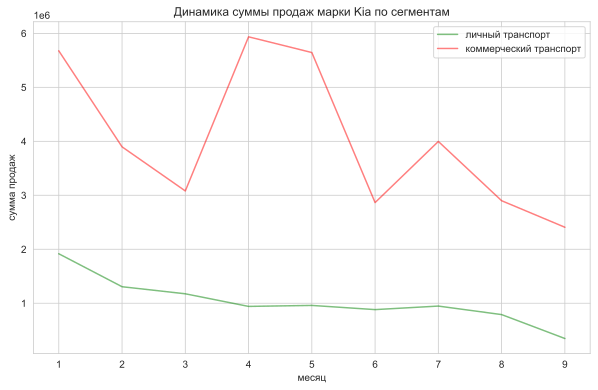

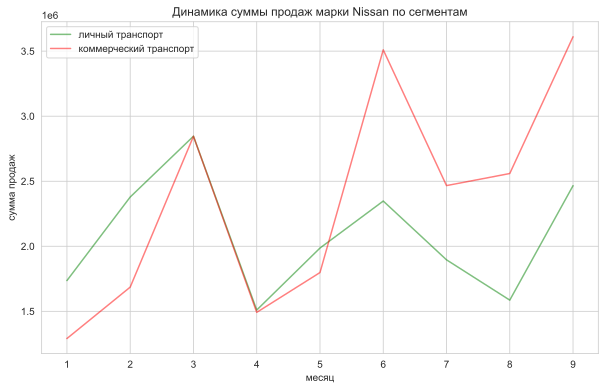

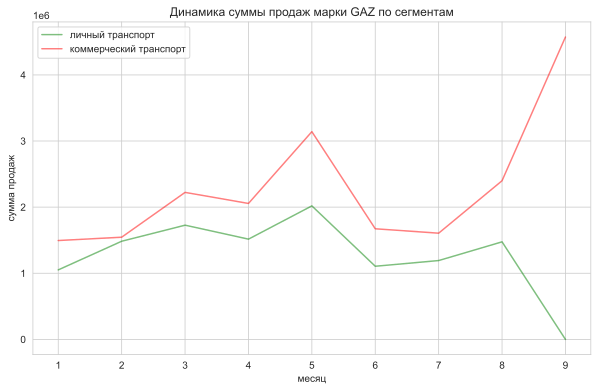

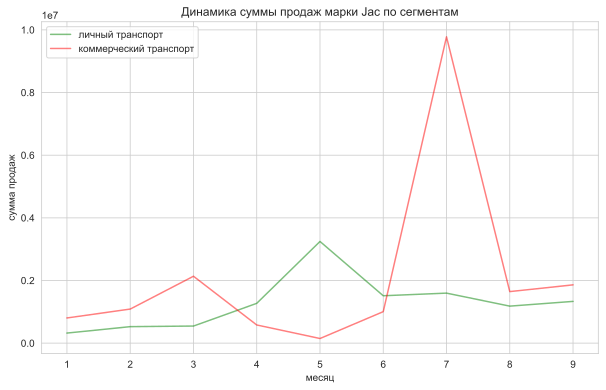

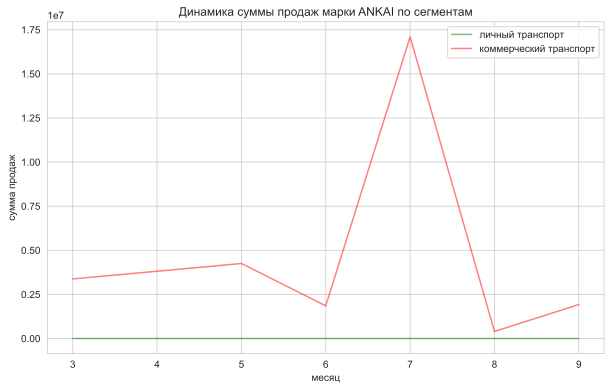

In [229]:
for br in brand10:
    df_1 = pivot_brand_seg[pivot_brand_seg['Бренд'] ==br]
          
    plt.plot(df_1['Месяц_int'], df_1['личный'], alpha=0.5, color = 'green', label='личный транспорт')
    plt.plot(df_1['Месяц_int'], df_1['коммерческий'], alpha=0.5, color = 'red', label='коммерческий транспорт')

    plt.title(f'Динамика суммы продаж марки {br} по сегментам')
    plt.ylabel('сумма продаж')
    plt.xlabel('месяц')
    plt.legend ()
    #  plt.savefig(f'динамика суммы продаж марки {br}.png', dpi = 100, bbox_inches='tight')
    plt.show();

In [230]:
df_brand_seg = df.groupby(['Бренд','Сегмент']).agg(sales_amount_USD = ('Продажа_USD', 'sum')).sort_values(by = 'sales_amount_USD', ascending= False).reset_index()
df_brand_seg['sales_amount_USD'] = round(df_brand_seg['sales_amount_USD']).astype('Int64')
df_brand_seg.head(10)

Бренд       Сегмент  sales_amount_USD
0   Toyota        личный         311228937
1  Hyundai        личный         210558469
2     Lada  коммерческий         101794274
3   Toyota  коммерческий          91271130
4    Lexus        личный          61139756
5    KAMAZ  коммерческий          46092683
6      Kia  коммерческий          36406400
7    ANKAI  коммерческий          28907055
8   Nissan  коммерческий          21259461
9  Renault        личный          21088772

Топ-10 брендов автомобилей в сегменте коммерческие автомобили.

In [231]:
brand_com =df_brand_seg[df_brand_seg['Сегмент']== 'коммерческий'][['Бренд', 'sales_amount_USD']].sort_values(by = 'sales_amount_USD', ascending= False)
brand_com10 = brand_com.head(10)
brand_com10

Бренд  sales_amount_USD
2      Lada         101794274
3    Toyota          91271130
5     KAMAZ          46092683
6       Kia          36406400
7     ANKAI          28907055
8    Nissan          21259461
10      BMW          20996879
11      GAZ          20713276
12      Jac          19050611
14  Hyundai          18749127

Топ-10 брендов автомобилей в сегменте личные автомобили.

In [232]:
brand_priv =df_brand_seg[df_brand_seg['Сегмент']== 'личный'][['Бренд', 'sales_amount_USD']].sort_values(by = 'sales_amount_USD', ascending= False)
brand_priv10 = brand_priv.head(10)
brand_priv10

Бренд  sales_amount_USD
0       Toyota         311228937
1      Hyundai         210558469
4        Lexus          61139756
9      Renault          21088772
13      Nissan          18753312
16       Ravon          16221014
19      Subaru          14538827
21  Land Rover          13583372
22  Mitsubishi          12653755
24         GAZ          11572924

### 3.5. Вывод
- По сегменту топ- 10  брендов различаются. Для коммерческих машин лидирует Лада, для личных Тойота.
- не все марки торгуют в обоих сегментах, часть марок представлена только в одном сегменте
- продажи происходили достаточно неравномерно по месяцам, и не все марки продавались с начала наблюдений. По некоторым информация о продаже есть не по всем месяцам.
- графики продаж по сегментам для  10 марок, которые продали машин на максимальную сумму сильно отличаются. Для каждой марки динамика продаж своя. У некоторых марок спрос постоянный (с увеличивающейся тенденцией). Для некоторых характерны взлеты и падения.
- Динамику хорошо отображают графики.


### 3.6. компании лидеры рынка бренд/сегмент

Компании лидеры рынка по выручке

In [233]:
df_company = df.groupby('Компания').agg(sales_amount_USD = ('Продажа_USD','sum'),
                            cnt = ('Количество','sum')).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_company['sales_amount_USD'] = round(df_company['sales_amount_USD']).astype('Int64')
df_company.head(15)

Компания  sales_amount_USD    cnt
20   Toyota Motor Kazakhstan         479876439  11951
2              Astana Motors         229338604  10169
26                БИПЭК АВТО         186017770  15132
0                 Allur Auto          66512282   2636
13  Nissan Manufacturing RUS          46289496   1760
31                  ТК КАМАЗ          46215935    893
27                     Вираж          46124756   2909
25         Автоцентр-Бавария          29219721    454
15            Renault Россия          24184906   1796
11               Mercur Auto          18895230    646
3                Autokapital          18518179    196
18         Subaru Kazakhstan          16158331    503
10                   MMC RUS          15035602    447
14    Ravon Motors Kazakstan          14938094   1507
30                     СемАЗ          14609876    389

In [234]:
df_company_seg = df.groupby(['Сегмент','Компания']).agg(sales_amount_USD = ('Продажа_USD','sum'),
                            cnt = ('Количество','sum')).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_company_seg['sales_amount_USD'] = round(df_company_seg['sales_amount_USD']).astype('Int64')

Компании лидеры рынка по выручке в сегменте коммерческих автомобилей

In [235]:
company_com =df_company_seg[df_company_seg['Сегмент']== 'коммерческий'][['Компания', 'sales_amount_USD', 'cnt']].sort_values(by = 'sales_amount_USD', ascending= False)
company_com10 = company_com.head(10)
company_com10

Компания  sales_amount_USD    cnt
24                БИПЭК АВТО         162427869  13809
18   Toyota Motor Kazakhstan         107507746   2547
0                 Allur Auto          54564353   1795
28                  ТК КАМАЗ          46215935    893
25                     Вираж          29238842   1761
12  Nissan Manufacturing RUS          21259461    926
23         Автоцентр-Бавария          21045253    314
2              Astana Motors          18780135    886
27                     СемАЗ          14609876    389
3                Autokapital          13155456    132

Компании лидеры рынка по выручке в сегменте личных автомобилей

In [236]:
company_priv =df_company_seg[df_company_seg['Сегмент']== 'личный'][['Компания', 'sales_amount_USD', 'cnt']].sort_values(by = 'sales_amount_USD', ascending= False)
company_priv10 = company_priv.head(10)
company_priv10

Компания  sales_amount_USD   cnt
47   Toyota Motor Kazakhstan         372368693  9404
33             Astana Motors         210558469  9283
41  Nissan Manufacturing RUS          25030035   834
53                БИПЭК АВТО          23589900  1323
43            Renault Россия          21088772  1560
54                     Вираж          16885915  1148
39               Mercur Auto          15554053   508
42    Ravon Motors Kazakstan          14699498  1483
45         Subaru Kazakhstan          14538827   454
38                   MMC RUS          12653755   378

Посмотрим динамику продаж по сумме и кол-ву проданых автомобилей для 3-х лидеров рынка.

In [237]:
# общая таблица со всеми компаниями по месяцам
df_company_month_seg = df.groupby(['Месяц', 'Месяц_int', 'Компания','Сегмент' ]).agg(sales_amount_USD = ('Продажа_USD', 'sum'),cnt = ('Количество','sum') ).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_company_month_seg

Месяц  Месяц_int                 Компания       Сегмент  \
116      июль          7  Toyota Motor Kazakhstan        личный   
293  сентябрь          9  Toyota Motor Kazakhstan        личный   
68     апрель          4  Toyota Motor Kazakhstan        личный   
27     август          8  Toyota Motor Kazakhstan        личный   
204       май          5  Toyota Motor Kazakhstan        личный   
..        ...        ...                      ...           ...   
139      июнь          6           Caspian Motors        личный   
270  сентябрь          9           Caspian Motors  коммерческий   
356    январь          1           Caspian Motors        личный   
379    январь          1            Автомир-Центр  коммерческий   
220       май          5         УзАвто-Казахстан  коммерческий   

     sales_amount_USD   cnt  
116    49,119,704.211  1258  
293    45,687,069.271  1186  
68     45,322,256.817  1091  
27     44,802,364.792  1191  
204    42,062,915.901  1050  
..                ...   ...  
139        27,476.316     1  
270        26,907.216     1  
356        14,045.640     1  
379        13,927.821     1  
220        10,068.054     1  

[392 rows x 6 columns]

In [238]:
pivot_company_seg = pd.pivot_table(data=df_company_month_seg,
                            index=['Компания','Месяц_int'], 
                            columns='Сегмент', 
                            values=['sales_amount_USD', 'cnt'] , 
                            aggfunc='sum',  
                            fill_value=0).reset_index()
pivot_company_seg.columns = [' '.join(col).strip() for col in pivot_company_seg.columns.values]

In [239]:
pivot_company_seg

Компания  Месяц_int  cnt коммерческий  cnt личный  \
0                   Allur Auto          1                51          23   
1                   Allur Auto          2                69          39   
2                   Allur Auto          3               153          39   
3                   Allur Auto          4                38          92   
4                   Allur Auto          5                62         248   
..                         ...        ...               ...         ...   
242  ТОО "Eurasia Motor Zhaik"          1                 0           8   
243  ТОО "Eurasia Motor Zhaik"          4                 3           4   
244           УзАвто-Казахстан          3                 0          10   
245           УзАвто-Казахстан          4                 0          58   
246           УзАвто-Казахстан          5                 1          83   

     sales_amount_USD коммерческий  sales_amount_USD личный  
0                      832,365.709              352,174.605  
1                    1,443,830.900              597,797.412  
2                    5,582,549.005              591,435.013  
3                      877,935.821            1,310,345.746  
4                    4,582,426.434            3,289,283.144  
..                             ...                      ...  
242                          0.000              170,186.465  
243                     55,401.940               94,449.173  
244                          0.000              101,202.866  
245                          0.000              584,665.404  
246                     10,068.054              835,648.444  

[247 rows x 6 columns]

In [240]:
company_top3 = ['БИПЭК АВТО', 'Toyota Motor Kazakhstan', 'Allur Auto']

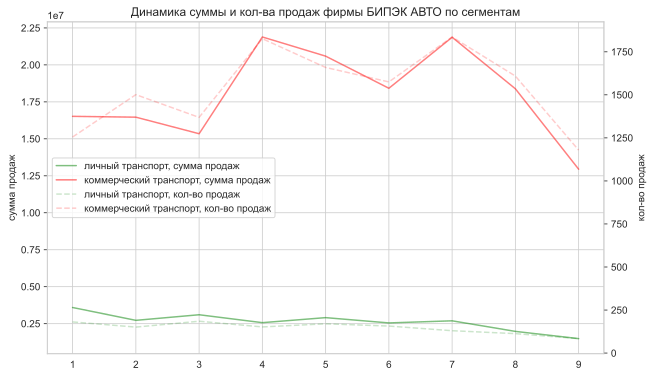

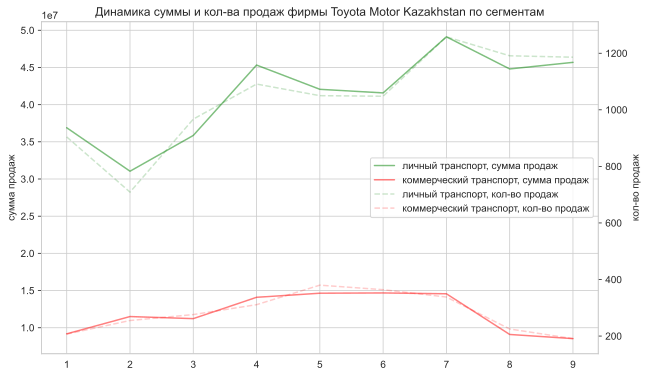

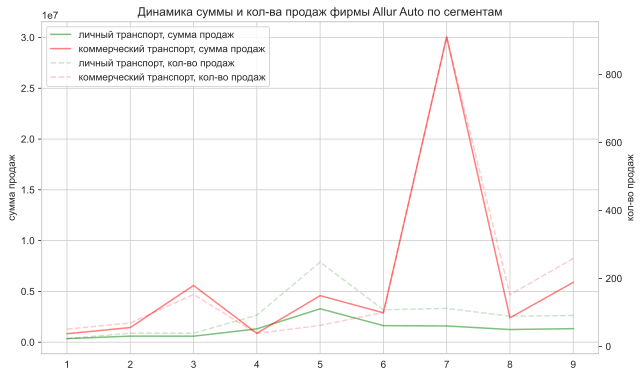

In [241]:
for comp in company_top3:
    df_1 = pivot_company_seg[pivot_company_seg['Компания'] ==comp]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # объединение разных осей на одном графике. Отобразим сумму и кол-во продаж

    ax1.plot(df_1['Месяц_int'], df_1['sales_amount_USD личный'], alpha=0.5, color = 'green', label='личный транспорт, сумма продаж')
    ax1.plot(df_1['Месяц_int'], df_1['sales_amount_USD коммерческий'], alpha=0.5, color = 'red', label='коммерческий транспорт, сумма продаж')

    ax2.plot(df_1['Месяц_int'], df_1['cnt личный'], linestyle='--', alpha=0.2, color = 'green', label='личный транспорт, кол-во продаж')
    ax2.plot(df_1['Месяц_int'], df_1['cnt коммерческий'], linestyle='--', alpha=0.2, color = 'red', label='коммерческий транспорт, кол-во продаж')

    plt.title(f'Динамика суммы и кол-ва продаж фирмы {comp} по сегментам')
    # plt.ylabel('сумма продаж')
    ax1.set_ylabel('сумма продаж')
    ax2.set_ylabel('кол-во продаж' )


    
    plt.xlabel('месяц')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    ax1.legend(h1 + h2, l1 + l2, loc=0);

    plt.grid(False)
    #  plt.savefig(f'динамика суммы продаж фирмы {comp}.png', dpi = 100, bbox_inches='tight')
    plt.show();

### 3.6. Вывод
- Были определены компании лидеры рынка по суммам продаж. Так же отдельно выявлены лидеры рынка  в сегменте личных и коммерческих автомобилей.
- Для 3х лидеров рынка были построены графики динамики продаж по месяцам. В целом динамика по сумме и кол-ву совпадает, кроме фирмы Allur Auto в сегменте личный транспорт  в мае. Там есть значительная разница, что может говорить о том, что в мае в этой фирме продавались более дешевые машины.
- по графикам явно видно, у кого  из лидеров происходит спад и подъем на разных сегментах. В частности Allur Auto в июле продал рекордное кол-во коммерческих автомобилей.

### 3.5. возможные зависимости между параметрами

Данные позволяют сделать еще много выводов. Рассмотреть автомобильный рынок не только в разрезе сегментов, фирм и прибыли, но и оценить класс продаваемых машин, литражность и прочие переметры.
Остановимся на двух: оценка цены автомобиля в зависимости от страны производства и оценки кол-ва продаж внутри рынка и отправляемых на экспорт.

#### 3.5.1. Страна-производитель ~ цена автомобиля

In [242]:
df_price_region = df.groupby('Страна-производитель').agg(price_mean_USD = ('Цена_USD','mean'), price_median_USD =('Цена_USD', np.median), cnt = ('Количество', 'sum' )).sort_values(by = 'cnt', ascending= False)
df_price_region['price_mean_USD'] = round(df_price_region['price_mean_USD']).astype('Int64')
df_price_region['price_median_USD'] = round(df_price_region['price_median_USD']).astype('Int64')
df_price_region = df_price_region.reset_index()
df_price_region

Страна-производитель  price_mean_USD  price_median_USD    cnt
0   Республика Казахстан           21281             18298  31366
1   Российская Федерация           25390             26805  14341
2                 Япония           55457             49867   4612
3                 Турция           31390             26604   1167
4                Таиланд           31652             30799    981
5                    США           69513             69422    507
6               Германия           69873             58750    357
7                     UK           91846             77249    206
8                  Китай           22021             11246     94
9             Узбекистан           11173              9885     83
10               Австрия          142097            163070     69
11            Нидерланды           93534            101046     23
12                Швеция           70667             71137     21
13                 Корея           49683             40574     18
14               Испания           52823             64281     15
15                Польша           20412             20437      6
16               Бельгия           47892             48718      6
17               Венгрия           35890             35890      2
18            Белоруссия           79365             79365      1

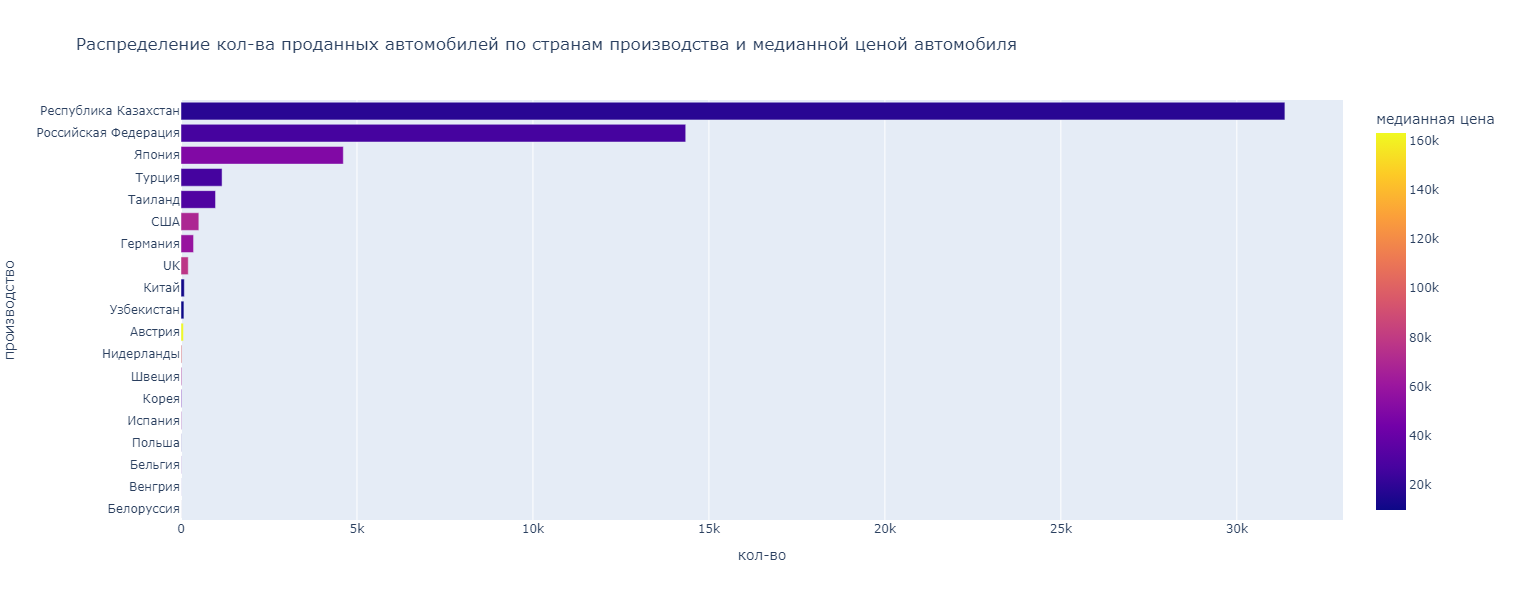

In [243]:
fig = px.bar(df_price_region.sort_values(by = 'cnt'), x='cnt', y= 'Страна-производитель', color='price_median_USD', orientation='h', 
             height=600,
             title='Распределение кол-ва проданных автомобилей по странам производства и медианной ценой автомобиля',
          labels={'cnt': 'кол-во', 'price_median_USD':'медианная цена','Страна-производитель':'производство' }  )

fig.show();

In [244]:
# график плотли интерактивынй , отобразиться после перезагрузки тетерадки. Скриншот для просмотра

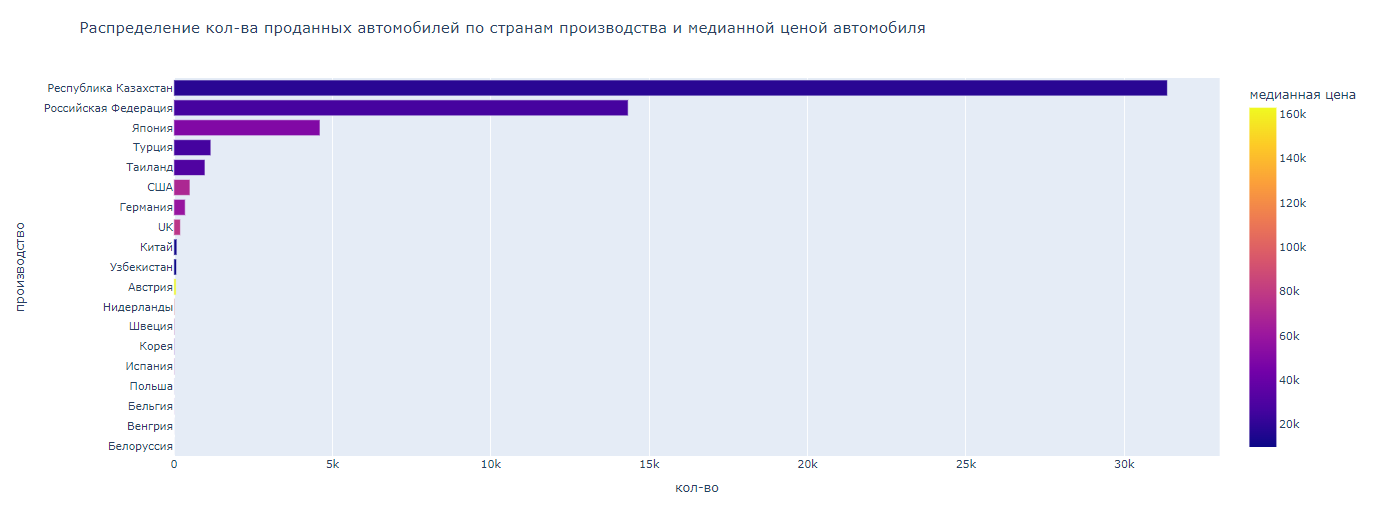

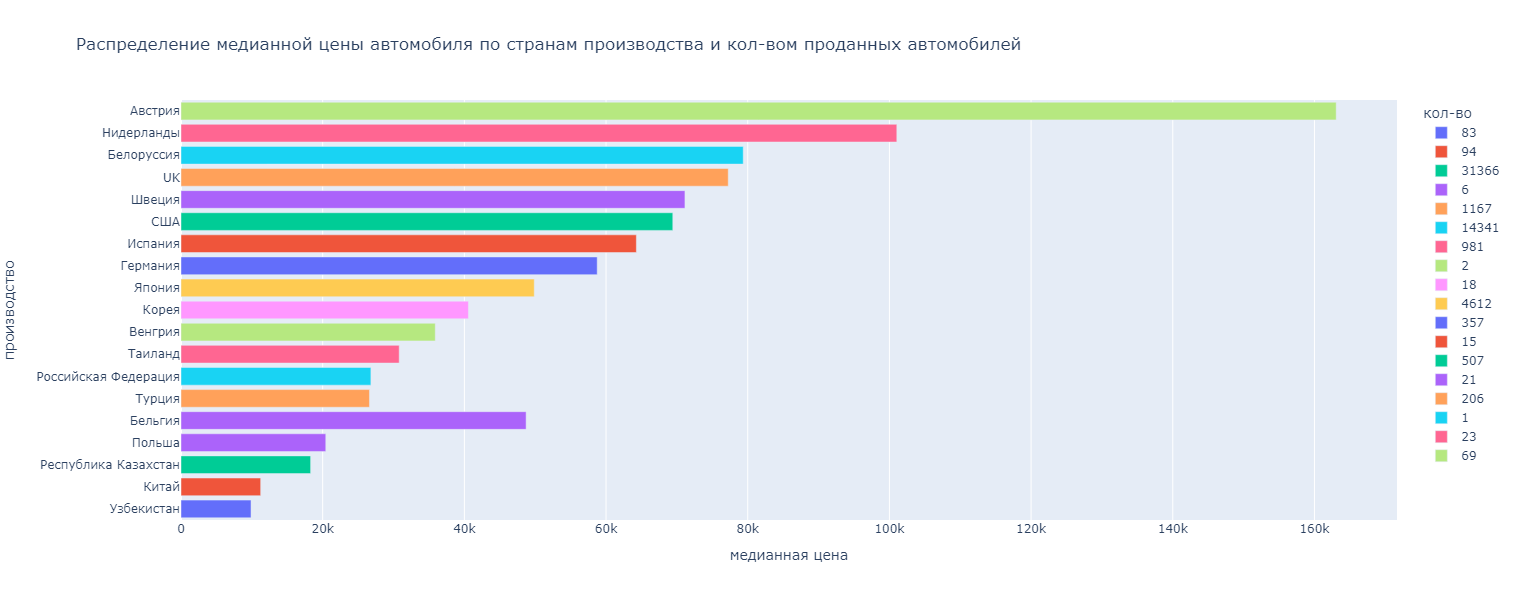

In [245]:
fig = px.bar(df_price_region.sort_values(by = 'price_median_USD'), x='price_median_USD', y= 'Страна-производитель', color='cnt', orientation='h', 
             height=600,
             title='Распределение медианной цены автомобиля по странам производства и кол-вом проданных автомобилей',
          labels={'cnt': 'кол-во', 'price_median_USD':'медианная цена','Страна-производитель':'производство' }  )

fig.show();

In [246]:
# график плотли интерактивынй , отобразиться после перезагрузки тетерадки. Скриншот для просмотра

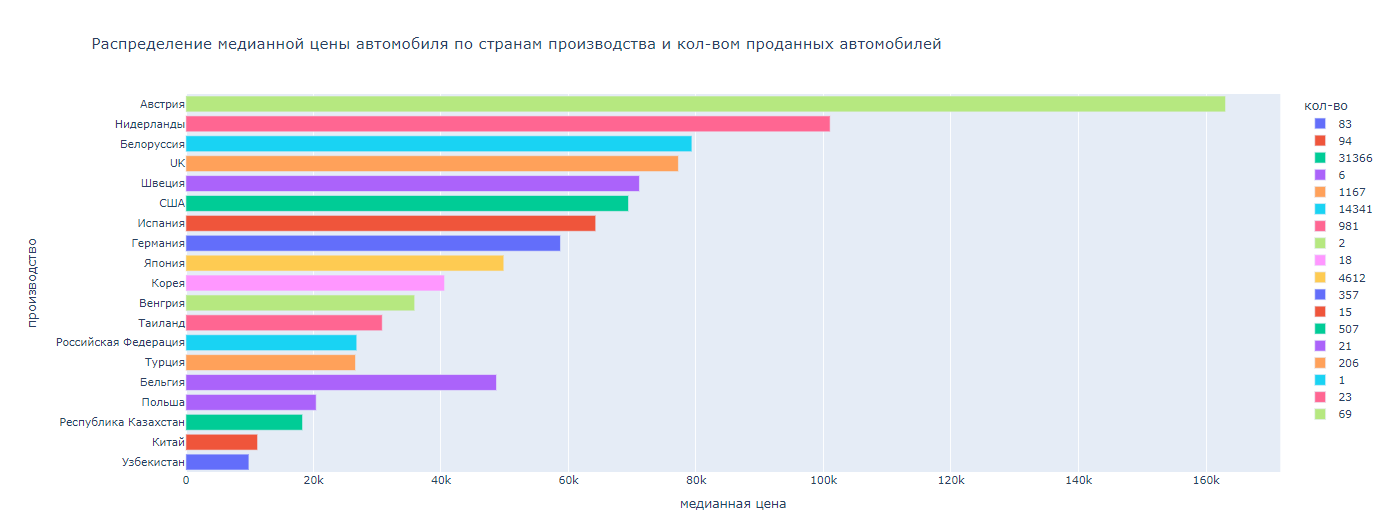

In [247]:
df_price_region.sort_values(by = 'price_median_USD', ascending= False).head(5)

Страна-производитель  price_mean_USD  price_median_USD  cnt
10              Австрия          142097            163070   69
11           Нидерланды           93534            101046   23
18           Белоруссия           79365             79365    1
7                    UK           91846             77249  206
12               Швеция           70667             71137   21

In [248]:
df_price_region.sort_values(by = 'price_median_USD').head(5)

Страна-производитель  price_mean_USD  price_median_USD    cnt
9             Узбекистан           11173              9885     83
8                  Китай           22021             11246     94
0   Республика Казахстан           21281             18298  31366
15                Польша           20412             20437      6
3                 Турция           31390             26604   1167

#### 3.5.1.Вывод
- Больше всего на рынке Казахстана представлено машин сделаных в Казахстане и в России.
- В зависимости от цены машины страны производители можно оценить так:
   * Больше всего дорогих машин выпускаются в Австрии, Нидерландах и Белоруссии, но из Белорусси была только 1 продажа, поэтому на третье месте можно считать Великобританию
   * Самые бюджетные производятся в Узбекистане, Китае и в Казахстане 


#### 3.5.2 Оценка экспортных продаж

In [249]:
# таблица экспорта по месяцам
df_price_exp_month_seg = df[df['Область']=='Экспорт область'].groupby(['Месяц_int', 'Сегмент' ]).agg(sales_amount_USD = ('Продажа_USD', 'sum'),cnt = ('Количество','sum') ).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_price_exp_month_seg

Месяц_int       Сегмент  sales_amount_USD  cnt
12          7  коммерческий    10,241,302.843  707
16          9  коммерческий     4,555,933.047  285
9           5        личный     2,796,196.919  179
4           3  коммерческий     2,795,266.512  133
11          6        личный     2,181,014.087  100
14          8  коммерческий     2,057,735.186  146
7           4        личный     1,851,433.162   73
2           2  коммерческий     1,446,503.797   66
17          9        личный     1,439,481.428   26
13          7        личный     1,334,805.603   19
15          8        личный     1,248,272.570   22
0           1  коммерческий     1,224,710.054   60
10          6  коммерческий     1,201,693.953   31
8           5  коммерческий       878,941.497   19
3           2        личный       829,603.753   16
6           4  коммерческий       762,518.492   15
1           1        личный       737,223.097   14
5           3        личный       299,416.446    8

In [250]:
pivot_price_exp_month_seg = pd.pivot_table(data=df_price_exp_month_seg,
                            index='Месяц_int', 
                            columns='Сегмент', 
                            values=['sales_amount_USD', 'cnt'] , 
                            aggfunc='sum',  
                            fill_value=0).reset_index()
pivot_price_exp_month_seg.columns = [' '.join(col).strip() for col in pivot_price_exp_month_seg.columns.values]
pivot_price_exp_month_seg

Месяц_int  cnt коммерческий  cnt личный  sales_amount_USD коммерческий  \
0          1                60          14                  1,224,710.054   
1          2                66          16                  1,446,503.797   
2          3               133           8                  2,795,266.512   
3          4                15          73                    762,518.492   
4          5                19         179                    878,941.497   
5          6                31         100                  1,201,693.953   
6          7               707          19                 10,241,302.843   
7          8               146          22                  2,057,735.186   
8          9               285          26                  4,555,933.047   

   sales_amount_USD личный  
0              737,223.097  
1              829,603.753  
2              299,416.446  
3            1,851,433.162  
4            2,796,196.919  
5            2,181,014.087  
6            1,334,805.603  
7            1,248,272.570  
8            1,439,481.428

In [251]:
# таблица продаж внутри страны по месяцам
df_price_noexp_month_seg = df[df['Область']!='Экспорт область'].groupby(['Месяц_int', 'Сегмент' ]).agg(sales_amount_USD = ('Продажа_USD', 'sum'),cnt = ('Количество','sum') ).reset_index().sort_values(by = 'sales_amount_USD', ascending= False)
df_price_noexp_month_seg

Месяц_int       Сегмент  sales_amount_USD   cnt
13          7        личный   100,777,842.900  3735
17          9        личный    98,158,569.186  3747
15          8        личный    95,881,947.828  3611
11          6        личный    91,117,415.770  3230
12          7  коммерческий    90,825,904.923  3317
9           5        личный    88,706,616.931  3145
7           4        личный    85,705,796.219  2909
5           3        личный    74,424,989.415  2640
1           1        личный    72,339,780.754  2539
8           5  коммерческий    71,743,756.499  3095
10          6  коммерческий    68,263,930.052  3098
3           2        личный    66,390,167.836  2229
14          8  коммерческий    59,034,484.150  2847
16          9  коммерческий    58,367,509.495  2583
6           4  коммерческий    57,779,794.324  2871
4           3  коммерческий    50,547,297.971  2274
2           2  коммерческий    41,680,411.066  2182
0           1  коммерческий    39,566,288.543  1904

In [252]:
pivot_price_noexp_month_seg = pd.pivot_table(data=df_price_noexp_month_seg,
                            index='Месяц_int', 
                            columns='Сегмент', 
                            values=['sales_amount_USD', 'cnt'] , 
                            aggfunc='sum',  
                            fill_value=0).reset_index()
pivot_price_noexp_month_seg.columns = [' '.join(col).strip() for col in pivot_price_noexp_month_seg.columns.values]
pivot_price_noexp_month_seg

Месяц_int  cnt коммерческий  cnt личный  sales_amount_USD коммерческий  \
0          1              1904        2539                 39,566,288.543   
1          2              2182        2229                 41,680,411.066   
2          3              2274        2640                 50,547,297.971   
3          4              2871        2909                 57,779,794.324   
4          5              3095        3145                 71,743,756.499   
5          6              3098        3230                 68,263,930.052   
6          7              3317        3735                 90,825,904.923   
7          8              2847        3611                 59,034,484.150   
8          9              2583        3747                 58,367,509.495   

   sales_amount_USD личный  
0           72,339,780.754  
1           66,390,167.836  
2           74,424,989.415  
3           85,705,796.219  
4           88,706,616.931  
5           91,117,415.770  
6          100,777,842.900  
7           95,881,947.828  
8           98,158,569.186

In [253]:
df_export_pr = pivot_price_exp_month_seg
df_export_pr['%cnt_com'] = pivot_price_exp_month_seg['cnt коммерческий']/pivot_price_noexp_month_seg['cnt коммерческий']*100
df_export_pr['%cnt_priv'] = pivot_price_exp_month_seg['cnt личный']/pivot_price_noexp_month_seg['cnt личный']*100
df_export_pr['%USD_com'] = pivot_price_exp_month_seg['sales_amount_USD коммерческий']/pivot_price_noexp_month_seg['sales_amount_USD коммерческий']*100
df_export_pr['%USD_priv'] = pivot_price_exp_month_seg['sales_amount_USD личный']/pivot_price_noexp_month_seg['sales_amount_USD личный']*100
df_export_pr =df_export_pr[['Месяц_int', '%cnt_com', '%cnt_priv', '%USD_com','%USD_priv']]
df_export_pr

Месяц_int  %cnt_com  %cnt_priv  %USD_com  %USD_priv
0          1     3.151      0.551     3.095      1.019
1          2     3.025      0.718     3.470      1.250
2          3     5.849      0.303     5.530      0.402
3          4     0.522      2.509     1.320      2.160
4          5     0.614      5.692     1.225      3.152
5          6     1.001      3.096     1.760      2.394
6          7    21.314      0.509    11.276      1.325
7          8     5.128      0.609     3.486      1.302
8          9    11.034      0.694     7.806      1.466

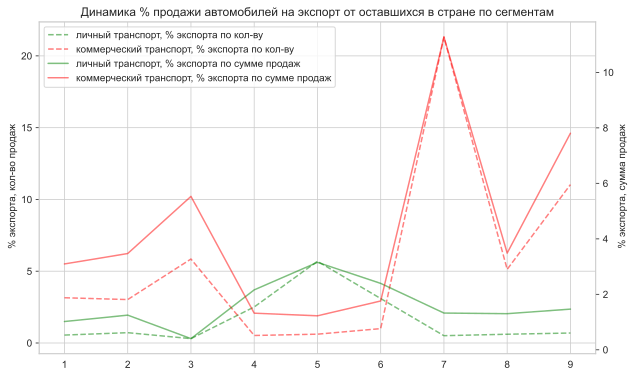

In [254]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # объединение разных осей на одном графике. Отобразим сумму и кол-во продаж

ax1.plot(df_export_pr['Месяц_int'], df_export_pr['%cnt_priv'], alpha=0.5, color = 'green',  linestyle='--', label='личный транспорт, % экспорта по кол-ву')
ax1.plot(df_export_pr['Месяц_int'], df_export_pr['%cnt_com'], alpha=0.5, color = 'red',  linestyle='--', label='коммерческий транспорт, % экспорта по кол-ву')

ax2.plot(df_export_pr['Месяц_int'], df_export_pr['%USD_priv'], alpha=0.5, color = 'green',  label='личный транспорт, % экспорта по сумме продаж')
ax2.plot(df_export_pr['Месяц_int'], df_export_pr['%USD_com'], alpha=0.5, color = 'red',  label='коммерческий транспорт, % экспорта по сумме продаж')

plt.title(f'Динамика % продажи автомобилей на экспорт от оставшихся в стране по сегментам')

ax2.set_ylabel(' % экспорта, сумма продаж')
ax1.set_ylabel(' % экспорта, кол-во продаж' )

  
plt.xlabel('месяц')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1 + h2, l1 + l2, loc=0);
    
plt.grid(False)
#  plt.savefig('% экспорт.png', dpi = 100 , bbox_inches='tight')
plt.show();


#### 3.5.2. Вывод
Кол-во автомобилей, вывозимой после продажи на экспорт не равномерно по месяцам. Для личного и коммерческого использования всплески происхоили в разные месяцы. 
В мае кол-во продаж личных автомобилей на экспорт составляло 5,6% по кол-ву авто и 3,1% по сумме. Это максимальное кол-во за все время наблюдений.
По коммерческим автомобилям резкий всплеск экспорта был в июле (21,3% и 11,2% соответственно). В августе был спад, а к сентябрю экспорт коммерческих автомобилей так же увеличился.

# Меркур Авто - анализ продаж компании

## 4.1. позиция компании по параметрам анализа рынка

Определим позиции компании на рынке, по кол-во проданных машин, суммы продаж, сегментам и пр параметрам

In [255]:
df_comp = df.groupby('Компания').agg(sales_amount_USD = ('Продажа_USD', 'sum'), cnt = ('Количество', 'sum')).reset_index().sort_values(by = ['sales_amount_USD','cnt'], ascending= False)
df_comp['sales_amount_USD'] = round(df_comp['sales_amount_USD']).astype('Int64')
df_comp['%_sales_amount_USD'] = df_comp['sales_amount_USD'].apply(lambda x: x/df_comp['sales_amount_USD'].sum()*100)
df_comp['%_cnt'] = df_comp['cnt'].apply(lambda x: x/df_comp['cnt'].sum()*100)
df_comp['Рейтинг']  = round(df_comp["%_sales_amount_USD"].rank(ascending=False)).astype('Int64')

df_comp

Компания  sales_amount_USD    cnt  %_sales_amount_USD  \
20       Toyota Motor Kazakhstan         479876439  11951              35.568   
2                  Astana Motors         229338604  10169              16.998   
26                    БИПЭК АВТО         186017770  15132              13.787   
0                     Allur Auto          66512282   2636               4.930   
13      Nissan Manufacturing RUS          46289496   1760               3.431   
31                      ТК КАМАЗ          46215935    893               3.425   
27                         Вираж          46124756   2909               3.419   
25             Автоцентр-Бавария          29219721    454               2.166   
15                Renault Россия          24184906   1796               1.793   
11                   Mercur Auto          18895230    646               1.400   
3                    Autokapital          18518179    196               1.373   
18             Subaru Kazakhstan          16158331    503               1.198   
10                       MMC RUS          15035602    447               1.114   
14        Ravon Motors Kazakstan          14938094   1507               1.107   
30                         СемАЗ          14609876    389               1.083   
21          Volkswagen Group Rus          13663264    664               1.013   
5          Daewoo Bus Kazakhstan          12162702    146               0.901   
29                     СВС-ТРАНС          10313419    240               0.764   
8   Hyundai Com Trans Kazakhstan           9710609    236               0.720   
1          Almaty Motors Premium           9657735     99               0.716   
23                    Автомир ГК           8216969    279               0.609   
19                  TERRA MOTORS           7978608     77               0.591   
6          Eurasia Motor Premium           7724913    102               0.573   
9     MAN Truck & Bus Kazakhstan           3288661     24               0.244   
28              Лифан Моторс Рус           2890115    233               0.214   
16           Scandinavian Motors           2866916     45               0.212   
7                    Hino Motors           2603155     58               0.193   
17           Scania Central Asia           2076887     23               0.154   
33              УзАвто-Казахстан           1531585    152               0.114   
22            Автодом Motors KST           1064732     53               0.079   
24                 Автомир-Центр            660553     34               0.049   
12                  Mercur Autos            460046      4               0.034   
32     ТОО "Eurasia Motor Zhaik"            320038     15               0.024   
4                 Caspian Motors             68429      3               0.005   

    %_cnt  Рейтинг  
20 22.183        1  
2  18.875        2  
26 28.087        3  
0   4.893        4  
13  3.267        5  
31  1.658        6  
27  5.400        7  
25  0.843        8  
15  3.334        9  
11  1.199       10  
3   0.364       11  
18  0.934       12  
10  0.830       13  
14  2.797       14  
30  0.722       15  
21  1.232       16  
5   0.271       17  
29  0.445       18  
8   0.438       19  
1   0.184       20  
23  0.518       21  
19  0.143       22  
6   0.189       23  
9   0.045       24  
28  0.432       25  
16  0.084       26  
7   0.108       27  
17  0.043       28  
33  0.282       29  
22  0.098       30  
24  0.063       31  
12  0.007       32  
32  0.028       33  
4   0.006       34

In [256]:
df_comp[df_comp["Компания"] == "Mercur Auto"]

Компания  sales_amount_USD  cnt  %_sales_amount_USD  %_cnt  Рейтинг
11  Mercur Auto          18895230  646               1.400  1.199       10

Посмотрим, как именялись показатели для этой компании с течением времени.

In [257]:
df_comp_cnt_sales = df.groupby(['Месяц', 'Месяц_int', 'Компания']).agg(cnt = ('Количество', 'sum'),sales_amount_USD = ('Продажа_USD', 'sum') ).reset_index().sort_values(by = 'Месяц_int')
df_comp_cnt_sales_MA = df_comp_cnt_sales[df_comp_cnt_sales["Компания"] == "Mercur Auto"]
df_comp_cnt_sales_MA 

Месяц  Месяц_int     Компания  cnt  sales_amount_USD
229    январь          1  Mercur Auto  165     2,979,406.646
201   февраль          2  Mercur Auto  126     2,949,383.657
148      март          3  Mercur Auto   78     2,707,627.000
34     апрель          4  Mercur Auto   78     2,667,282.576
119       май          5  Mercur Auto  153     3,687,779.064
92       июнь          6  Mercur Auto    9       835,751.000
64       июль          7  Mercur Auto   17     1,386,826.000
8      август          8  Mercur Auto   14     1,110,374.040
174  сентябрь          9  Mercur Auto    6       570,800.000

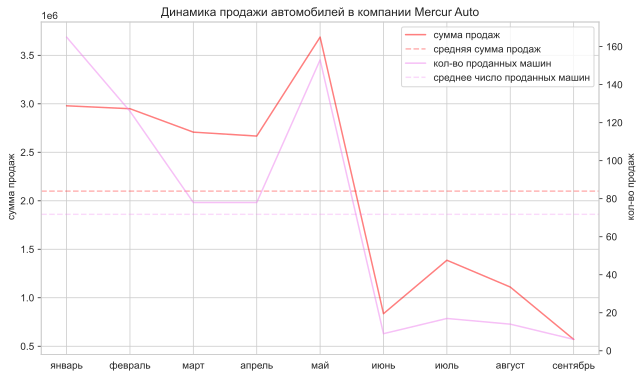

In [258]:
mean_value_sales = df_comp_cnt_sales_MA ['sales_amount_USD'].mean()
mean_value_cnt = df_comp_cnt_sales_MA['cnt'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # объединение разных осей на одном графике. Отобразим сумму и кол-во продаж

ax2.plot(df_comp_cnt_sales_MA['Месяц'], df_comp_cnt_sales_MA['cnt'], alpha=0.5, color = 'violet', label='кол-во проданных машин')
ax2.axhline(y=mean_value_cnt, alpha=0.3, linestyle='--', color='violet', label='cреднее число проданных машин' )
ax1.plot(df_comp_cnt_sales_MA['Месяц'],df_comp_cnt_sales_MA['sales_amount_USD'], alpha=0.5, color = 'red', label='сумма продаж')
ax1.axhline(y=mean_value_sales, alpha=0.3, linestyle='--', color='red', label='cредняя сумма продаж' )

plt.title(f'Динамика продажи автомобилей в компании Mercur Auto')

ax1.set_ylabel(' сумма продаж')
ax2.set_ylabel(' кол-во продаж' )

  
plt.xlabel('месяц')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1 + h2, l1 + l2, loc=0);
    
plt.grid(False)
#  plt.savefig('динамика продаж Меркур.png', dpi = 100, bbox_inches='tight')
plt.show();

### 4.1. Вывод
Компания "Mercur Auto" занимает на автомобильном рынке Казахстана 10 место по объему продаж. Более детально:
- общая сумма продаж 18.895.230 USD, что составляет 1,4% от всего рынка
- общее кол-во проданных автомобилей 646, что составляет 1,2% от всего рынка



Явно видно, что в июне произошло резкое падение продаж, и далее компания не вернула свои позиции. В июле компания продавала более дорогие машины, но кол-во продаж было очень мало.

### 4.2. Оценка марок и моделей.
Посмотрим, какие марки машин продавала компания, в каких сегментах велась продажа.

In [259]:
df_MA = df[df["Компания"] == "Mercur Auto"]

In [260]:
df_MA['Бренд'].value_counts()

Бренд
Volkswagen    539
Audi           52
Porsche        48
Name: count, dtype: int64

In [261]:
df_MA. groupby(['Бренд', 'Модель']).agg({'Количество': 'sum'})

Количество
Бренд      Модель                       
Audi       A3                          2
           A4                          3
           A6                          8
           A7                          2
           A8                          5
           Q5                          8
           Q7                          3
           Q8                         20
           RS5                         1
Porsche    911 Carrera S               1
           Cayenne                    25
           Macan                      15
           Panamera                    7
Volkswagen Amarok                      2
           Jetta                       3
           Multivan                    3
           Polo                      440
           Teramont                    4
           Tiguan                     81
           Touareg                     3
           Transporter                 2
           Transporter Kasten          7
           Transporter Kombi           1

In [262]:
df_MA['Сегмент'].value_counts()

Сегмент
личный          501
коммерческий    138
Name: count, dtype: int64

In [263]:
df_MA.groupby(['Сегмент', 'Класс_2013']).agg({'Количество': 'sum'})

Количество
Сегмент      Класс_2013                       
коммерческий B класс                       114
             C класс                         1
             D класс                         1
             E класс                         2
             F класс                         4
             Компактные SUV                  6
             Полноразмерные SUV              7
             Спортивные автомобили           1
             Среднеразмерные SUV             2
личный       B класс                       326
             C класс                         4
             D класс                         2
             E класс                         8
             F класс                         8
             Pick-ups                        2
             Компактные SUV                 75
             Микроавтобусы                   8
             Полноразмерные SUV             60
             Полноразмерный Минивэн          5
             Спортивные автомобили           1
             Среднеразмерные SUV             9

### 4.2. Вывод
- Компания продавала 3 бренда автомоилей: `Volkswagen`, `
Aud`i и `
Porsc`. 
- Машины продавалаись для личных и коммерческих целей (продаж в личном сегменте - больше, почти 70%)
- Самая популярная марка Volkswagen Polo - 440 продаж из 646 общих продаж48

### 4.3 АВС анализ
Посмотрим, какие марки машин приносили наибольшую прибиль.


In [264]:
# напишем функцию для построения ABC анализа
def perform_abc(df, index):
    """
    На вход подается датафрейм пандас, где index столбец с названиями продукта, который мы будем анализировать, 
    а остальные столбцы это данные, на основании которых проводится анализ (сумма продаж, кол-во и тп.) 
    """
    cols = list(df.columns)
    cols.remove(index)
    groupped_df = df.groupby(index).agg({col: sum for col in cols})
    for col in cols:
        groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
        groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    return groupped_df[cols + [f'abc_{col}' for col in cols]]

In [265]:
df_MA_ABC = df_MA[['Бренд','Модель', 'Продажа_USD', 'Количество']]
df_MA_ABC['Бренд'] =df_MA_ABC['Бренд'] + ' ' +   df_MA_ABC['Модель']
df_MA_ABC = df_MA_ABC.drop(columns = 'Модель')

In [266]:
perform_abc(df_MA_ABC, index='Бренд')

Продажа_USD Количество abc_Продажа_USD  \
Бренд                                                                    
Volkswagen Polo               6,418,764.238        440               A   
Volkswagen Tiguan             2,642,563.720         81               A   
Porsche Cayenne               2,522,246.456         25               A   
Audi Q8                       1,793,118.333         20               A   
Porsche Macan                 1,015,619.570         15               A   
Audi A6                         607,692.506          8               B   
Audi Q5                         433,237.389          8               B   
Porsche Panamera                953,024.589          7               B   
Volkswagen Transporter Kasten   214,890.343          7               B   
Audi A8                         557,799.208          5               B   
Volkswagen Teramont             216,315.331          4               B   
Audi Q7                         233,073.000          3               B   
Volkswagen Touareg              242,552.306          3               B   
Volkswagen Multivan             211,161.316          3               C   
Audi A4                          95,858.000          3               C   
Volkswagen Jetta                 53,434.205          3               C   
Audi A7                         171,100.000          2               C   
Volkswagen Amarok                73,041.545          2               C   
Volkswagen Transporter           73,029.083          2               C   
Audi A3                          60,361.990          2               C   
Porsche 911 Carrera S           162,576.084          1               C   
Audi RS5                        107,250.000          1               C   
Volkswagen Transporter Kombi     36,520.773          1               C   

                              abc_Количество  
Бренд                                         
Volkswagen Polo                            A  
Volkswagen Tiguan                          B  
Porsche Cayenne                            B  
Audi Q8                                    B  
Porsche Macan                              B  
Audi A6                                    B  
Audi Q5                                    B  
Porsche Panamera                           B  
Volkswagen Transporter Kasten              B  
Audi A8                                    C  
Volkswagen Teramont                        C  
Audi Q7                                    C  
Volkswagen Touareg                         C  
Volkswagen Multivan                        C  
Audi A4                                    C  
Volkswagen Jetta                           C  
Audi A7                                    C  
Volkswagen Amarok                          C  
Volkswagen Transporter                     C  
Audi A3                                    C  
Porsche 911 Carrera S                      C  
Audi RS5                                   C  
Volkswagen Transporter Kombi               C

### 4.3. Вывод
ABC  анализ выявил марку Volkswagen Polo, как самую актуальную по продажам для данной компании. 

Так же нибольшую прибыль компании принесли следующие автомобили: 
* Volkswagen Tiguan
* Porsche Cayenne
* Audi Q8
* Porsche Macan
  
Если компания Меркур Авто надеется вернуться к активным продажам, то именно на эти марки ей следует обратить пристальное внимание.

### 4.4. Частота продаж определенных марок
XYZ анализ показывает частоту продаж. Но у нас мало данных и они агрегированы месяцами. Поэтому классический XYZ анализ ту не информативен. Посмотрим, как распределялись продажи марок фаворитов с теччением времени.

In [267]:
df_MA_xyz = df_MA. groupby(['Месяц_int','Бренд', 'Модель']).agg({'Количество': 'sum'}).reset_index()
df_MA_xyz['Бренд'] = df_MA_xyz['Бренд'] +' ' + df_MA_xyz['Модель']
df_MA_xyz = df_MA_xyz.drop(columns = 'Модель')
df_MA_xyz 

Месяц_int                Бренд Количество
0           1              Audi A8          1
1           1              Audi Q5          1
2           1      Porsche Cayenne          1
3           1     Volkswagen Jetta          3
4           1  Volkswagen Multivan          1
..        ...                  ...        ...
63          8      Porsche Cayenne          3
64          8        Porsche Macan          4
65          9              Audi A7          2
66          9              Audi A8          2
67          9              Audi Q8          2

[68 rows x 3 columns]

In [268]:
df_MA_xyz = df_MA_xyz.groupby(['Месяц_int', 'Бренд']).agg(cnt = ('Количество', 'sum')).reset_index()
df_MA_xyz

Месяц_int                Бренд cnt
0           1              Audi A8   1
1           1              Audi Q5   1
2           1      Porsche Cayenne   1
3           1     Volkswagen Jetta   3
4           1  Volkswagen Multivan   1
..        ...                  ...  ..
63          8      Porsche Cayenne   3
64          8        Porsche Macan   4
65          9              Audi A7   2
66          9              Audi A8   2
67          9              Audi Q8   2

[68 rows x 3 columns]

In [269]:
brend_top_MA = ['Volkswagen Polo','Volkswagen Tiguan', 'Porsche Cayenne', 'Audi Q8', 'Porsche Macan']

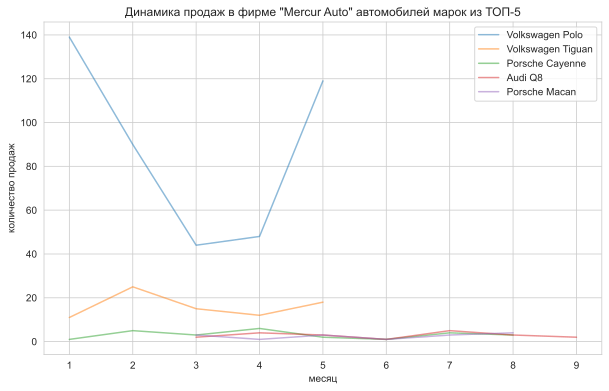

In [270]:
for brend in brend_top_MA:
    df1 = df_MA_xyz[df_MA_xyz['Бренд'] == brend]
    plt.plot(df1['Месяц_int'], df1['cnt'], alpha=0.5,  label=brend)
    
plt.title(f'Динамика продаж в фирме "Mercur Auto" автомобилей марок из ТОП-5')
plt.ylabel('количество продаж')
plt.xlabel('месяц')


plt.legend(bbox_to_anchor=(1,1));
#  plt.savefig('динамика продаж Меркур марки топ.png', dpi = 100 , bbox_inches='tight')
plt.show();

### 4.4. Вывод
Анализ кол-ва продаж марок автомобилей, которые принесли максимальную прибыль фирме "Mercur Auto", наглядно показал причину провала по выручке с июня 2019 года. 

продажи марок машин Volkswagen Polo и Volkswagen Tiguan, которые приносили максимальную прибыль компании, полностью прекратилась. Причины этого не известны, но это напрямую сказалось на выручке компании. Возможно был закрыт какой то ДЦ?
Проанализируем ДЦ, принадлежащие компании.

### 4.5. Анализ ДЦ компании Меркур Авто

In [271]:
df_MA['Наименование_ДЦ'].unique()

array(['Mercur Auto Алматы', 'Mercur Auto Астана',
       'Porsche Centre Almaty', 'Автодом Костанай', 'Mercur Auto Атырау',
       'Автомир-Центр Караганда', 'Eurasia Motors Uralsk'], dtype=object)

У фирмы "Меркур Авто" 7 диллерских центров. Посмотрим, как они продавали машины.

In [272]:
df_MA_DC = df_MA.groupby(['Месяц_int','Наименование_ДЦ']).agg(cnt = ('Количество','sum')).reset_index()

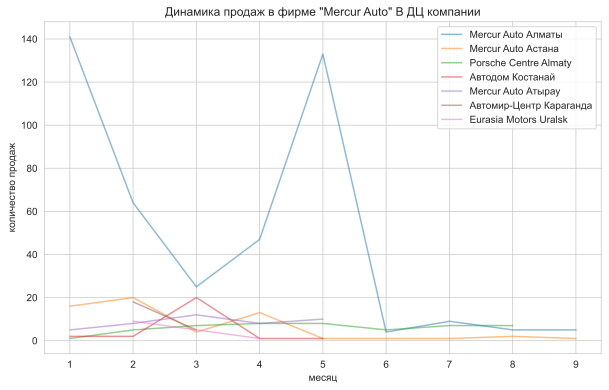

In [273]:
for DC in list(df_MA['Наименование_ДЦ'].unique()):
    df1 = df_MA_DC[df_MA_DC['Наименование_ДЦ'] == DC]
    plt.plot(df1['Месяц_int'], df1['cnt'], alpha=0.5,  label=DC)
    
plt.title(f'Динамика продаж в фирме "Mercur Auto" В ДЦ компании')
plt.ylabel('количество продаж')
plt.xlabel('месяц')


plt.legend(bbox_to_anchor=(1,1));
#  plt.savefig('динамика продаж Меркур ДЦ.png', dpi = 100 , bbox_inches='tight')
plt.show();

### 4.5. Вывод
Анализ работы ДЦ явно показал:
- в мае месяце совсем прекратились продажи в 2х диллерских центрах, а в главном ДЦ "Mercur Auto Алматы" продажи резко упали. Возможно именно там продавали Volkswagen Polo, приносящий максимальную прибыль компании.
- в августе прекратил продажу еще один ДЦ. Кол-во продаж в оставшихся 2х ДЦ явно недостаточны.

In [274]:
df_MA.groupby(['Наименование_ДЦ', 'Бренд']).agg(cnt = ('Количество','sum')).reset_index().sort_values(by = [ 'cnt'], ascending=False)

Наименование_ДЦ       Бренд  cnt
2       Mercur Auto Алматы  Volkswagen  390
4       Mercur Auto Астана  Volkswagen   51
6    Porsche Centre Almaty     Porsche   48
1       Mercur Auto Алматы        Audi   43
5       Mercur Auto Атырау  Volkswagen   43
8         Автодом Костанай  Volkswagen   24
9  Автомир-Центр Караганда  Volkswagen   23
0    Eurasia Motors Uralsk  Volkswagen   15
3       Mercur Auto Астана        Audi    7
7         Автодом Костанай        Audi    2

In [275]:
df_MA.groupby(['Наименование_ДЦ', 'Модель']).agg(cnt = ('Количество','sum')).reset_index().sort_values(by = [ 'cnt'], ascending=False)

Наименование_ДЦ              Модель  cnt
8        Mercur Auto Алматы                Polo  334
14       Mercur Auto Алматы              Tiguan   42
27       Mercur Auto Атырау                Polo   34
20       Mercur Auto Астана                Polo   31
31    Porsche Centre Almaty             Cayenne   25
42  Автомир-Центр Караганда                Polo   18
24       Mercur Auto Астана              Tiguan   17
11       Mercur Auto Алматы                  Q8   16
32    Porsche Centre Almaty               Macan   15
36         Автодом Костанай                Polo   13
0     Eurasia Motors Uralsk                Polo   10
29       Mercur Auto Атырау              Tiguan    7
17       Mercur Auto Алматы  Transporter Kasten    7
33    Porsche Centre Almaty            Panamera    7
4        Mercur Auto Алматы                  A6    6
9        Mercur Auto Алматы                  Q5    6
39         Автодом Костанай              Tiguan    5
1     Eurasia Motors Uralsk              Tiguan    5
43  Автомир-Центр Караганда              Tiguan    5
6        Mercur Auto Алматы                  A8    5
3        Mercur Auto Алматы                  A4    3
19       Mercur Auto Астана               Jetta    2
18       Mercur Auto Астана                  A6    2
2        Mercur Auto Алматы                  A3    2
37         Автодом Костанай                  Q8    2
5        Mercur Auto Алматы                  A7    2
34         Автодом Костанай              Amarok    2
7        Mercur Auto Алматы            Multivan    2
10       Mercur Auto Алматы                  Q7    2
13       Mercur Auto Алматы            Teramont    2
15       Mercur Auto Алматы             Touareg    2
23       Mercur Auto Астана                  Q8    2
21       Mercur Auto Астана                  Q5    2
12       Mercur Auto Алматы                 RS5    1
30    Porsche Centre Almaty       911 Carrera S    1
28       Mercur Auto Атырау            Teramont    1
26       Mercur Auto Атырау               Jetta    1
25       Mercur Auto Астана             Touareg    1
35         Автодом Костанай            Multivan    1
38         Автодом Костанай            Teramont    1
16       Mercur Auto Алматы         Transporter    1
40         Автодом Костанай         Transporter    1
41         Автодом Костанай   Transporter Kombi    1
22       Mercur Auto Астана                  Q7    1

<a id='mercur'></a>
### 4.6. "Меркур Авто" выводы и рекомендации на основе исследования

Компания "Меркур Авто", занимает на момент конца исследования (сентябрь 2019г), 10 место в рейтинге по объему продаж:
- общая сумма продаж 18.895.230 USD, что составляет 1,4% от всего рынка
- общее кол-во проданных автомобилей 646, что составляет 1,2% от всего рынка

Компания сильно снизила свои показатели после мая 2019:
- из имеющихся на начало исследования (январь 2019)  пяти ДЦ (в феврале открылось еще 2, но они быстро закрылись), к сентябрю 2019 года осталось всего  два.
- 'Volkswagen Polo' и 'Volkswagen Tiguan', приносящие максиммальную прибыль компании перестали продаваться совсем.
- ДЦ "Mercur Auto Алматы", в котором было произведено больше всего продаж резко их сократил.

Причину происходящего сложно определить без внешних источников информации. Поиск в интернете не принес видимых результатов. Возможно,  в этот преиод происходило объединение/расформирование/переорганизация фирмы, и в данных, которыми мы располагаем, это не указано. Поэтому складыватся ощущение, что фирма "Меркур Авто" после мая 2019 года практически перестала продавать машины (очень мало продаж).

Если фирма продолжает свое существование, то следует обратить внимане, по какой причине перестали продавать машины марок: 'Volkswagen Polo' и 'Volkswagen Tiguan'. Они давали хорошую прибыль. Если удасться возобновить продажи этих марок, то у фирмы есть шансы упрочить свои позиции.


<a id='section_id'></a>
# Общий вывод

В рамках выполнения проекта была проведена большая работа по нормализации данных и исправления ошибок в них.
Многие ошибки в данных связаны с неправильным заполнением исходных данных. Одинаковые параметры имели разное обозначение, много параметров дублировалось. 
По каждому параметру в работе есть подробные описания, как происходили замены, что использовалось при заполнении пропусков  и прочее. 
Сделана сегментация автомобилей по литражу двигателя. Оценивались дубликаты и аномальные значения. Рассмотрены распределения переменных.

Анализ рынка:
- определено общее кол-во продаж по месяцам
- определен сегмент автомобиля (личные и коммерческие). Сегмент связан в первую очередь с типом покупателя (физ. лица и юр.лица). Но имеет еще ряд особенностей, которые подробно описаны в работе.
- общая тенденция говорит о том, что кол-во покупок личного транспорта постоянно растет, а у коммерческого есть некоторый спад после лета, но значения не опускаются ниже среднего.
- сделана оценка продаж по городам и регионам. В т.ч. отдельно расмотрены продажи личных и коммерческих автомобилей.
- динамика продаж личного и коммерческого транспорта в каждом регионе своя и не повторяет общую (без разбивки по регионам). В некоторых регионах сегменты распределены очень неравномерно, что позволяет сделать вывод, что покупка личного или коммерческого транспорта сильно различается в разных регионах. На построенных для каждого региона графиках хорошо видно, что спад и увеличение продаж в каждом регионе свои, даже в рамках разных сегментах. Поэтому оценивть продажи в целом не совсем логично. Они очень различаются в зависимости от региона.
- выделены области с самым большим ко-вом продаж. Для каждого семента ТОП-10 свой. Первые 2 места совпадают для обоих сегментов, но потом порядок меняется. Это еще раз доказывает, что продажа различных видов автомобилей сильно зависит от региона.
- проведена оценка выручки по регионам. Построенны интерактивные графики, с помощью которых можно анализировать рынок в общем и смотреть показатели в отдельном регионе.
- определены лидеры рынка по брендам. Так же проведена разбивка по сегментации:
    - по сегменту топ- 10  брендов различаются. Для коммерческих машин лидирует Лада, для личных Тойота.
    - не все бренды торгуют в обоих сегментах, часть брендов представлена только в одном сегменте
    - продажи происходили достаточно неравномерно по месяцам, и не все марки продавались с начала наблюдений. По некоторым информация о продаже есть не по всем месяцам.
    - построенные графики продаж по сегментам для  10 марок, которые продали машин на максимальную сумму сильно отличаются. Для каждой марки динамика продаж своя. У некоторых марок спрос постоянный (с увеличивающейся тенденцией). Для некоторых характерны взлеты и падения. Динамику хорошо видно на построенных графиках.
- определены компании - лидеры рынка по суммам продаж и в сегментах:
      - Для 3х лидеров рынка были построены графики динамики продаж по месяцам. В целом динамика по сумме и кол-ву совпадает, кроме фирмы Allur Auto в сегменте личный транспорт  в мае. Там есть значительная разница, что может говорить о том, что в мае в этой фирме продавались более дешевые машины.
      - по построенным графикам явно видно, у кого  из лидеров происходит спад и подъем на разных сегментах. В частности фирма "Allur Auto" в июле продала рекордное кол-во коммерческих автомобилей.
- определена зависимость средней цены автомобиля от страны производства. Составлен рейтинг стран для дорогих и дешевых машин
- произведена оценка экспортных продаж. Построен график динамики прожад за все время наблюдений:
    - Кол-во автомобилей, вывозимой после продажи на экспорт не равномерно по месяцам. Для личного и коммерческого использования всплески происхоили в разные месяцы. В мае кол-во продаж личных автомобилей на экспорт составляло 5,6% от числа оставшихся в стране, по кол-ву авто и 3,1% по сумме. Это максимальное кол-во за все время наблюдений. По коммерческим автомобилям резкий всплеск экспорта был в июле (21,3% и 11,2% соответственно). В августе был спад, а к сентябрю экспорт коммерческих автомобилей так же увеличился.
 
[Анализ компании "Меркур Авто"](#mercur)
